In [1]:
# import required python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# import csv file - application data and previous application
app_df = pd.read_csv('application_data.csv')


In [127]:
prev_df = pd.read_csv('previous_application.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
#Checking the data types and occurence of null values in above dataframes
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [6]:
app_df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

In [7]:
#Checking Null values in the columns of app_df dataframe, 123004 is calculated as 40% of the number of rows in he app_df
#TODO check the relation between FLAG_OWN_CAR and OWN CAR AGE
null_cols_df = app_df.isnull().sum()[app_df.isnull().sum() >123004]
null_cols_df

OWN_CAR_AGE                     202929
EXT_SOURCE_1                    173378
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE                 214865
ELEVATORS_MODE                  163891
ENTRANCES_MODE                  154828
FLOORSMAX_MODE                  153020
FLOORSMIN_MODE                  208642
LANDAREA_MODE            

In [8]:
#Dropping columns whose values are 40% null
app_processed_df = app_df.drop(list(null_cols_df.index), axis = 1)
app_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

#### INFERENCE: FEMALES Have applied for more loans as compared to males

# REVISIT FOR DATA IMBALANCE
### Inference: The data is not equally divided among for two groups i.e. Client whose faced diffculties in payment and other cases

### Inference 
#### 1: Accountants are the one who have low count that they encounter issues  in paying loan
#### 2. Low-Skill Laborers is the one who faced most diffculty in payments

### Inference : Although the diffiulty in payment faced by people on maternity leave and Unemployed is most, but the count of observation are on lower side which is evident by second graph. Thus no solid evidence is tere to come to any conclusion

### Inference: This is evident by the above graph that lower the education , higher is the person faced difficulties in payment.

### Inference: People living in Rented appartment & With Parents are the one which has faced most difficulty(11%+) in payment

### Inference: As the rating of the region is going down the payment difficulty faced by client is increasing

### Inference: The above plot clearly indicates that as the rating wrt to region and city is going down the client is facing issues with the payment

In [9]:
app_processed_df['DAYS_BIRTH'] = abs(app_processed_df['DAYS_BIRTH'])

In [10]:
#Adding Age group in app_processed df
def groupByYear(days):
    if days == 0:
        return 'Never'
    elif days<7300:
        return '<20Y'
    elif days< 10950:
        return '20Y-30Y'
    elif days< 14600:
        return '30Y-40Y'
    elif days< 18250:
        return '40Y-50Y'
    elif days< 21900:
        return '50Y-60Y'
    else:
        return '60Y+'
app_processed_df['AGE_GROUP'] = app_processed_df['DAYS_BIRTH'].apply(lambda x: groupByYear(x))

### Inference: As the age of client is increasing the issues with payment difficulties is dropping, 
### reason is with the age the peple become well off thus they face less issues in loan payments

### Inference: 365243 is being defined for pensioners & Unemployed thus not removing it from outlier as it is a correct value

In [11]:
app_processed_df['DAYS_EMPLOYED'] = abs(app_processed_df['DAYS_EMPLOYED'])

In [12]:
#Checking whether there is any data where age is less than employed, 
# Note: For pensioners & Uneployed the value provided for DAYS EMPLOYED is : 365243
app_processed_df[app_processed_df['DAYS_BIRTH'] < app_processed_df['DAYS_EMPLOYED']]['NAME_INCOME_TYPE'].value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

In [228]:
app_processed_df[app_processed_df['DAYS_EMPLOYED'] == 365243]['NAME_INCOME_TYPE'].value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

In [234]:
app_processed_df[(app_processed_df['NAME_INCOME_TYPE'].isin(['Pensioner']))]['DAYS_EMPLOYED'].value_counts()

365243    55352
11194         1
3261          1
5111          1
8140          1
1895          1
12865         1
1669          1
1636          1
2341          1
1346          1
Name: DAYS_EMPLOYED, dtype: int64

In [235]:
app_processed_df[(app_processed_df['NAME_INCOME_TYPE'].isin(['Unemployed']))]['DAYS_EMPLOYED'].value_counts()

365243    22
Name: DAYS_EMPLOYED, dtype: int64

In [13]:
app_processed_df['EMPLOYED_DAYS_GROUP'] = app_processed_df['DAYS_EMPLOYED'].apply(lambda x: groupByYear(x))

### Inference: As the days of employment increases, the client's have less difficulties in payments

In [14]:
def groupByYear_0_Max(days):
    if days == 0:
        return 'Never Changed'
    elif days<730:
        return '0Y-2Y'
    elif days< 1825:
        return '2Y-5Y'
    elif days< 3650:
        return '5Y-10Y'
    elif days< 7300:
        return '10Y-20Y'
    else:
        return '20Y+'

In [15]:
app_processed_df['DAYS_REGISTRATION'] = abs(app_processed_df['DAYS_REGISTRATION'])
app_processed_df['DAYS_ID_PUBLISH'] = abs(app_processed_df['DAYS_ID_PUBLISH'])

In [16]:
app_processed_df['DAYS_REGISTRATION_GROUP'] = app_processed_df['DAYS_REGISTRATION'].apply(lambda x: groupByYear_0_Max(x))
app_processed_df['DAYS_ID_PUBLISH_GROUP'] = app_processed_df['DAYS_ID_PUBLISH'].apply(lambda x: groupByYear_0_Max(x))

### Inference: As the timeperiod of ID publish is increasing , the rate of difficulty in payment is decreasing

In [17]:
app_processed_df['DAYS_LAST_PHONE_CHANGE'] = abs(app_processed_df['DAYS_LAST_PHONE_CHANGE'])
app_processed_df['DAYS_LAST_PHONE_CHANGE_GROUP'] = app_processed_df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: groupByYear_0_Max(x))

### Inference: People who have recently changes their Contact numbers are the ones having higher ratio in having payment difficulties

In [18]:
#Checking the outlier as shown in the above boxplot
app_processed_df[app_processed_df['AMT_INCOME_TOTAL'] > 100000000]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840      114967       1         Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840               Y             1       117000000.0    562491.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
12840      26194.5         454500.0   Unaccompanied          Working   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840  Secondary / secondary special            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
12840                    0.010643       12615            922   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
12840             6762.0             3643           1               1   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
12840                0                 1           0           0   

      OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
12840        Laborers              3.0                     2   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
12840                            2                    TUESDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
12840                       14                           0   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
12840                           0                            0   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
12840                       0                       0   

       LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
12840                        0  Business Entity Type 3      0.113161   

       EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
12840      0.145543                       0.0                       0.0   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
12840                       0.0                       0.0   

       DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
12840                     0.0                0                1   

       FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
12840                0                0                0                0   

       FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
12840                0                0                 0                 0   

       FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
12840                 0                 0                 0                 0   

       FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
12840                 0                 0                 0                 0   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
12840                 0                 0                         0.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
12840                        0.0                         0.0   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
12840                        0.0                        0.0   

       AMT_REQ_CREDIT_BUREAU_YEAR AGE_GROUP EMPLOYED_DAYS_GROUP  \
12840                         1.0   30Y-40Y                <20Y   

      DAYS_REGISTRATION_GROUP DAYS_ID_PUBLISH_GROUP  \
12840                 10Y-20Y                5Y-10Y   

      DAYS_LAST_PHONE_CHANGE_GROUP  
12840                Never Changed

### Inference: The above AMT_TOTAL_INCOME value is an outlier because with the occupation type as Laborers and high income the client still encounter issues with the Payments.
### Action : Removing above data from the main dataset

In [19]:
### Inference: The above AMT_TOTAL_INCOME value is an outlier because with the occupation type as Laborers and high income the client still encounter issues with the Payments.
### Action : Removing above data from the main dataset
app_processed_df = app_processed_df[app_processed_df['AMT_INCOME_TOTAL'] < 100000000]

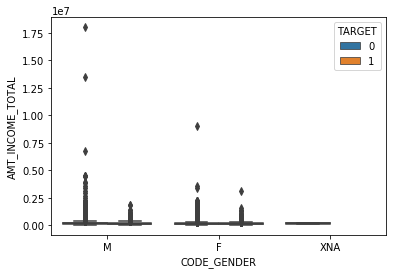

In [20]:
#Creating boxplot again after removing the outlier
sns.boxplot(app_processed_df['CODE_GENDER'],app_processed_df['AMT_INCOME_TOTAL'], hue = app_processed_df['TARGET'])
plt.show()

In [21]:
# Combining two datasets
df = app_df.merge(prev_df, how = 'left', on =  ['SK_ID_CURR'])

In [22]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 158 columns):
SK_ID_CURR                      1430155 non-null int64
TARGET                          1430155 non-null int64
NAME_CONTRACT_TYPE_x            1430155 non-null object
CODE_GENDER                     1430155 non-null object
FLAG_OWN_CAR                    1430155 non-null object
FLAG_OWN_REALTY                 1430155 non-null object
CNT_CHILDREN                    1430155 non-null int64
AMT_INCOME_TOTAL                1430155 non-null float64
AMT_CREDIT_x                    1430155 non-null float64
AMT_ANNUITY_x                   1430062 non-null float64
AMT_GOODS_PRICE_x               1428936 non-null float64
NAME_TYPE_SUITE_x               1426124 non-null object
NAME_INCOME_TYPE                1430155 non-null object
NAME_EDUCATION_TYPE             1430155 non-null object
NAME_FAMILY_STATUS              1430155 non-null object
NAME_HOUSING_TYPE               1430155 non-n

In [23]:
# Data is being given where single person has taken multiple loans previously
prev_df.sort_values(by = ['SK_ID_CURR'], ascending = True)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
201668      1369693      100001     Consumer loans     3951.000   
892077      1038818      100002     Consumer loans     9251.775   
575941      1810518      100003         Cash loans    98356.995   
1021650     2636178      100003     Consumer loans    64567.665   
1223745     2396755      100003     Consumer loans     6737.310   
935548      1564014      100004     Consumer loans     5357.250   
1259112     1857999      100005         Cash loans          NaN   
1378978     2495675      100005     Consumer loans     4813.200   
900957      1489396      100006    Revolving loans    13500.000   
1607443     1697039      100006         Cash loans    32696.100   
1232752     1243599      100006         Cash loans          NaN   
830967      2190416      100006     Consumer loans    29027.520   
617859      2827850      100006    Revolving loans          NaN   
1595430     2545789      100006         Cash loans          NaN   
1131133     1020698      100006         Cash loans    39954.510   
1333657     2299329      100006     Consumer loans     2482.920   
98162       2078043      100006         Cash loans    24246.000   
13392       2001242      100007         Cash loans    16509.600   
87569       2730157      100007         Cash loans    13010.985   
1061094     2119973      100007     Consumer loans     1834.290   
693308      1692033      100007         Cash loans    16037.640   
1483068     1940724      100007         Cash loans    22678.785   
1260339     2462742      100007     Consumer loans     3601.530   
600145      1757431      100008         Cash loans          NaN   
604799      1186888      100008     Consumer loans     8019.090   
906992      1907290      100008     Consumer loans    12144.285   
800095      2613879      100008         Cash loans    25309.575   
320227      2218188      100008     Consumer loans    17885.835   
1276830     2007057      100009     Consumer loans     7500.735   
8567        1413109      100009     Consumer loans     8996.760   
...             ...         ...                ...          ...   
1003590     1382810      456247     Consumer loans     7544.970   
1116858     2582033      456247     Consumer loans    11767.590   
1239697     1136073      456248         Cash loans    67725.495   
345758      1826280      456248         Cash loans    28633.320   
1387092     2743495      456248    Revolving loans    45000.000   
1168620     1395578      456248     Consumer loans     8417.340   
478898      2660508      456249         Cash loans    22770.405   
234061      2669123      456249     Consumer loans    11497.500   
490103      1794451      456250    Revolving loans     9000.000   
553648      1511244      456250         Cash loans          NaN   
1467403     1740566      456250         Cash loans    26474.625   
1440475     2626069      456250         Cash loans    19151.100   
791939      1922117      456250     Consumer loans    26084.430   
935792      1081068      456250     Consumer loans     7847.685   
1345759     2624169      456250         Cash loans          NaN   
1094543     1482581      456250    Revolving loans          NaN   
292302      2248017      456251     Consumer loans     6605.910   
444497      1503599      456252     Consumer loans    10074.465   
181558      1686207      456253     Consumer loans     5567.715   
1246881     1668235      456253     Consumer loans     3973.095   
455446      1792910      456254     Consumer loans     2296.440   
7315        2016407      456254     Consumer loans    19065.825   
453227      1359084      456255     Consumer loans    11314.170   
1383554     2631384      456255         Cash loans    54022.140   
596623      1179690      456255         Cash loans    28873.170   
814647      1296007      456255         Cash loans    30737.655   
214743      1743609      456255     Consumer loans    11090.835   
1411592     2729207      456255     Consumer loans    11

Text(0.5, 1.0, 'Code Reject Reason wise distribution of difficulty faced in payment')

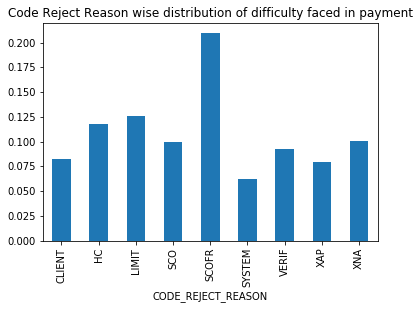

In [24]:
df.groupby(['CODE_REJECT_REASON'])['TARGET'].mean().plot(kind = 'bar')
plt.title('Code Reject Reason wise distribution of difficulty faced in payment')
plt.show()

### Inference: Client's whose previous loan applicatin was rejected with 'SCOFR' reason, these clients are facing most difficulties in payments

Text(0.5, 1.0, 'Good Category wise distribution of difficulty faced in payment')

Text(0.5, 1.0, 'Good Category wise distribution of difficulty faced in payment vs other areas')

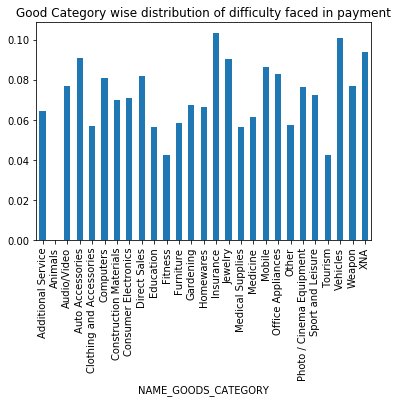

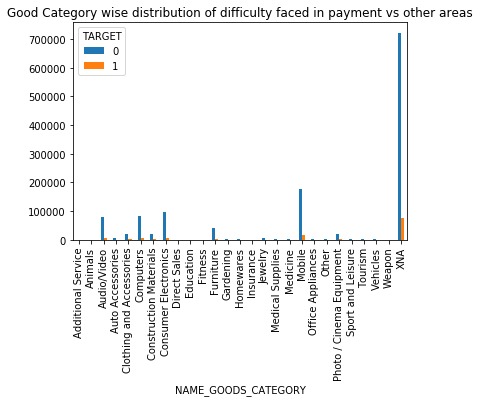

In [25]:
df.groupby(['NAME_GOODS_CATEGORY'])['TARGET'].mean().plot(kind = 'bar')
plt.title('Good Category wise distribution of difficulty faced in payment')
pivot_df = pd.pivot_table(data=df, index = 'NAME_GOODS_CATEGORY', columns = 'TARGET', values = 'SK_ID_CURR', aggfunc = len)
pivot_df.plot(kind = 'bar')
plt.title('Good Category wise distribution of difficulty faced in payment vs other areas')
plt.show()


Text(0.5, 1.0, 'Contract Status Group wise distribution of difficulty faced in payment')

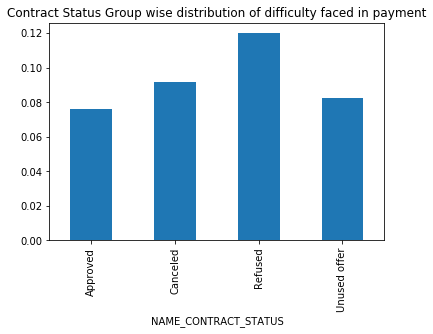

In [26]:
df.groupby(['NAME_CONTRACT_STATUS'])['TARGET'].mean().plot(kind = 'bar')
plt.title('Contract Status Group wise distribution of difficulty faced in payment')
plt.show()


### Inference: Client for whom the previous application was refused , those client's are the one who have most payment diffculties for current loan 

## Correlation Matrix

Text(0.5, 1.0, 'Target 0 Correlation')

Text(0.5, 1.0, 'Target 1 Correlation')

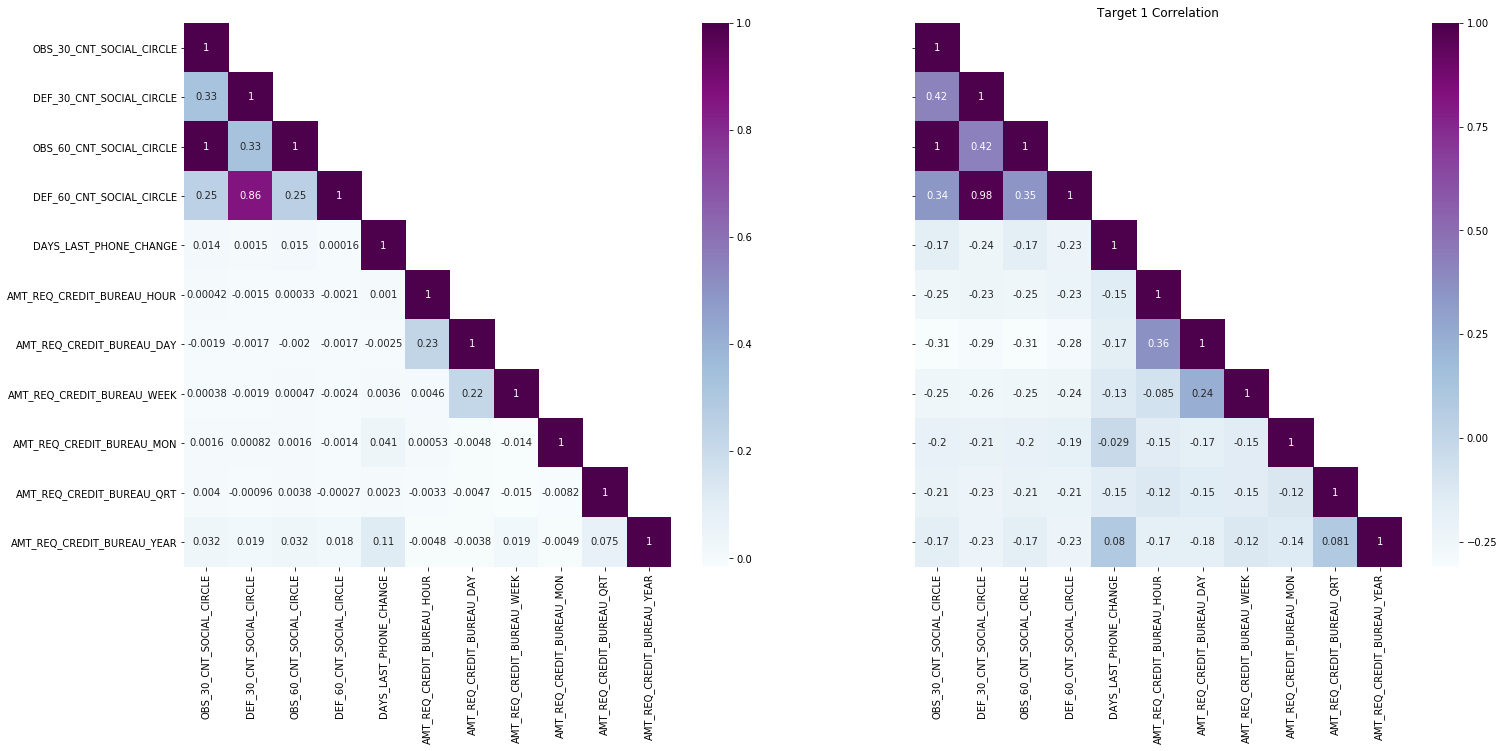

In [27]:
columns = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
fig, (ax1, ax2) = plt.subplots(nrows = 1,ncols = 2,figsize = (24,10), sharey = True)
#plt.figure(figsize = (16,8))
target_0 =app_processed_df[app_processed_df['TARGET'] == 0]
target_1 =app_processed_df[app_processed_df['TARGET'] == 1]
corr_df_0 = target_0[columns].corr()
df_corr_0 = corr_df_0.where(np.tril(np.ones(corr_df_0.shape)).astype(np.bool))
corr_df_1 = target_1[columns].corr()
df_corr_1 = corr_df_1[columns].corr().where(np.tril(np.ones(corr_df_1.shape)).astype(np.bool))
#plt.subplot(1,2,1)
sns.heatmap(df_corr_0, annot = True, cmap= 'BuPu', ax= ax1)
plt.title('Target 0 Correlation')
#plt.subplot(1,2,2)
sns.heatmap(df_corr_1, annot = True, cmap= 'BuPu', ax = ax2)
plt.title('Target 1 Correlation')
plt.show()

Text(0.5, 1.0, 'Target 0 Correlation')

Text(0.5, 1.0, 'Target 1 Correlation')

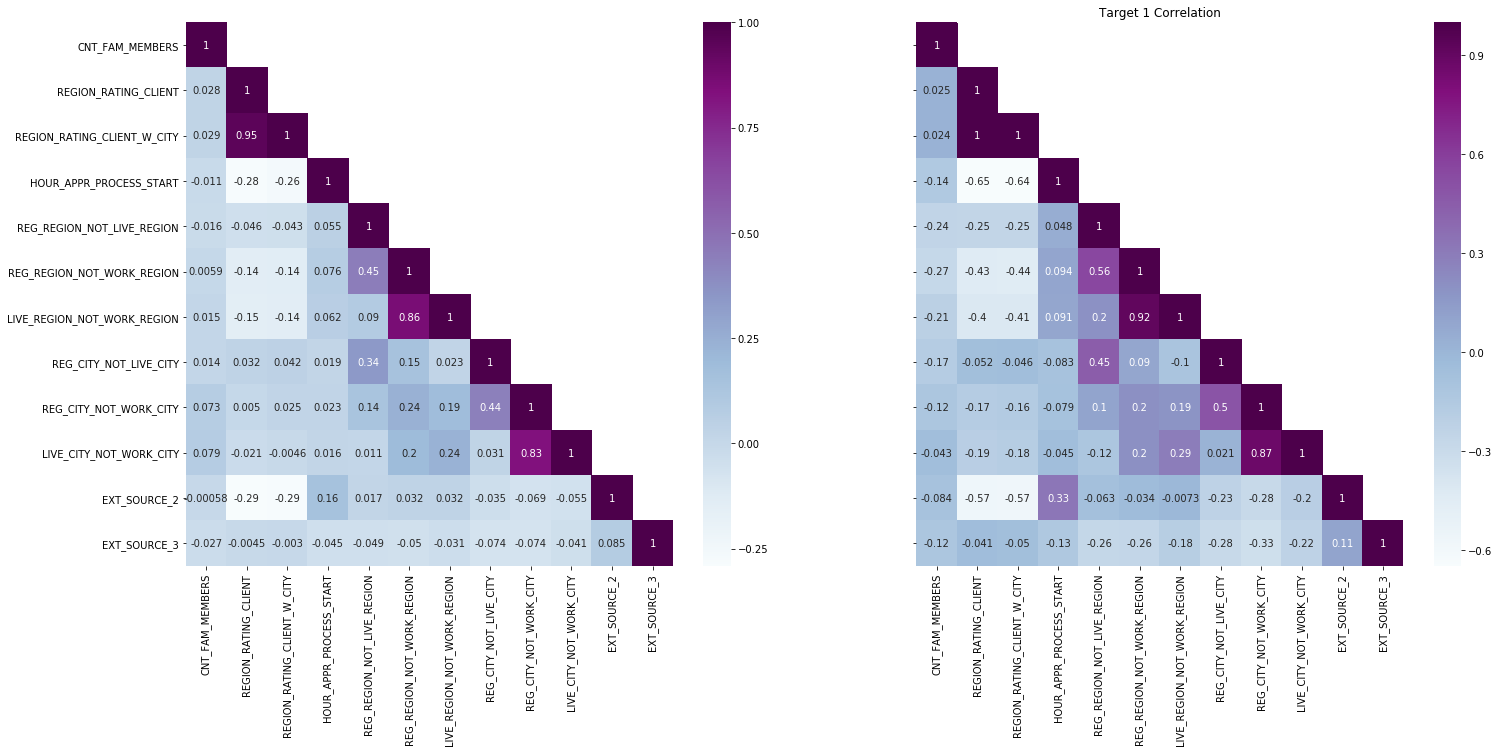

In [28]:
columns = ['CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
        'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
        'EXT_SOURCE_2', 'EXT_SOURCE_3']
fig, (ax1, ax2) = plt.subplots(nrows = 1,ncols = 2,figsize = (24,10), sharey = True)
#plt.figure(figsize = (16,8))
target_0 =app_processed_df[app_processed_df['TARGET'] == 0]
target_1 =app_processed_df[app_processed_df['TARGET'] == 1]
corr_df_0 = target_0[columns].corr()
df_corr_0 = corr_df_0.where(np.tril(np.ones(corr_df_0.shape)).astype(np.bool))
corr_df_1 = target_1[columns].corr()
df_corr_1 = corr_df_1[columns].corr().where(np.tril(np.ones(corr_df_1.shape)).astype(np.bool))
#plt.subplot(1,2,1)
sns.heatmap(df_corr_0, annot = True, cmap= 'BuPu', ax= ax1)
plt.title('Target 0 Correlation')
#plt.subplot(1,2,2)
sns.heatmap(df_corr_1, annot = True, cmap= 'BuPu', ax = ax2)
plt.title('Target 1 Correlation')
plt.show()


Text(0.5, 1.0, 'Target 0 Correlation')

Text(0.5, 1.0, 'Target 1 Correlation')

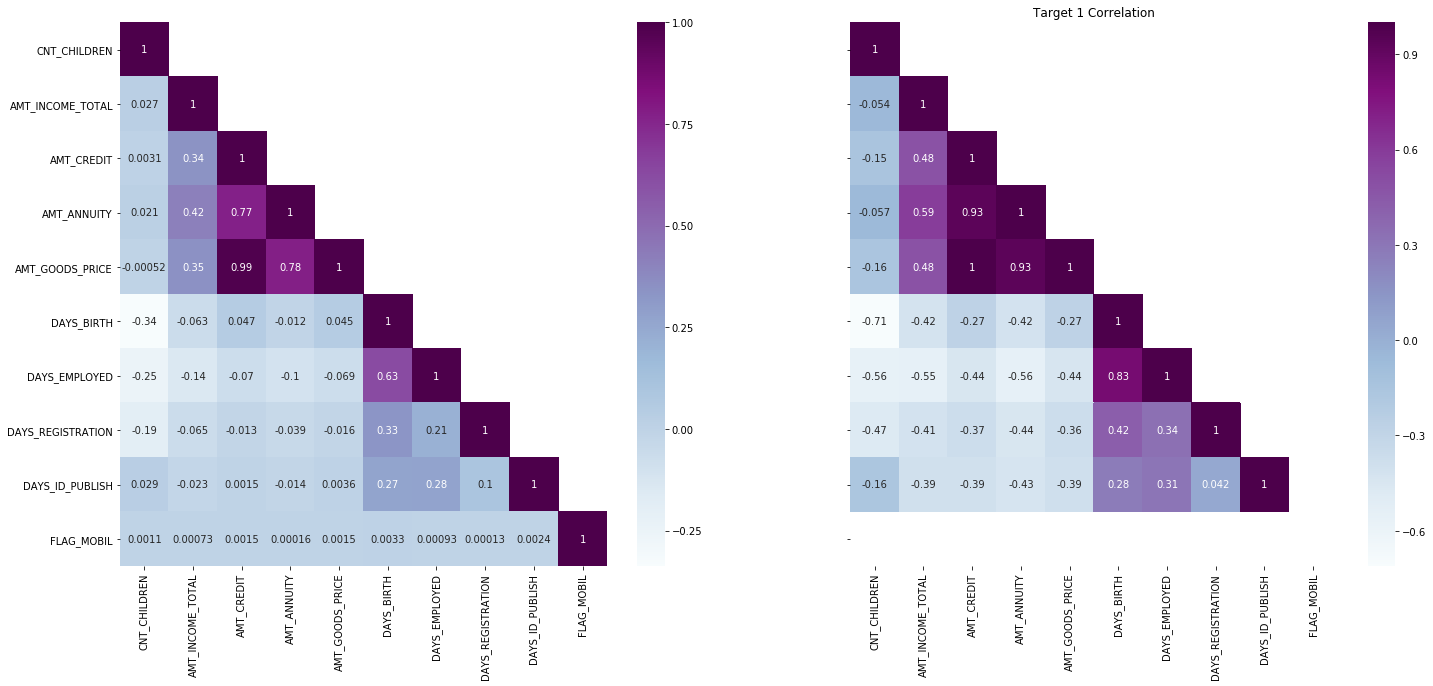

In [29]:
columns = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
       'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL']
fig, (ax1, ax2) = plt.subplots(nrows = 1,ncols = 2,figsize = (24,10), sharey = True)
#plt.figure(figsize = (16,8))
target_0 =app_processed_df[app_processed_df['TARGET'] == 0]
target_1 =app_processed_df[app_processed_df['TARGET'] == 1]
corr_df_0 = target_0[columns].corr()
df_corr_0 = corr_df_0.where(np.tril(np.ones(corr_df_0.shape)).astype(np.bool))
corr_df_1 = target_1[columns].corr()
df_corr_1 = corr_df_1[columns].corr().where(np.tril(np.ones(corr_df_1.shape)).astype(np.bool))
#plt.subplot(1,2,1)
sns.heatmap(df_corr_0, annot = True, cmap= 'BuPu', ax= ax1)
plt.title('Target 0 Correlation')
#plt.subplot(1,2,2)
sns.heatmap(df_corr_1, annot = True, cmap= 'BuPu', ax = ax2)
plt.title('Target 1 Correlation')
plt.show()

## Univariate Analysis

In [30]:
def plotting_categorical(dfAll, df_Target_0, df_Target_1, column):
    train = dfAll
    train_0 = df_Target_0
    train_1 = df_Target_1
    col = column
    fig = plt.figure(figsize = (15,8))
    ax1 = plt.subplot(2,2,1)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax = ax1)
    plt.title('Distribution of column:' +column)
    
    ax2 = plt.subplot(2,2,2)
    sns.countplot(x = column, hue = 'TARGET', data = train, ax = ax2)
    plt.title('Countplot for columns:'+ column)
    
    ax3 = plt.subplot(2,2,3)
    df = pd.DataFrame()
    df['0'] = (train_0[col].value_counts())/len(train_0)
    df['1'] = (train_1[col].value_counts())/len(train_1)
    plt.title('Distribution according to Target with column:'+ column)
    df.plot(kind = 'bar', ax = ax3)
    
    ax4 = plt.subplot(2,2,4)
    plt.title(column +' wise distribution of difficulty faced in payment')
    train.groupby([column])['TARGET'].mean().plot.bar(ax = ax4)
    
    fig.tight_layout()
    plt.show()
    
    print('-----------------------------------------------------------------------------------------------------------------------------')

In [31]:
categorial_columns =['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'FLAG_MOBIL','OCCUPATION_TYPE', 
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'ORGANIZATION_TYPE', 
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AGE_GROUP','EMPLOYED_DAYS_GROUP', 'DAYS_REGISTRATION_GROUP',
       'DAYS_ID_PUBLISH_GROUP', 'DAYS_LAST_PHONE_CHANGE_GROUP']

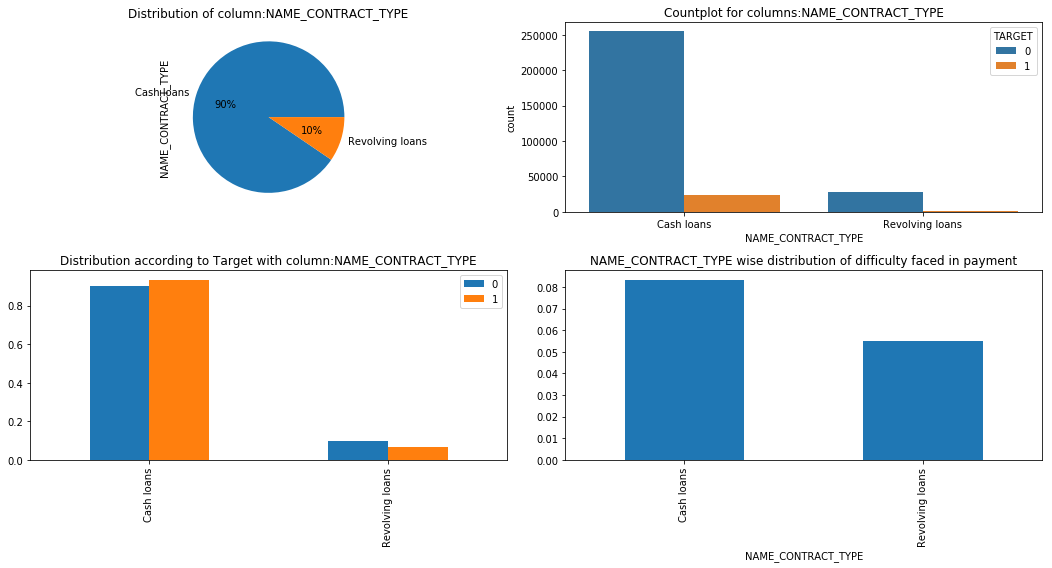

-----------------------------------------------------------------------------------------------------------------------------


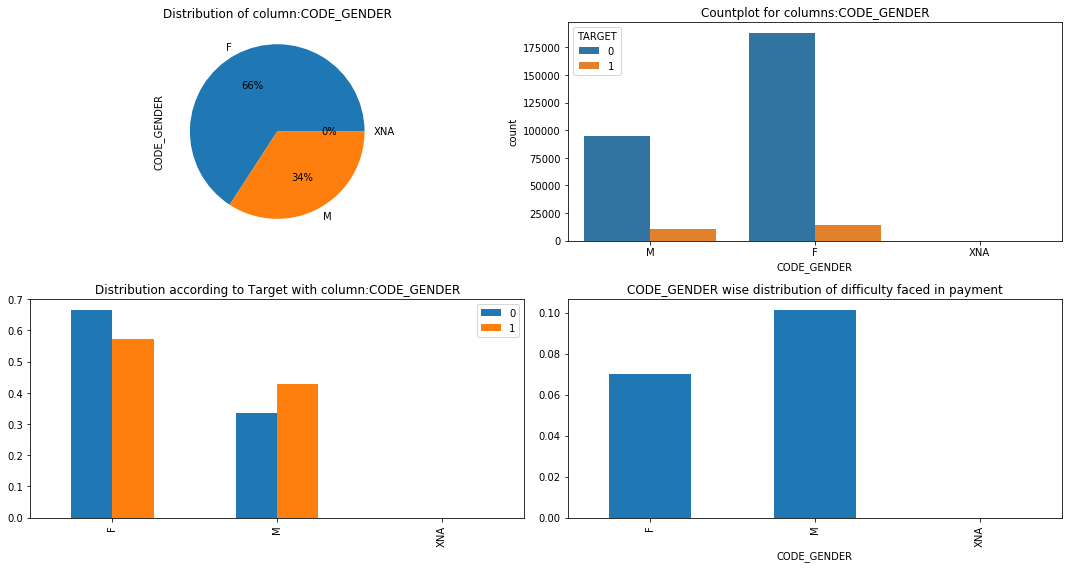

-----------------------------------------------------------------------------------------------------------------------------


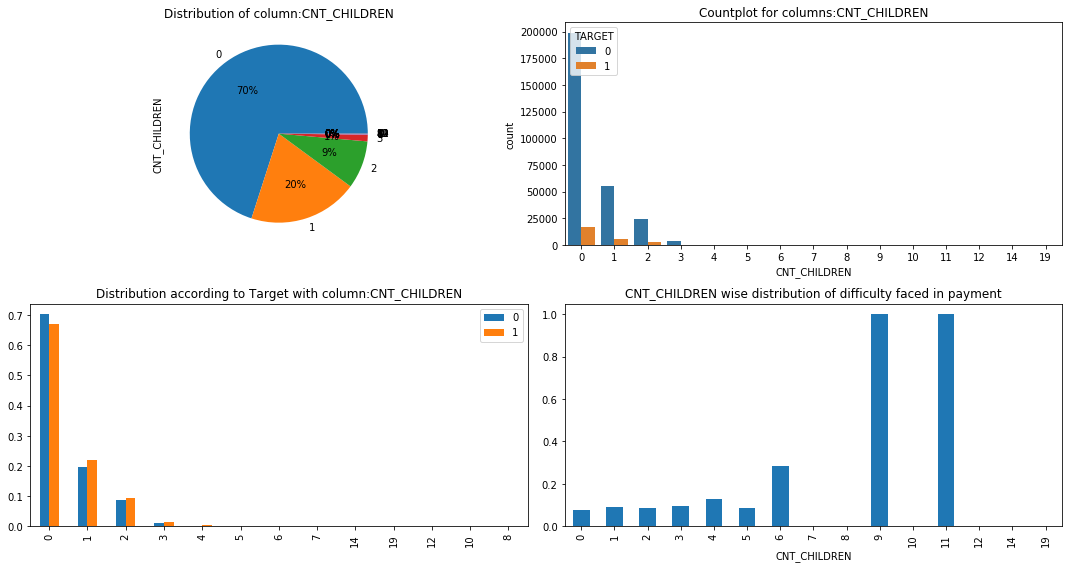

-----------------------------------------------------------------------------------------------------------------------------


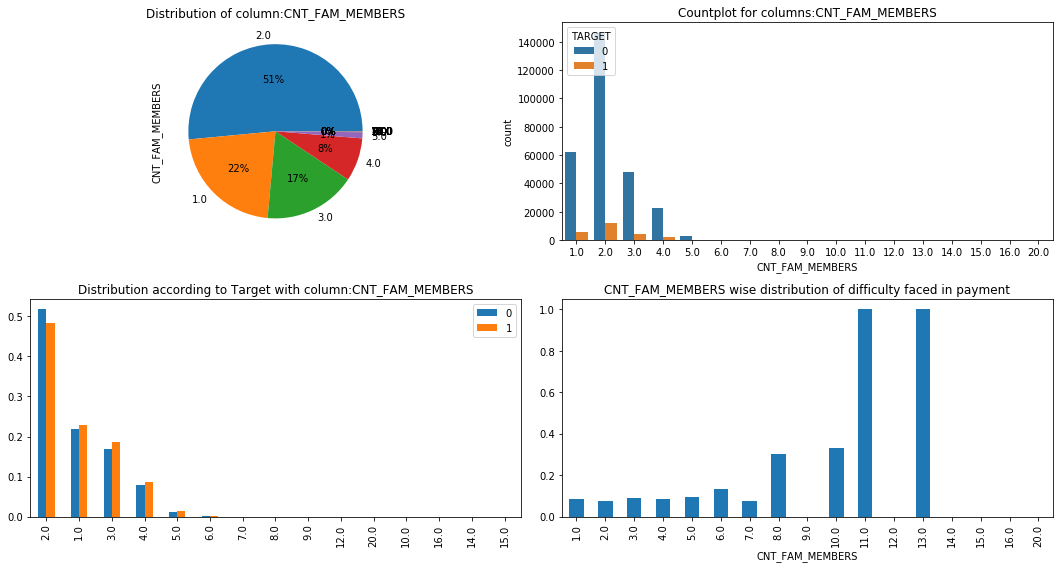

-----------------------------------------------------------------------------------------------------------------------------


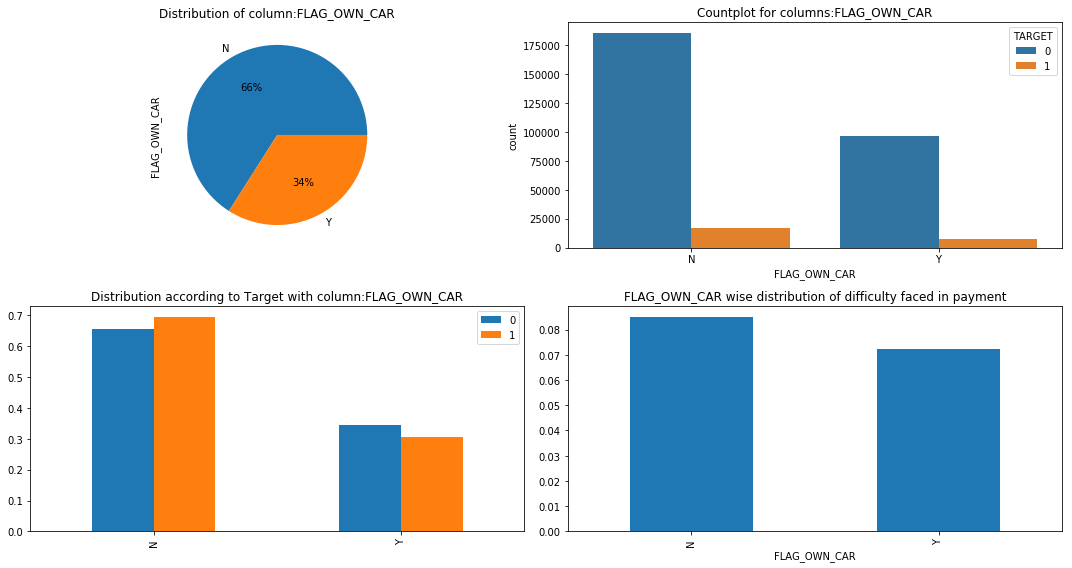

-----------------------------------------------------------------------------------------------------------------------------


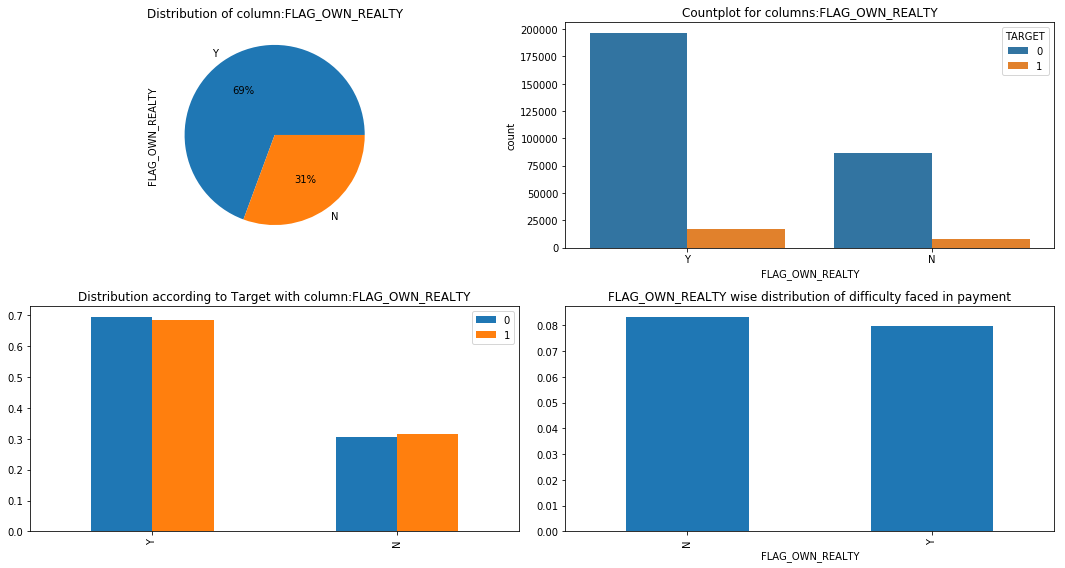

-----------------------------------------------------------------------------------------------------------------------------


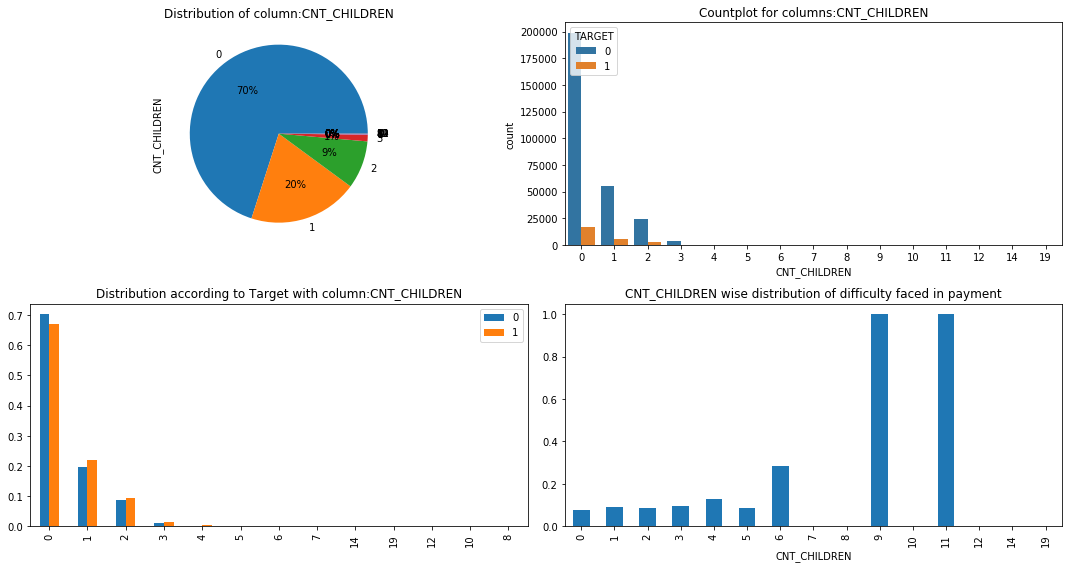

-----------------------------------------------------------------------------------------------------------------------------


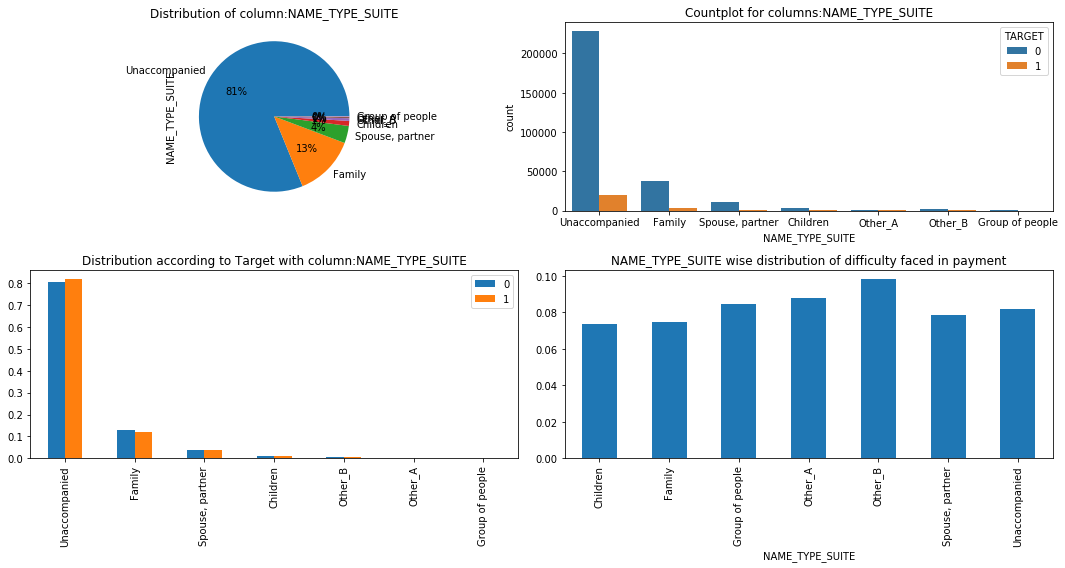

-----------------------------------------------------------------------------------------------------------------------------


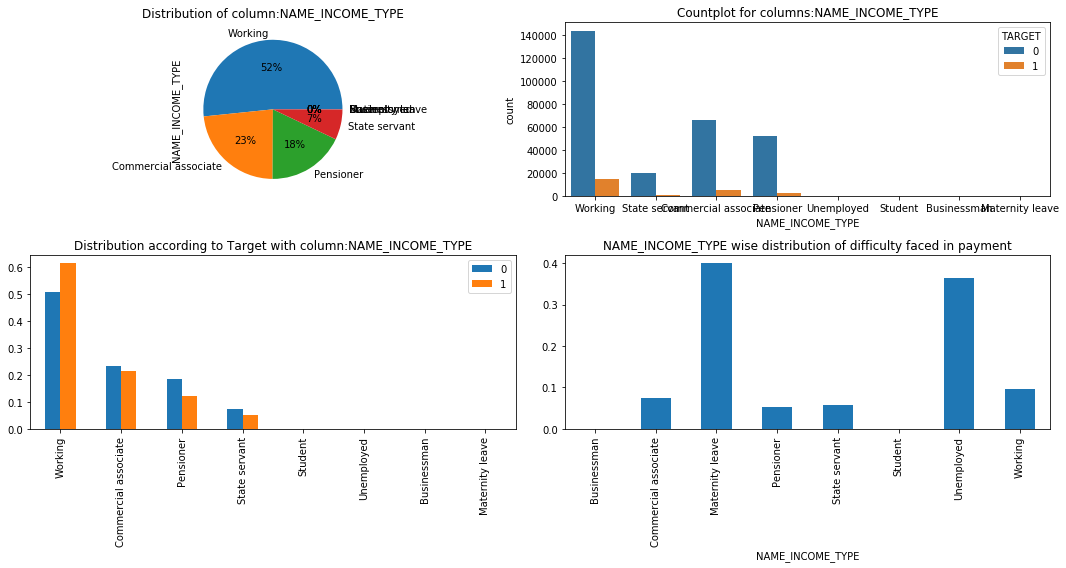

-----------------------------------------------------------------------------------------------------------------------------


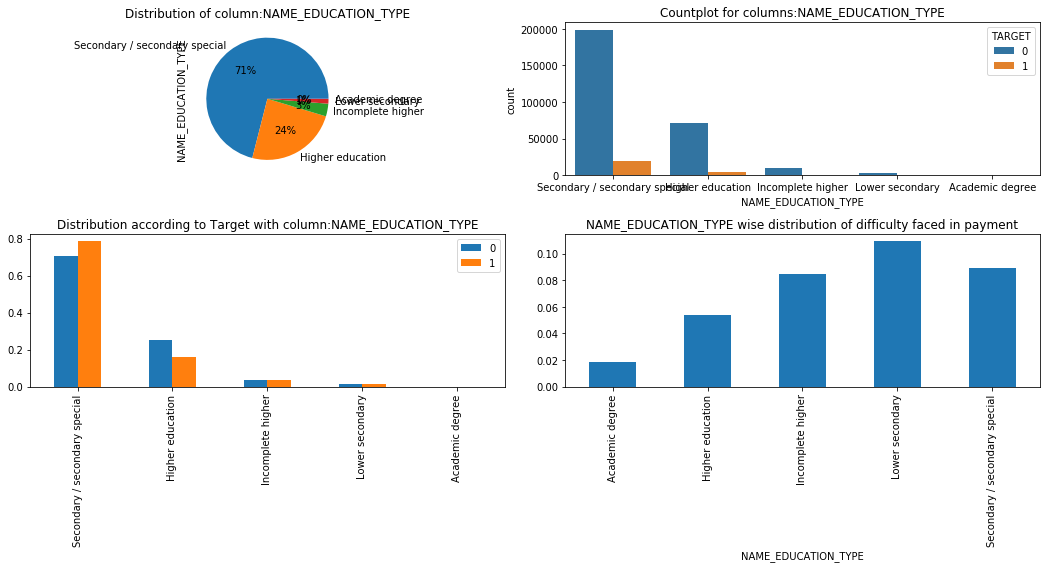

-----------------------------------------------------------------------------------------------------------------------------


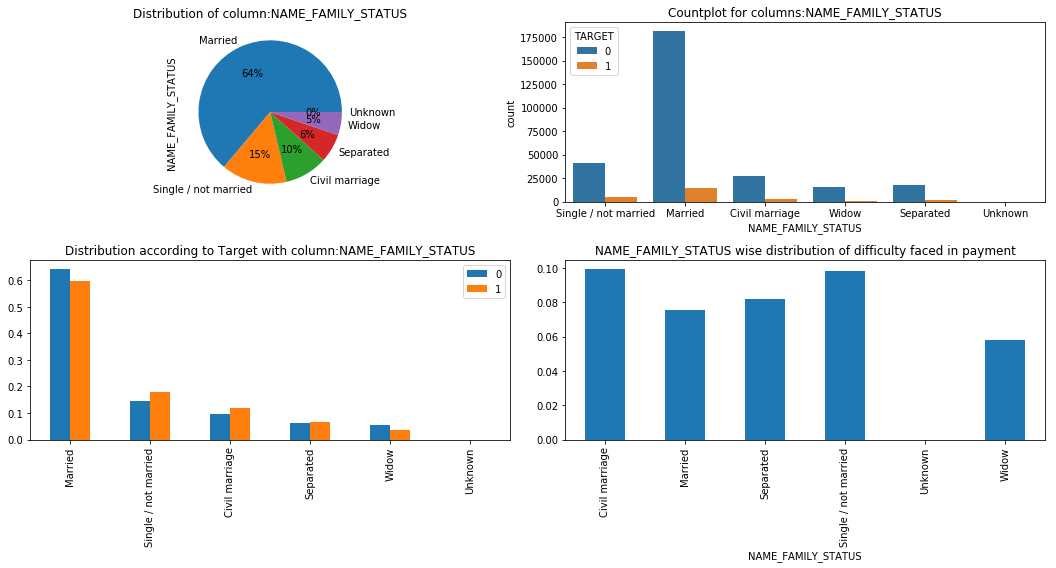

-----------------------------------------------------------------------------------------------------------------------------


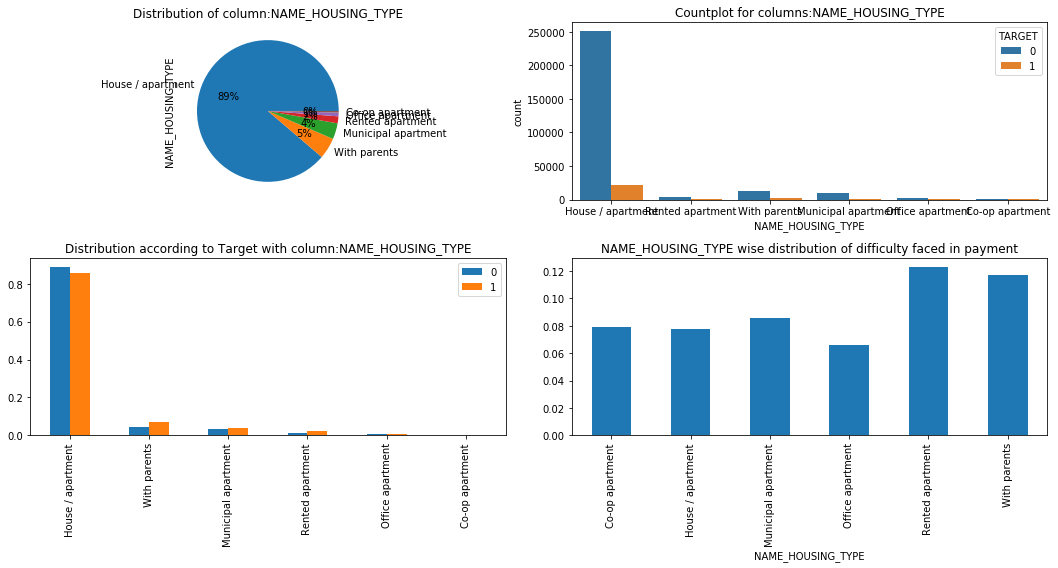

-----------------------------------------------------------------------------------------------------------------------------


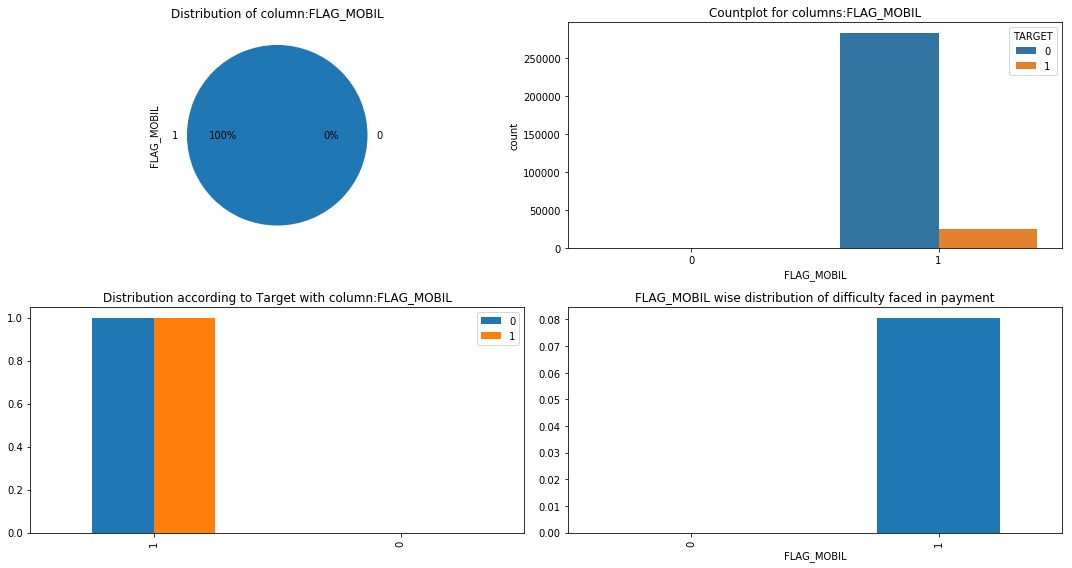

-----------------------------------------------------------------------------------------------------------------------------


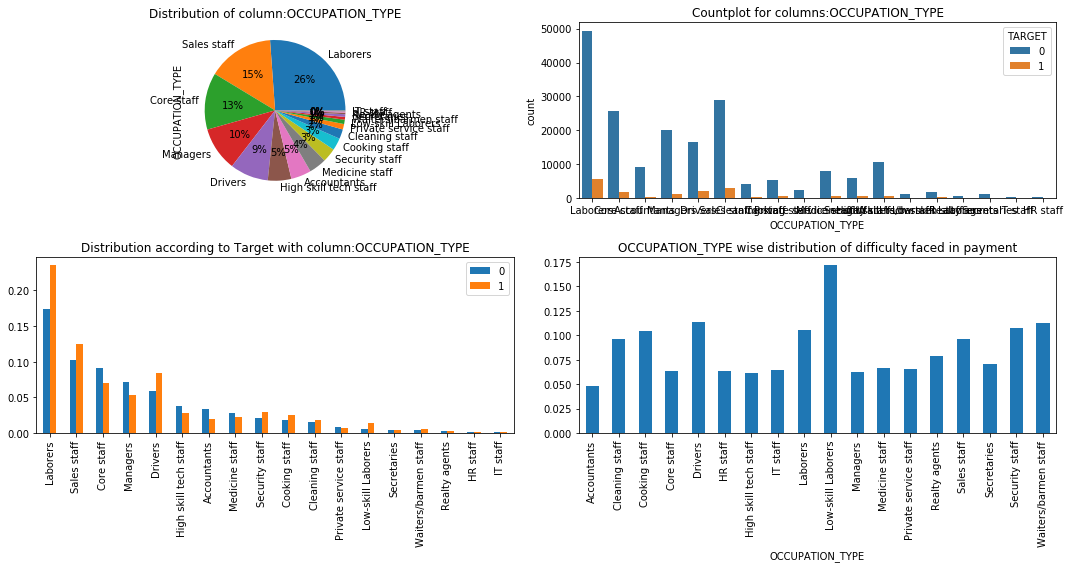

-----------------------------------------------------------------------------------------------------------------------------


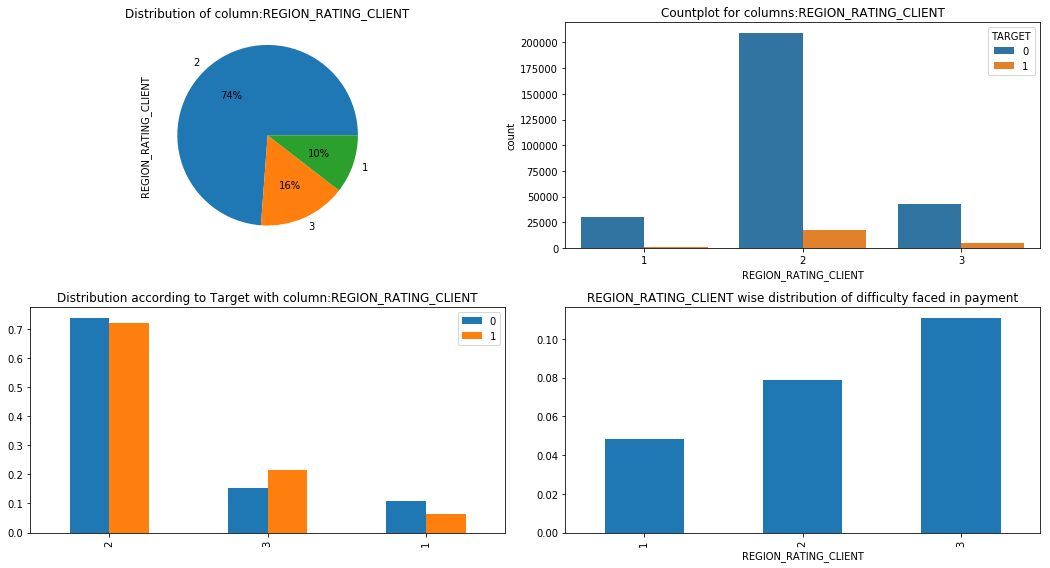

-----------------------------------------------------------------------------------------------------------------------------


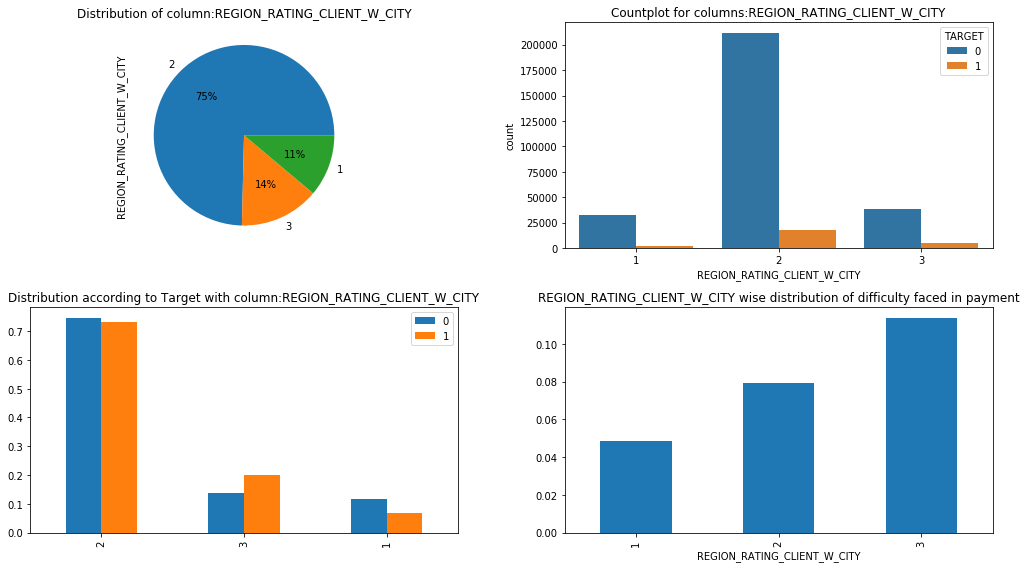

-----------------------------------------------------------------------------------------------------------------------------


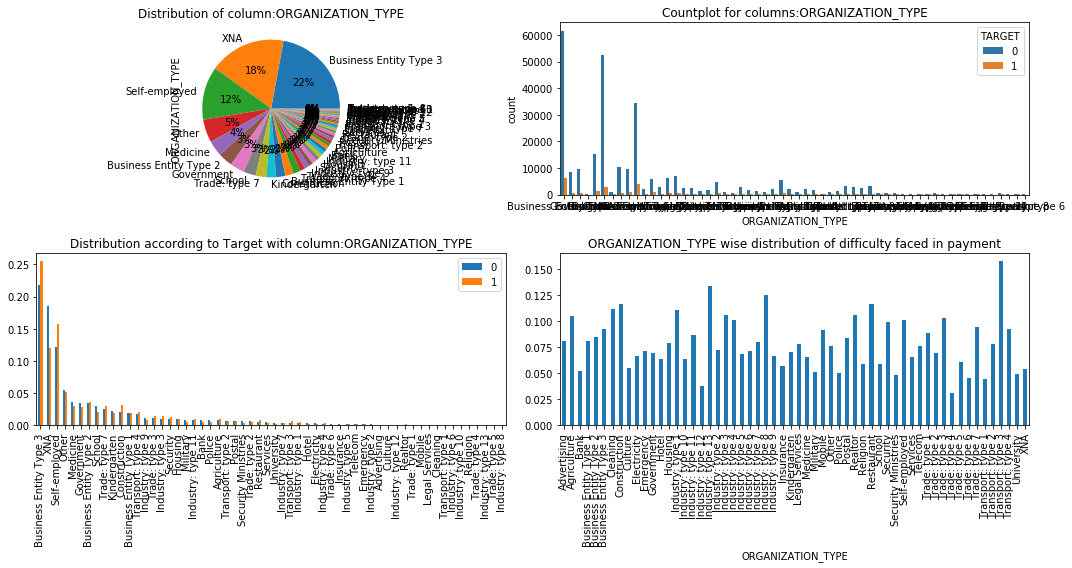

-----------------------------------------------------------------------------------------------------------------------------


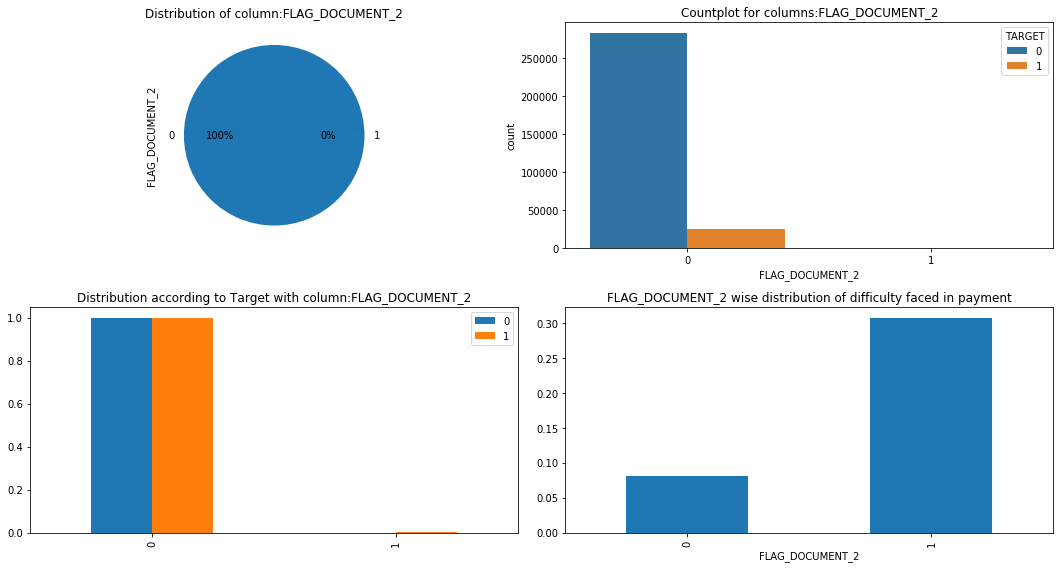

-----------------------------------------------------------------------------------------------------------------------------


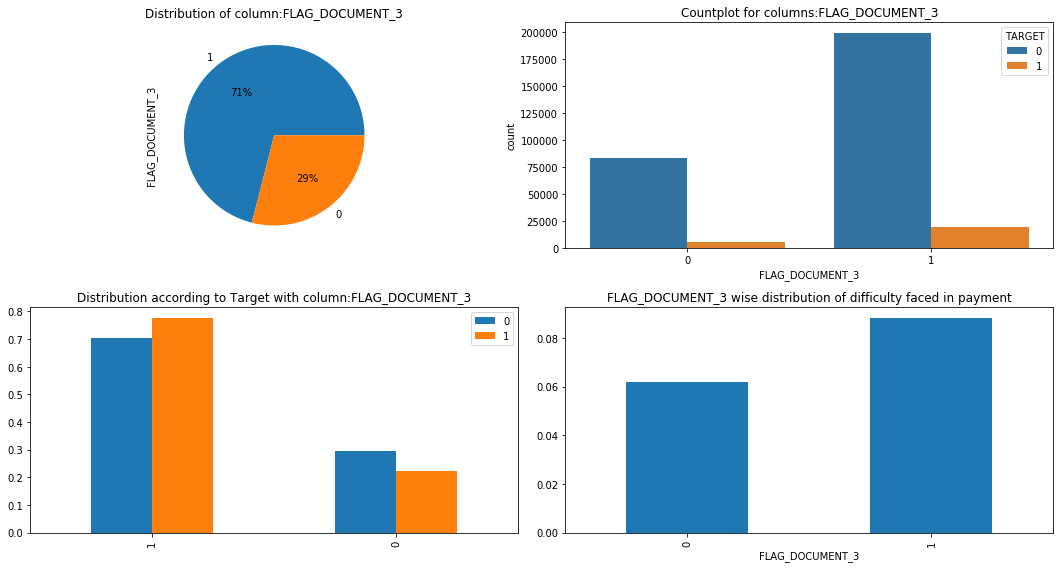

-----------------------------------------------------------------------------------------------------------------------------


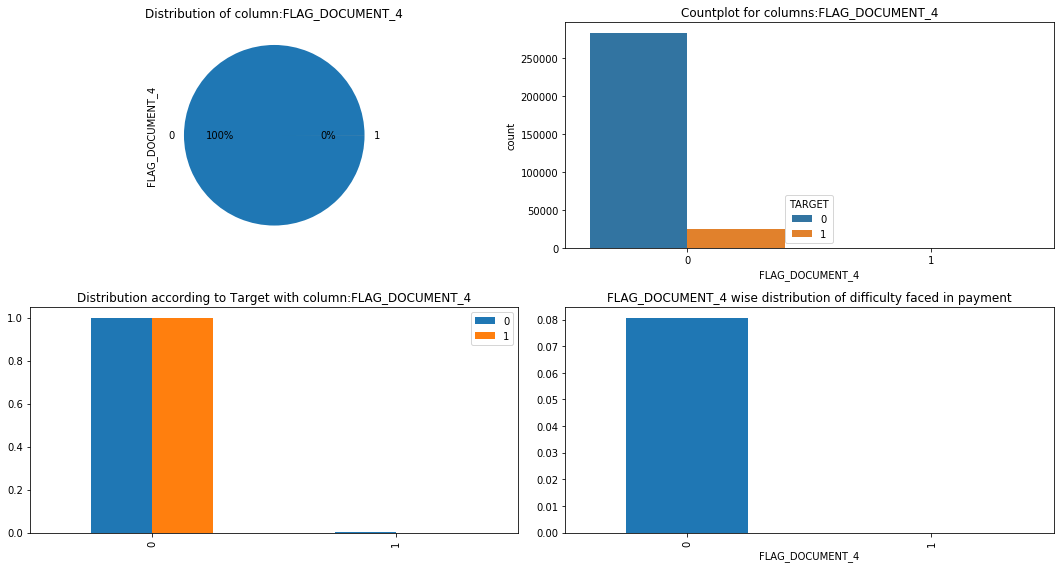

-----------------------------------------------------------------------------------------------------------------------------


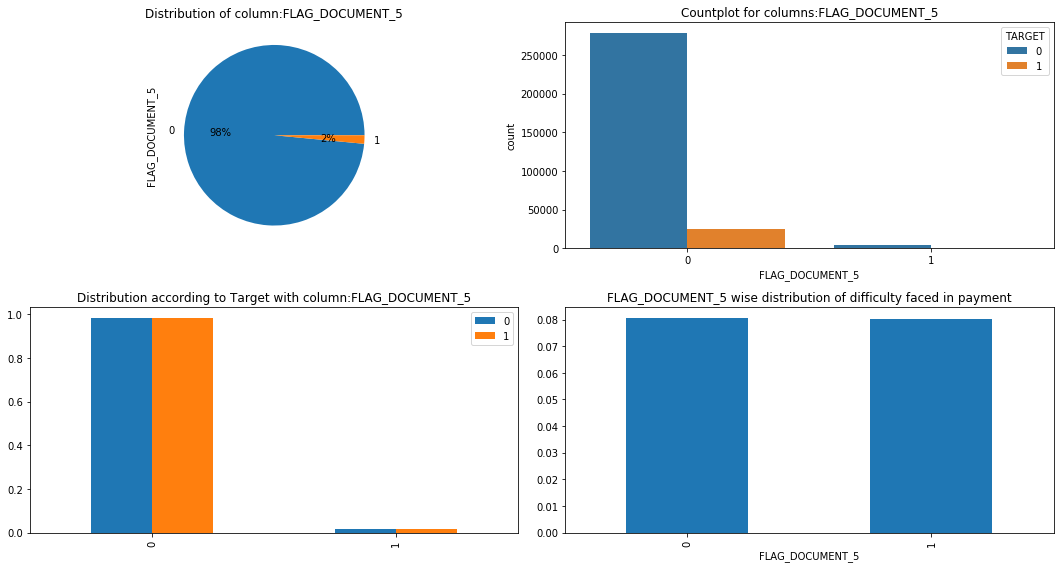

-----------------------------------------------------------------------------------------------------------------------------


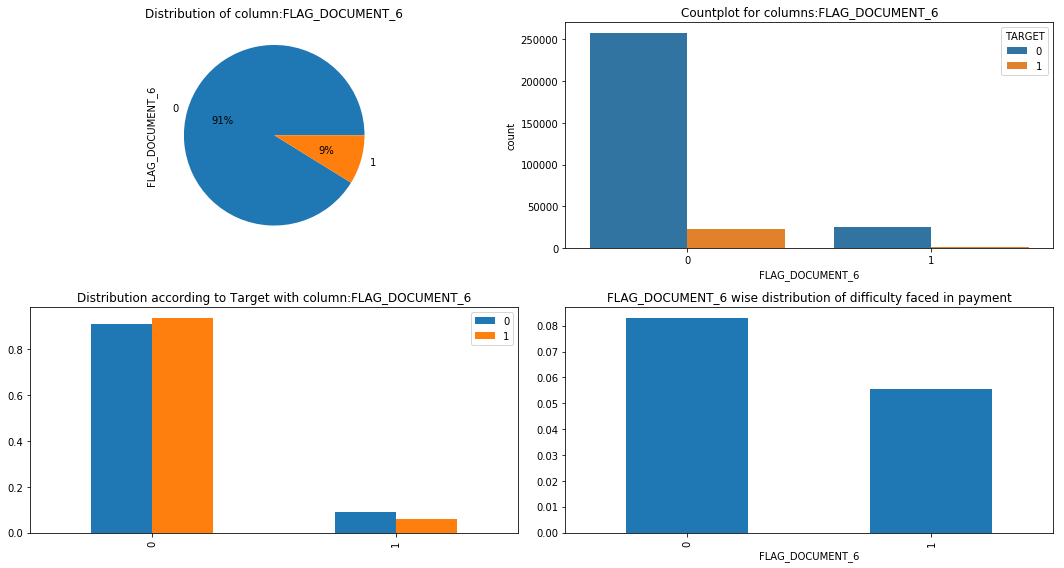

-----------------------------------------------------------------------------------------------------------------------------


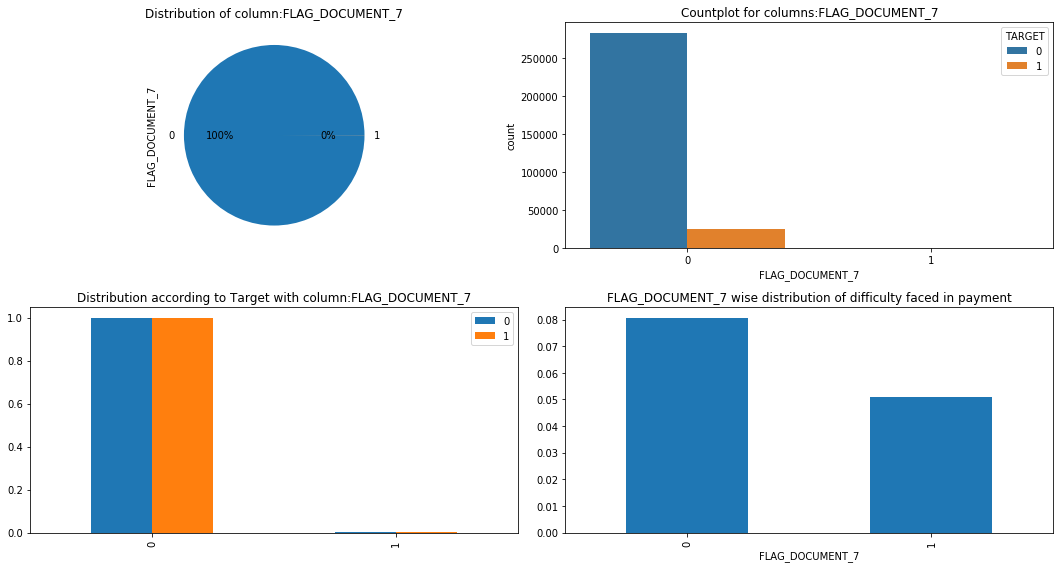

-----------------------------------------------------------------------------------------------------------------------------


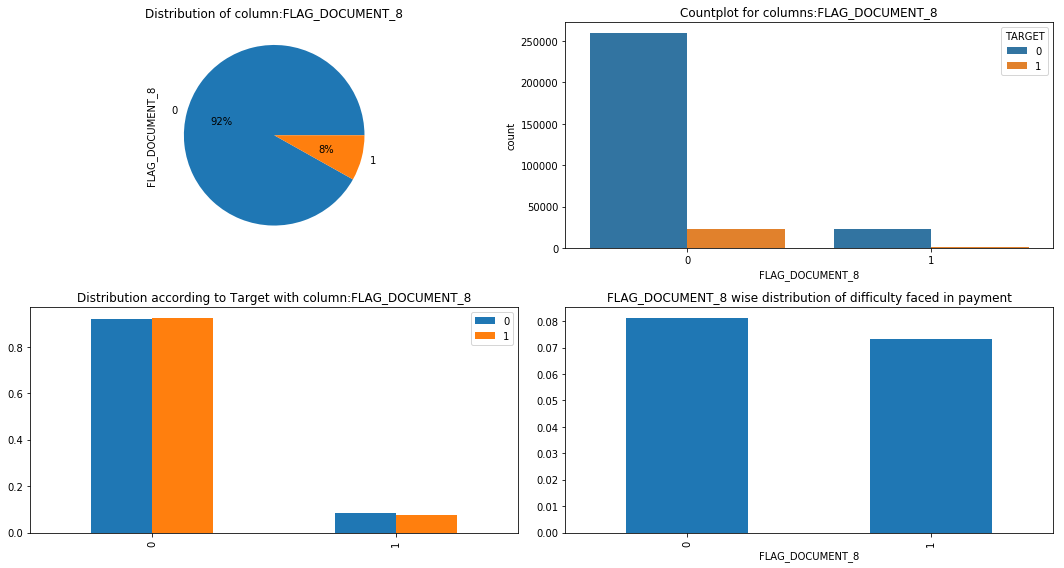

-----------------------------------------------------------------------------------------------------------------------------


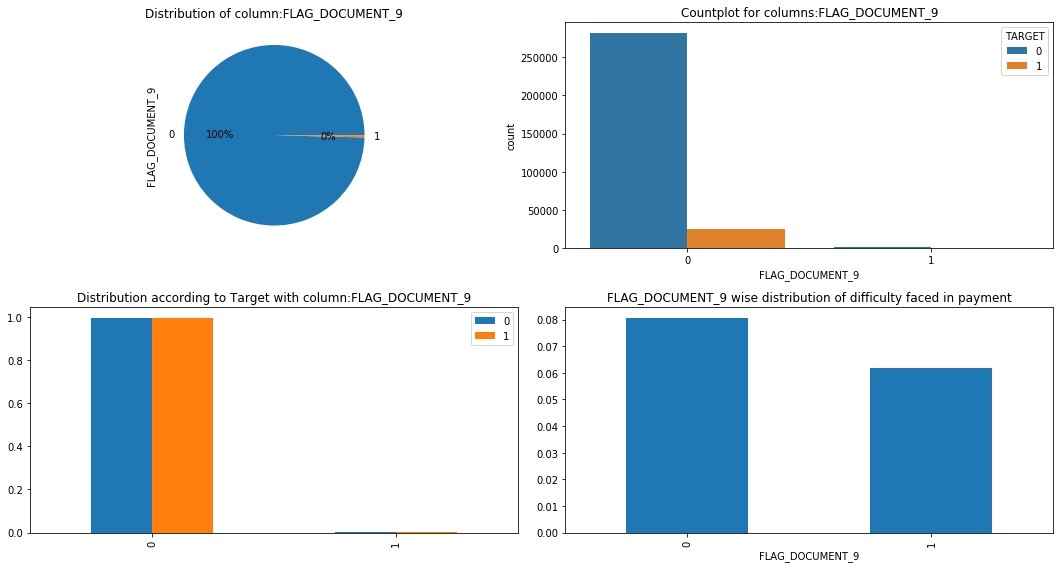

-----------------------------------------------------------------------------------------------------------------------------


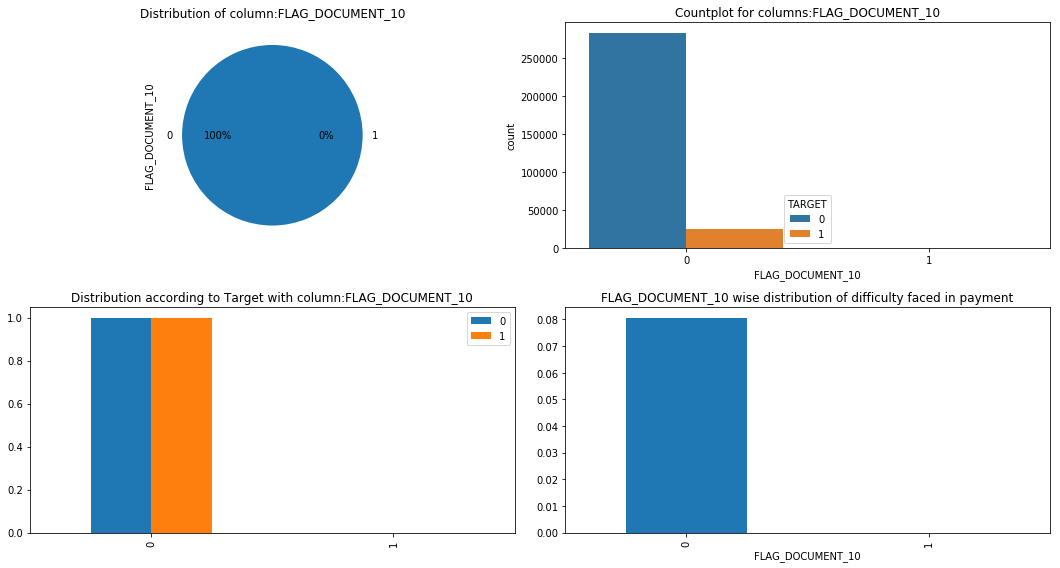

-----------------------------------------------------------------------------------------------------------------------------


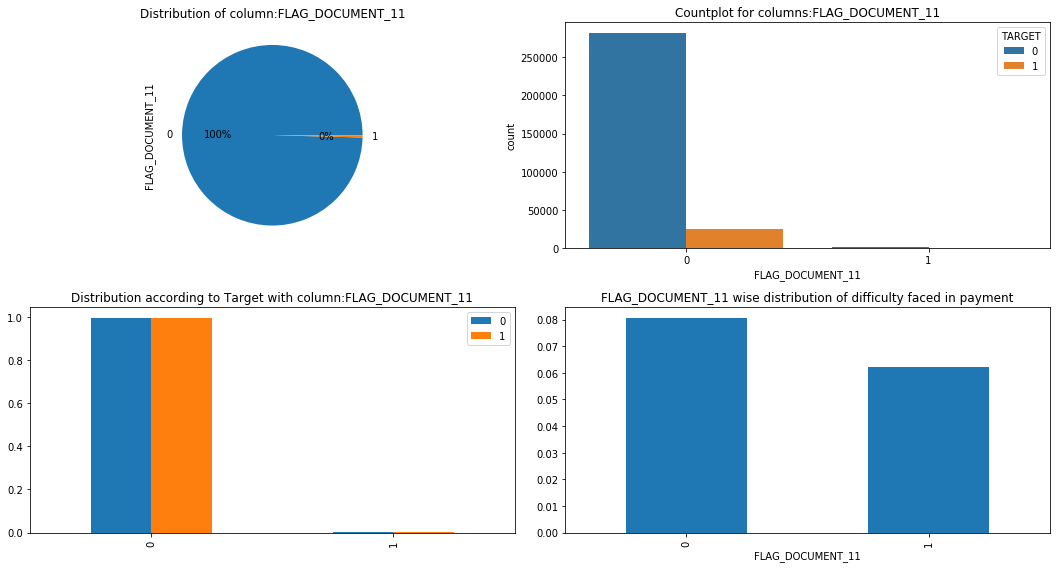

-----------------------------------------------------------------------------------------------------------------------------


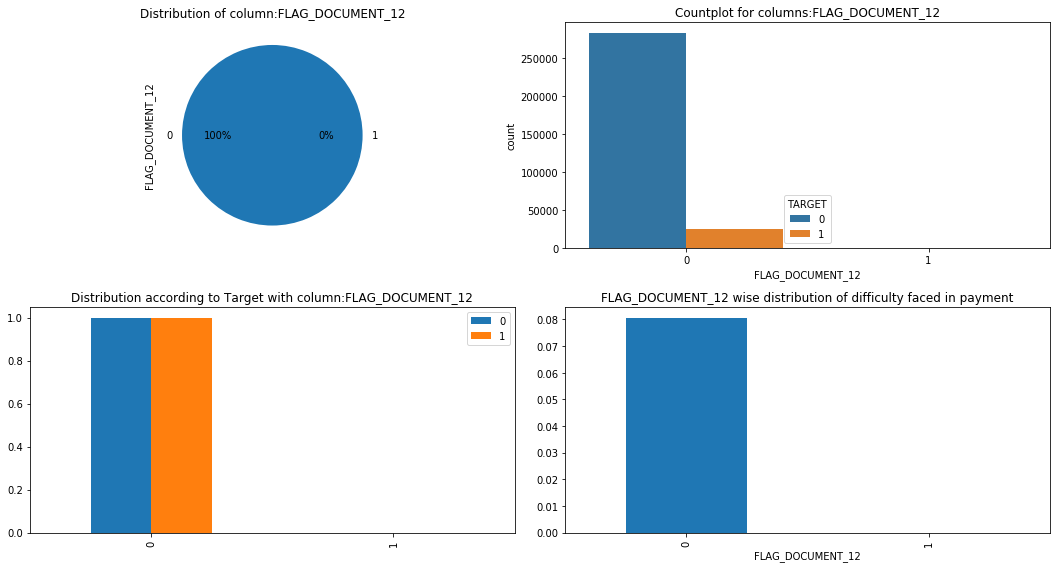

-----------------------------------------------------------------------------------------------------------------------------


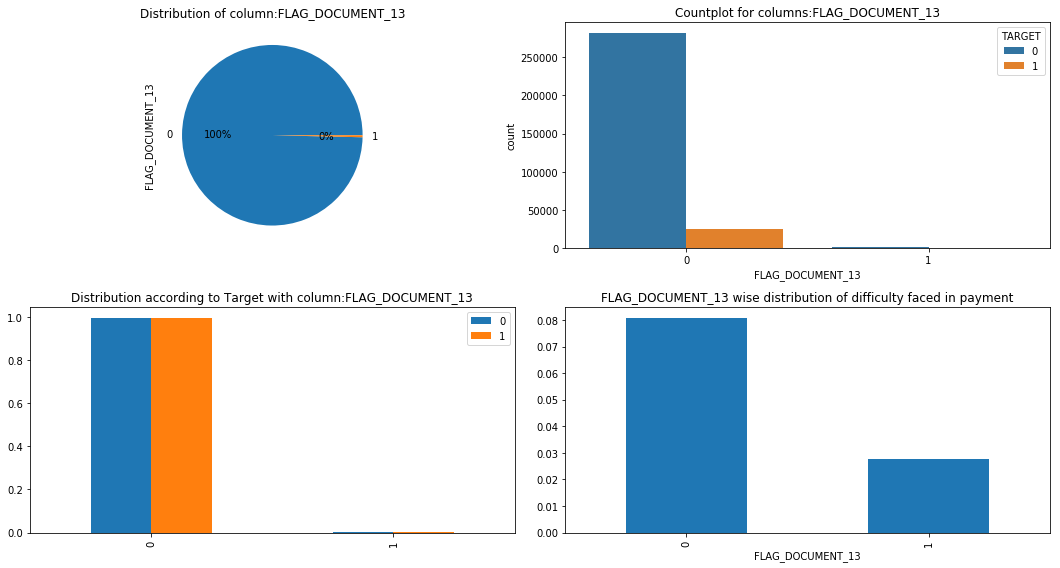

-----------------------------------------------------------------------------------------------------------------------------


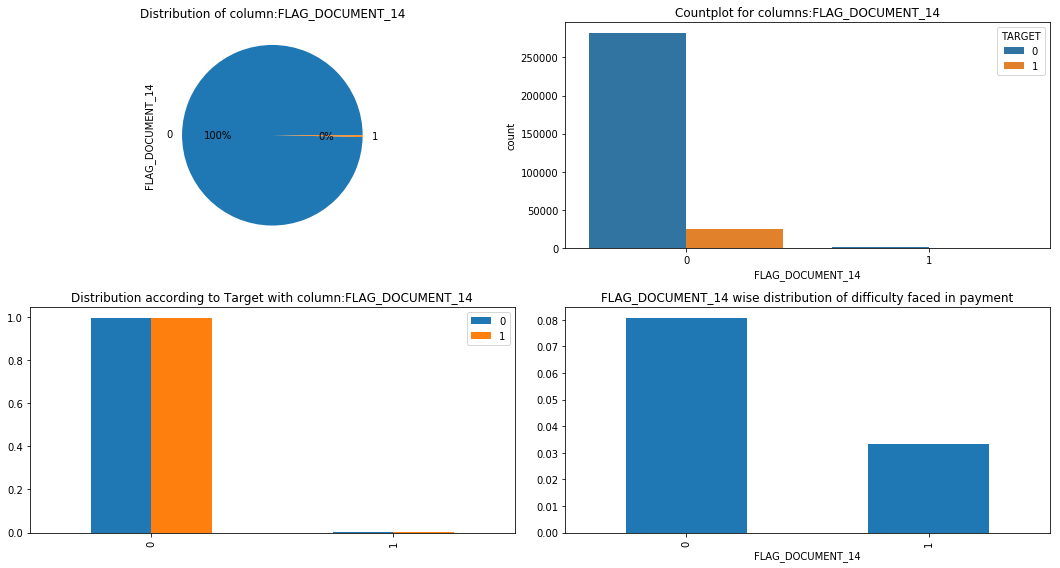

-----------------------------------------------------------------------------------------------------------------------------


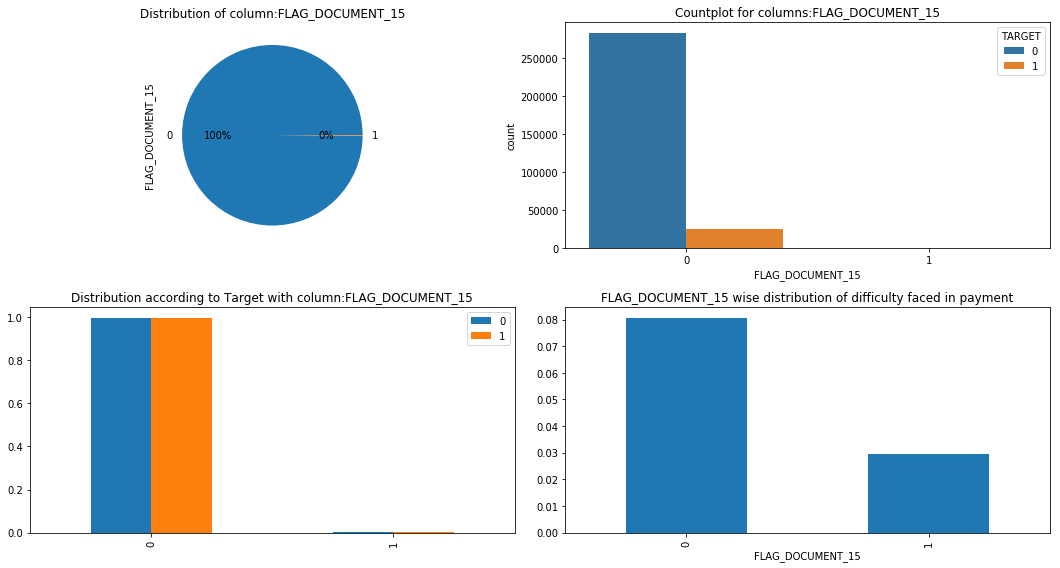

-----------------------------------------------------------------------------------------------------------------------------


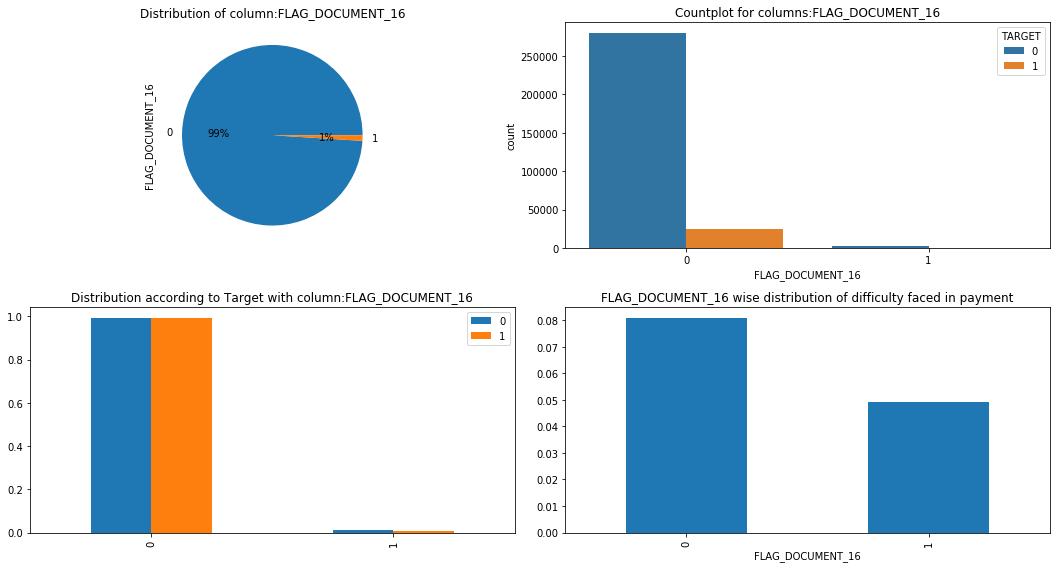

-----------------------------------------------------------------------------------------------------------------------------


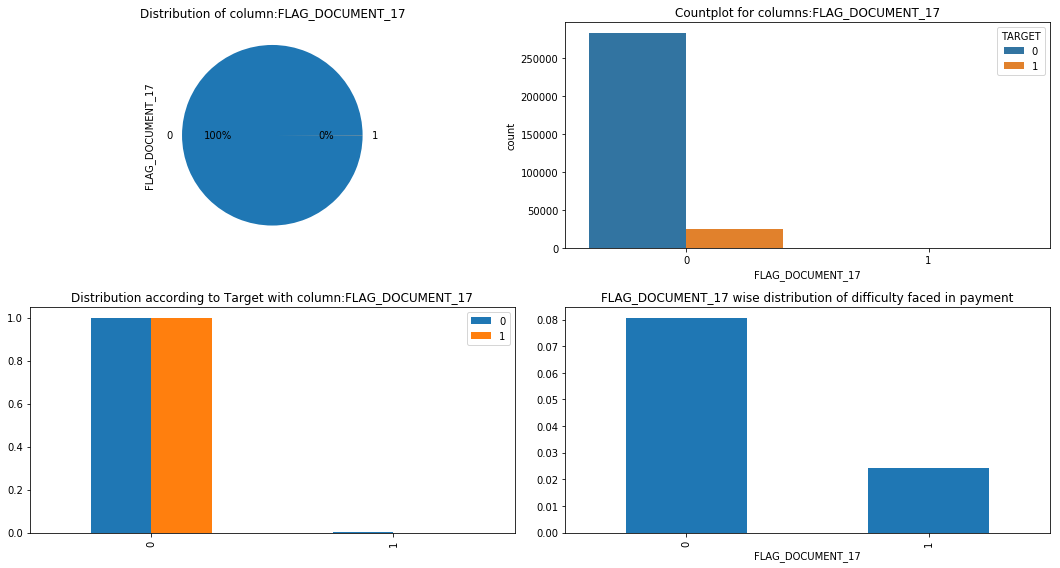

-----------------------------------------------------------------------------------------------------------------------------


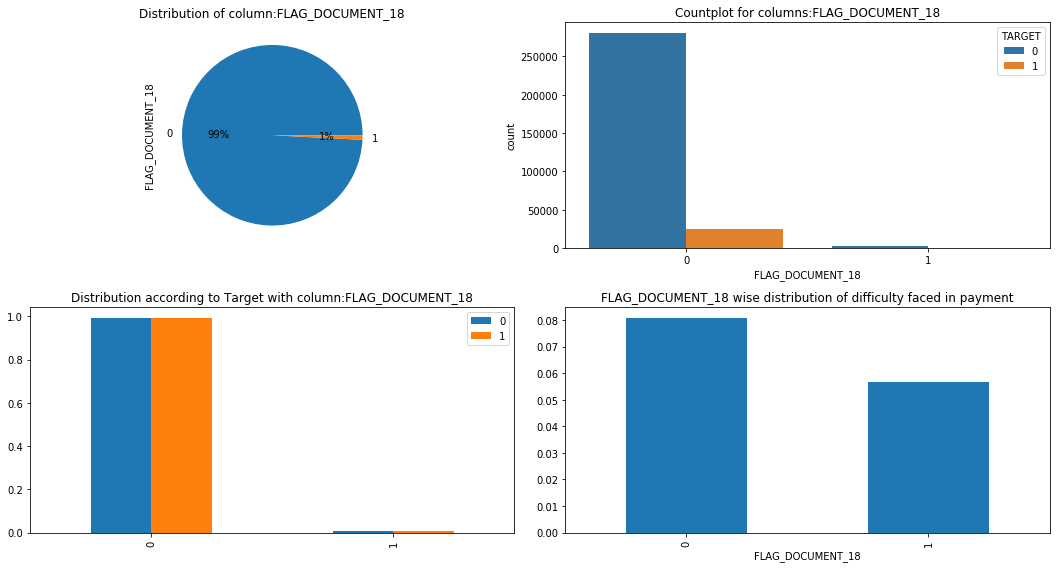

-----------------------------------------------------------------------------------------------------------------------------


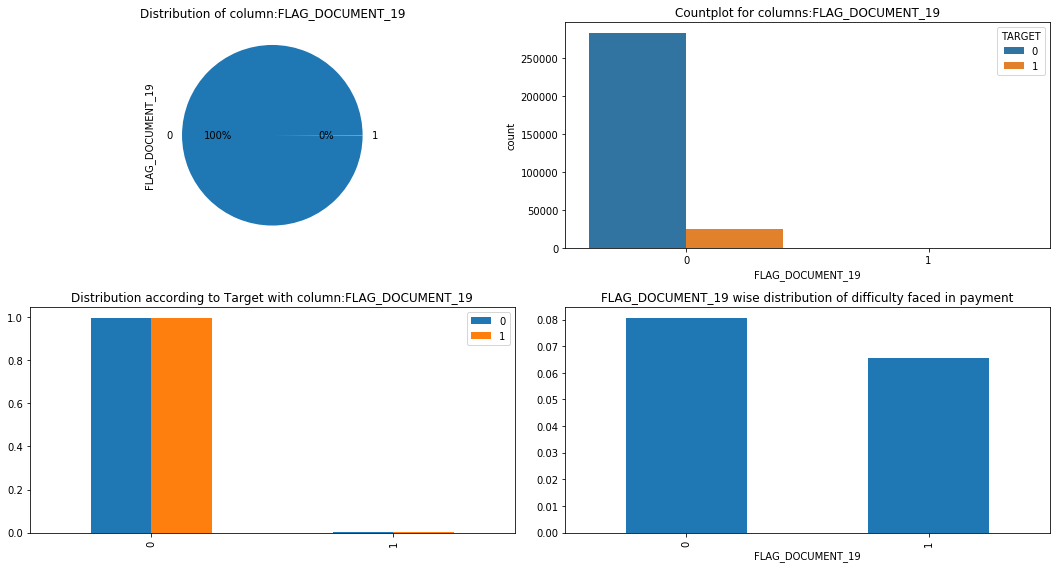

-----------------------------------------------------------------------------------------------------------------------------


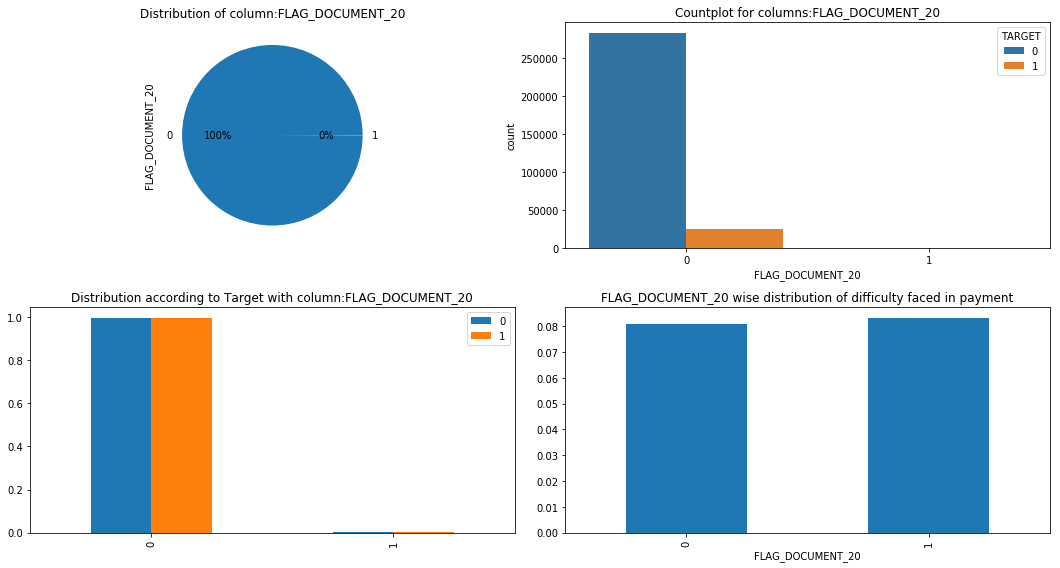

-----------------------------------------------------------------------------------------------------------------------------


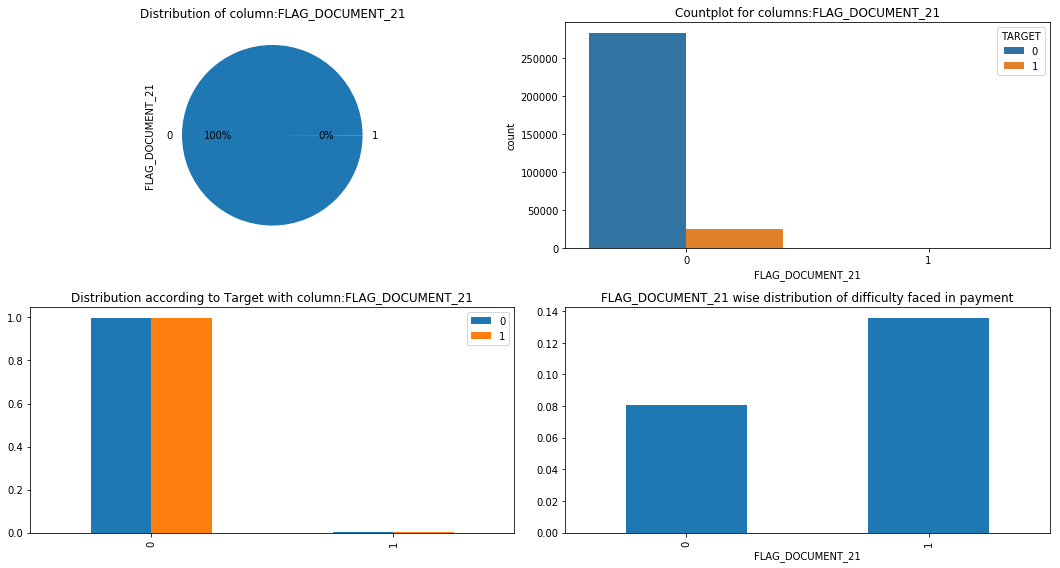

-----------------------------------------------------------------------------------------------------------------------------


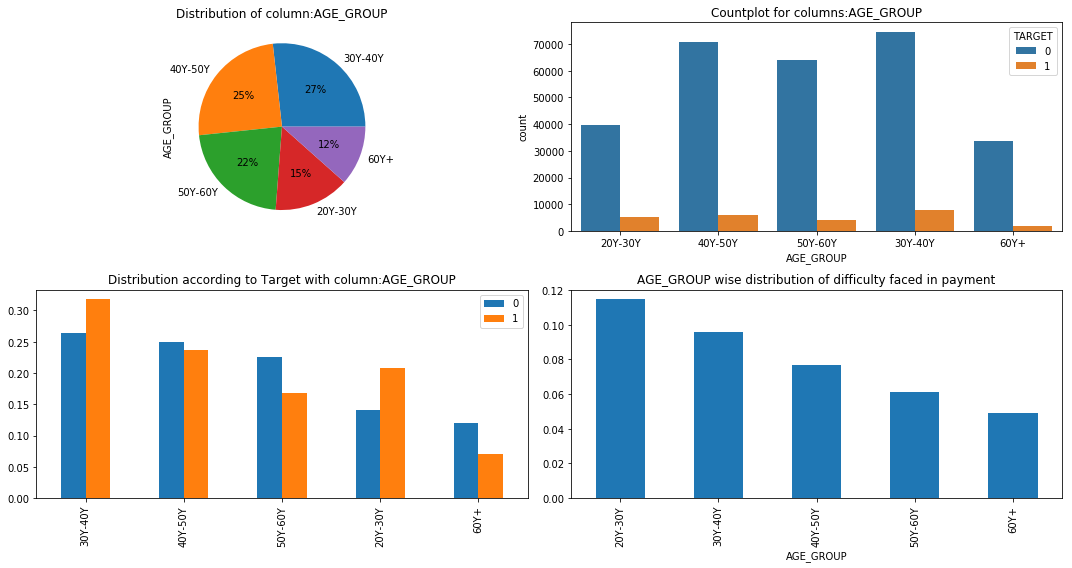

-----------------------------------------------------------------------------------------------------------------------------


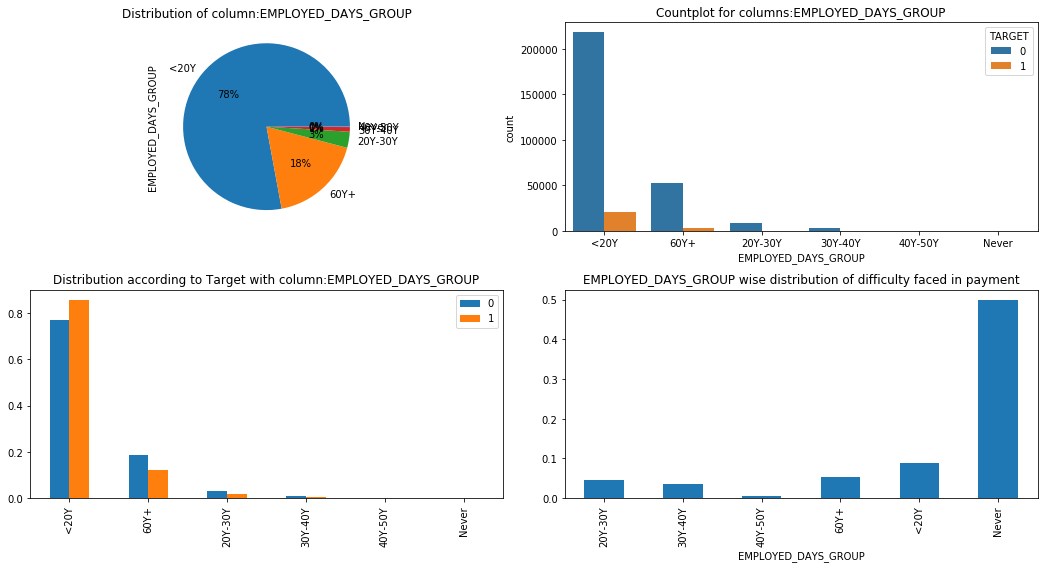

-----------------------------------------------------------------------------------------------------------------------------


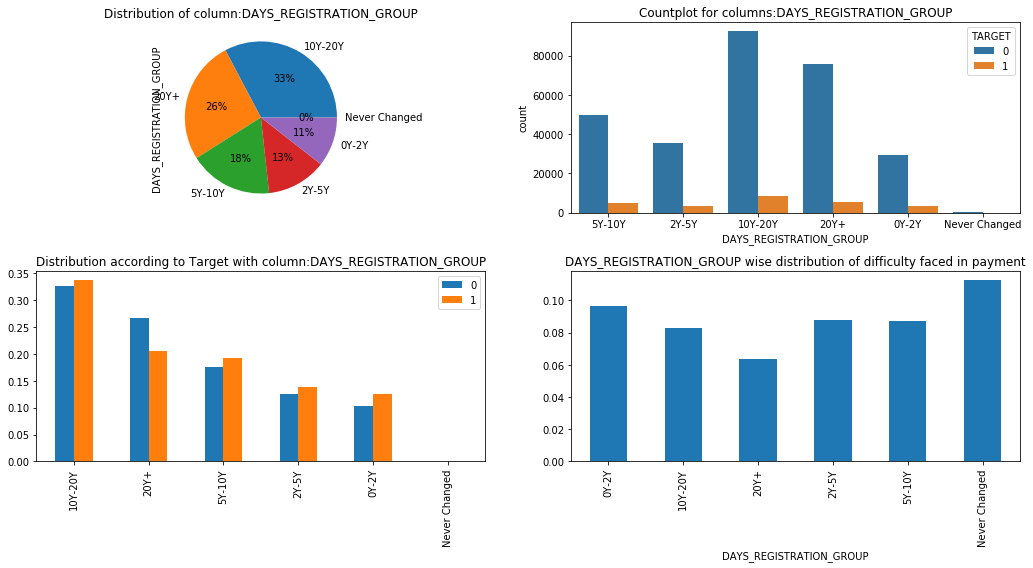

-----------------------------------------------------------------------------------------------------------------------------


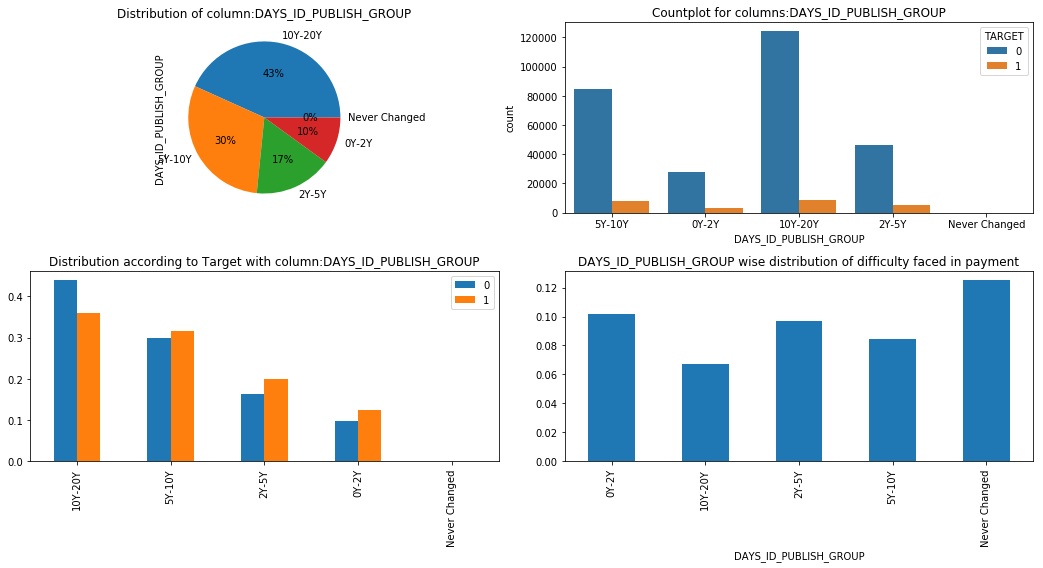

-----------------------------------------------------------------------------------------------------------------------------


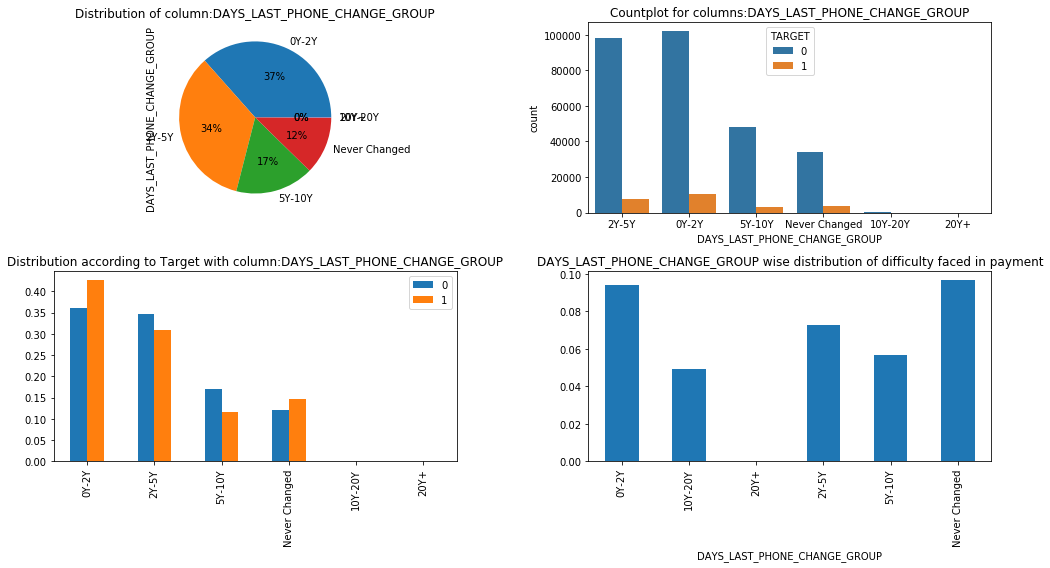

-----------------------------------------------------------------------------------------------------------------------------


In [32]:
for col in categorial_columns:
    target_0 = app_processed_df[app_processed_df['TARGET']==0]
    target_1 = app_processed_df[app_processed_df['TARGET']==1]
    plotting_categorical(app_processed_df, target_0,target_1,col)

In [33]:
## Correlation Matrix
def plottingCorrelation(col1, col2, target_0, target_1):
    fig, (ax1, ax2) = plt.subplots(nrows = 1,ncols = 2,figsize = (10,3), sharey = True)
    #fig = plt.figure(figsize = (10,3))
    corr_0 = target_0[[col1, col2]].corr()
    corr_1 = target_1[[col1, col2]].corr()
    #ax1 = plt.subplot(1,2,1)
    print('Correlation of '+ col1 + ' vs ' + col2 )
    plt.title('Target 0' )
    sns.heatmap(corr_0, annot = True, cmap = 'BuPu', ax= ax1)
    #ax2= plt.subplot(1,2,2)
    plt.title('Target 1' )
    sns.heatmap(corr_1, annot = True, cmap = 'BuPu', ax= ax2)
    plt.yticks(rotation = 90)
    fig.tight_layout()
    plt.show()
    
    print('-----------------------------------------------------------------------------------------------------------------------------')
    

In [34]:
corr_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE']

Correlation of AMT_INCOME_TOTAL vs AMT_CREDIT


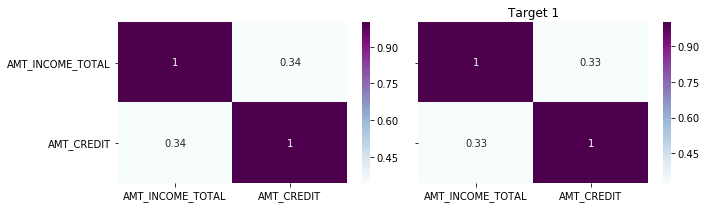

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_INCOME_TOTAL vs AMT_ANNUITY


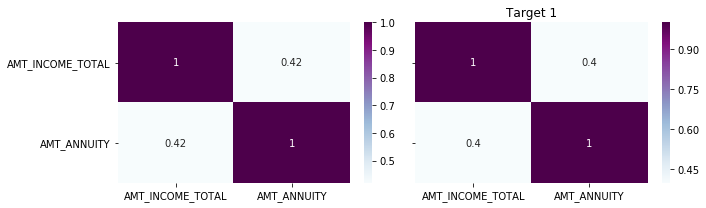

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_INCOME_TOTAL vs AMT_GOODS_PRICE


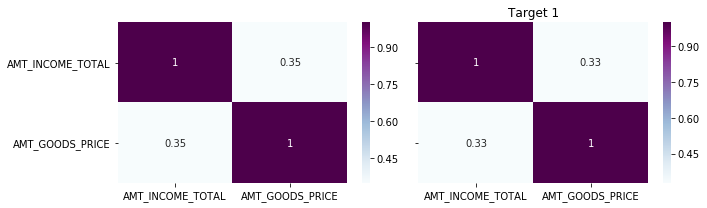

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_INCOME_TOTAL vs DAYS_BIRTH


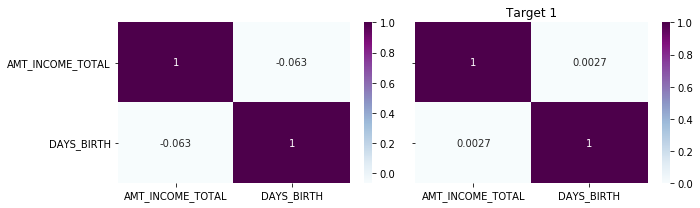

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_INCOME_TOTAL vs DAYS_EMPLOYED


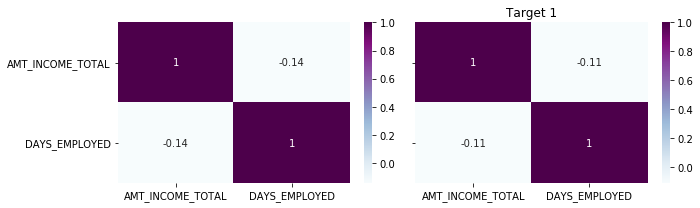

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_INCOME_TOTAL vs DAYS_REGISTRATION


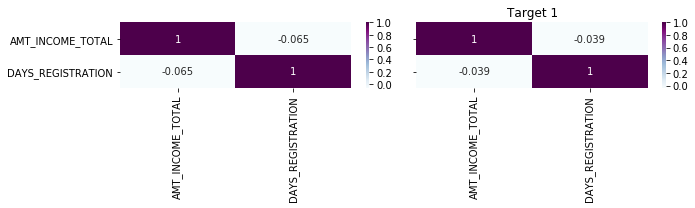

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_INCOME_TOTAL vs DAYS_ID_PUBLISH


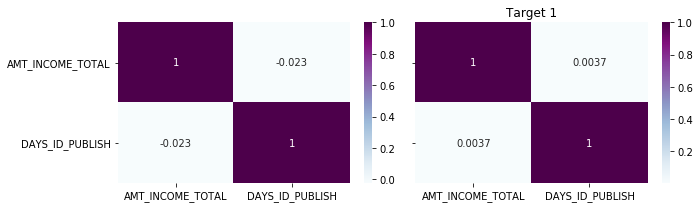

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_INCOME_TOTAL vs EXT_SOURCE_2


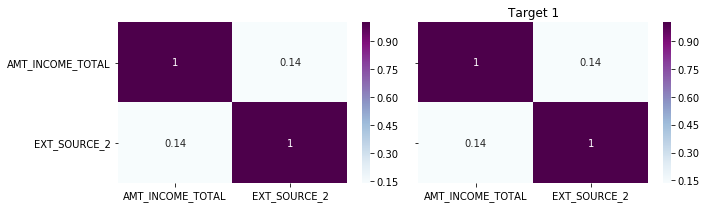

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_INCOME_TOTAL vs EXT_SOURCE_3


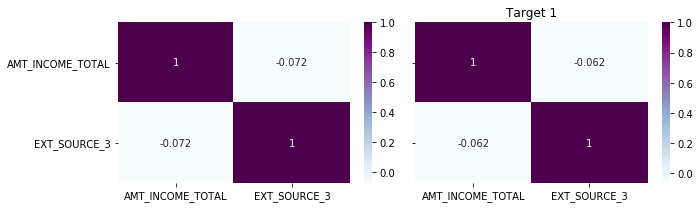

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_INCOME_TOTAL vs OBS_30_CNT_SOCIAL_CIRCLE


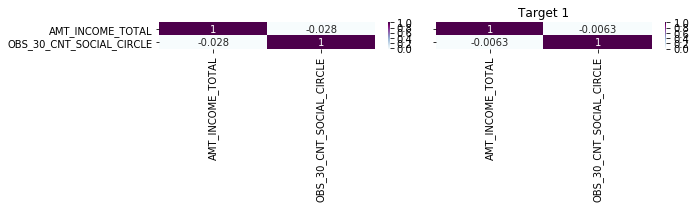

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_INCOME_TOTAL vs DEF_30_CNT_SOCIAL_CIRCLE


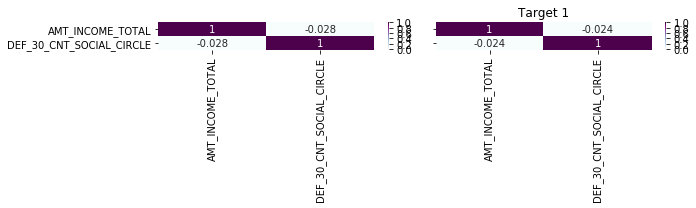

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_INCOME_TOTAL vs OBS_60_CNT_SOCIAL_CIRCLE


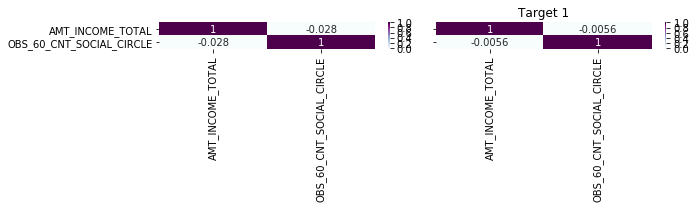

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_INCOME_TOTAL vs DEF_60_CNT_SOCIAL_CIRCLE


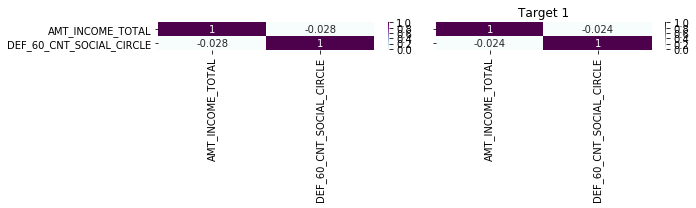

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_INCOME_TOTAL vs DAYS_LAST_PHONE_CHANGE


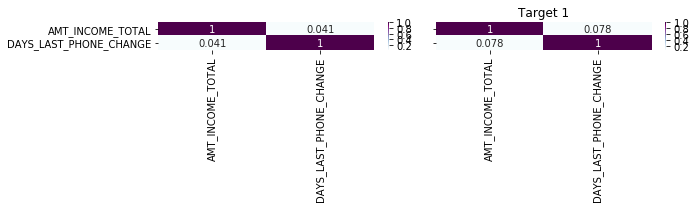

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_CREDIT vs AMT_ANNUITY


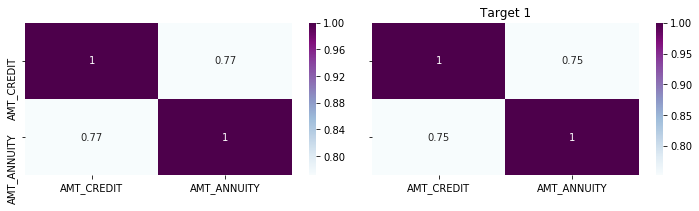

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_CREDIT vs AMT_GOODS_PRICE


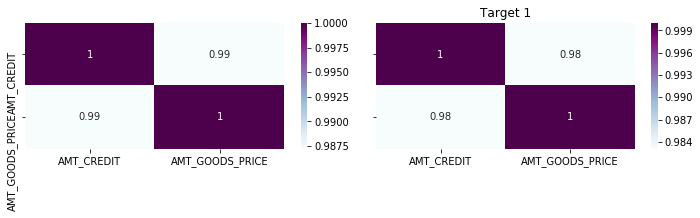

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_CREDIT vs DAYS_BIRTH


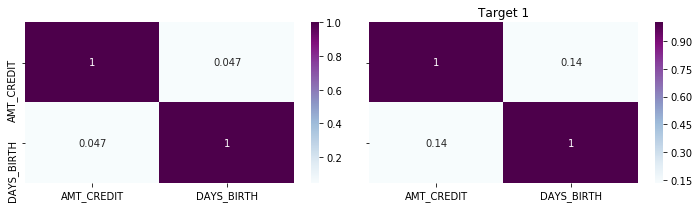

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_CREDIT vs DAYS_EMPLOYED


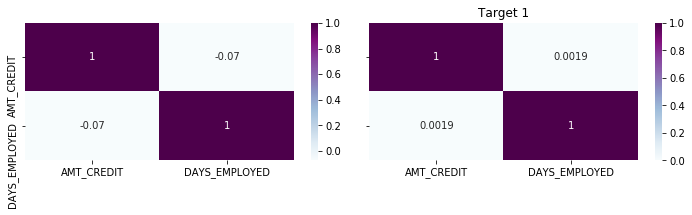

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_CREDIT vs DAYS_REGISTRATION


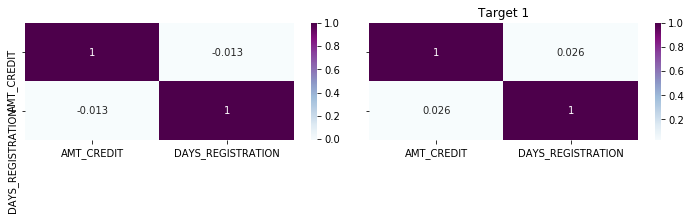

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_CREDIT vs DAYS_ID_PUBLISH


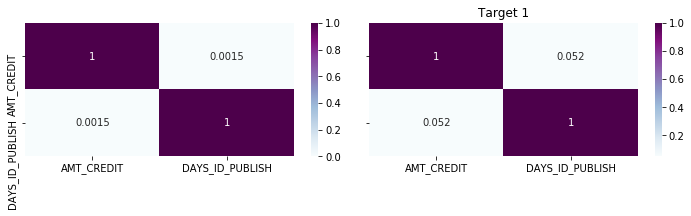

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_CREDIT vs EXT_SOURCE_2


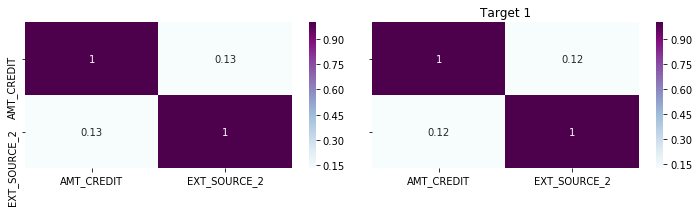

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_CREDIT vs EXT_SOURCE_3


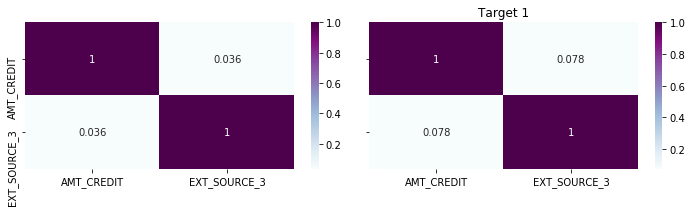

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_CREDIT vs OBS_30_CNT_SOCIAL_CIRCLE


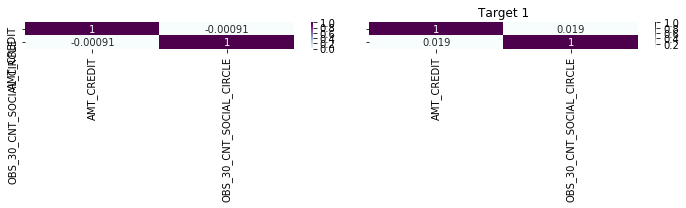

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_CREDIT vs DEF_30_CNT_SOCIAL_CIRCLE


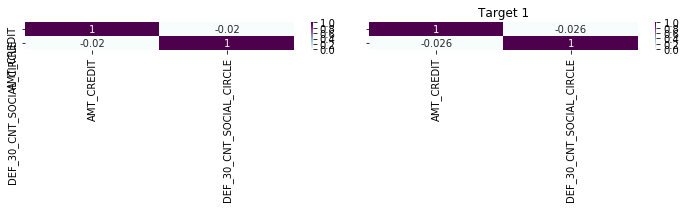

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_CREDIT vs OBS_60_CNT_SOCIAL_CIRCLE


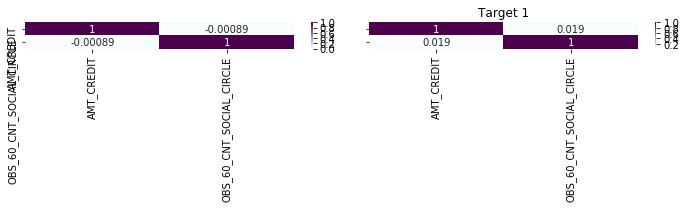

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_CREDIT vs DEF_60_CNT_SOCIAL_CIRCLE


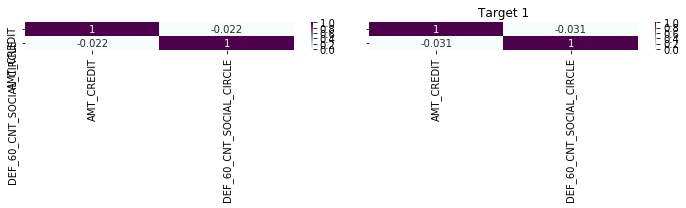

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_CREDIT vs DAYS_LAST_PHONE_CHANGE


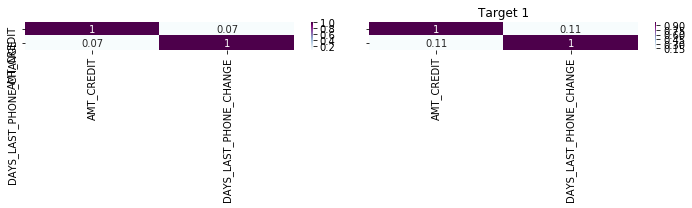

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_ANNUITY vs AMT_GOODS_PRICE


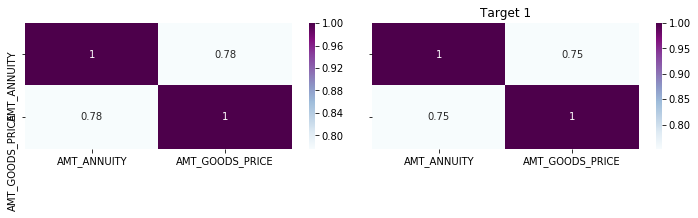

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_ANNUITY vs DAYS_BIRTH


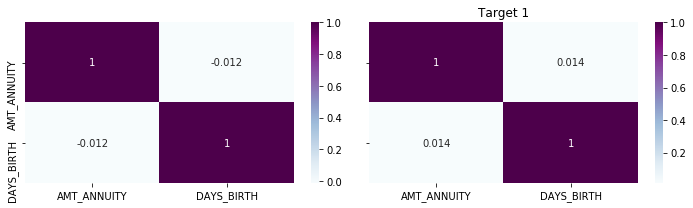

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_ANNUITY vs DAYS_EMPLOYED


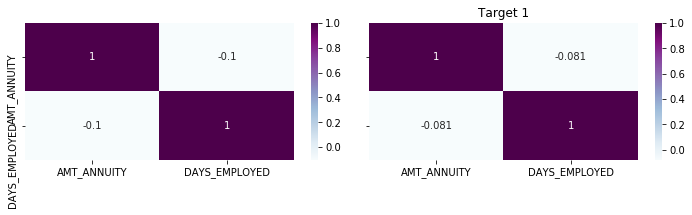

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_ANNUITY vs DAYS_REGISTRATION


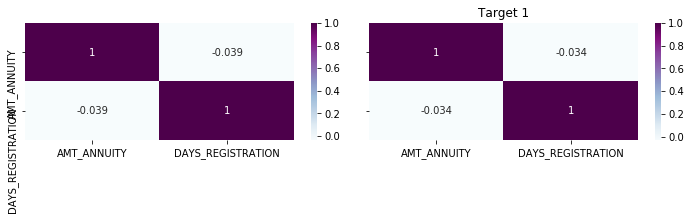

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_ANNUITY vs DAYS_ID_PUBLISH


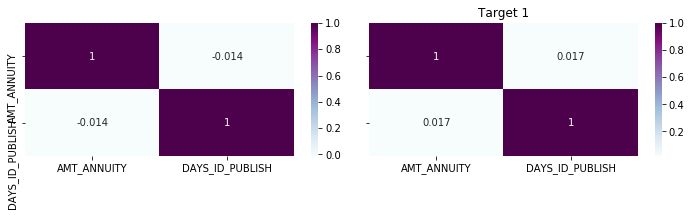

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_ANNUITY vs EXT_SOURCE_2


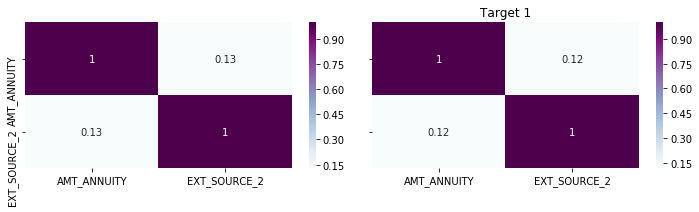

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_ANNUITY vs EXT_SOURCE_3


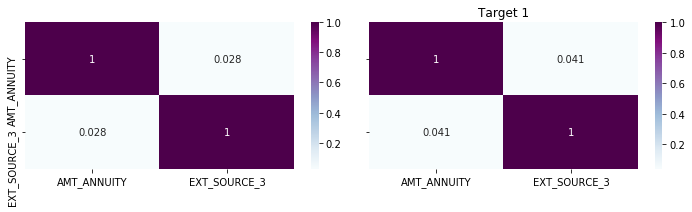

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_ANNUITY vs OBS_30_CNT_SOCIAL_CIRCLE


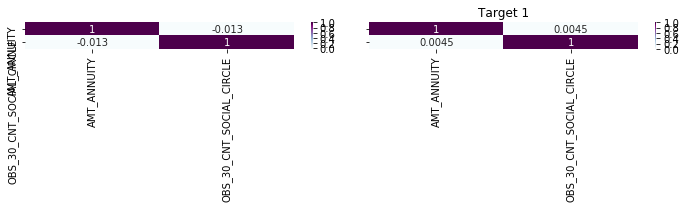

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_ANNUITY vs DEF_30_CNT_SOCIAL_CIRCLE


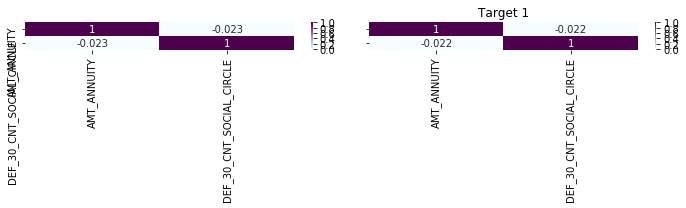

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_ANNUITY vs OBS_60_CNT_SOCIAL_CIRCLE


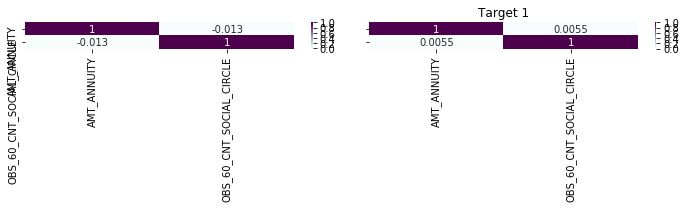

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_ANNUITY vs DEF_60_CNT_SOCIAL_CIRCLE


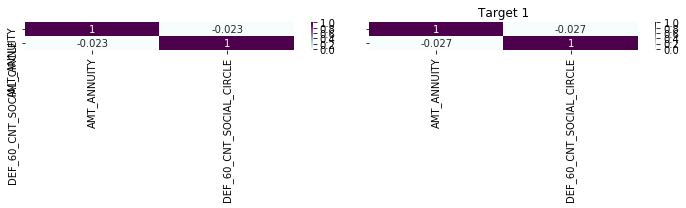

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_ANNUITY vs DAYS_LAST_PHONE_CHANGE


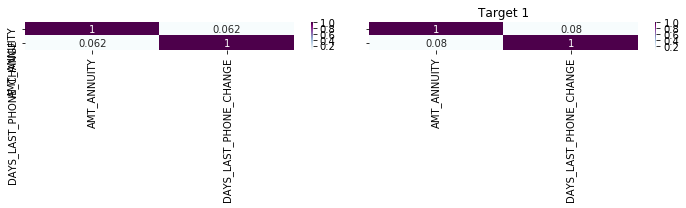

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_GOODS_PRICE vs DAYS_BIRTH


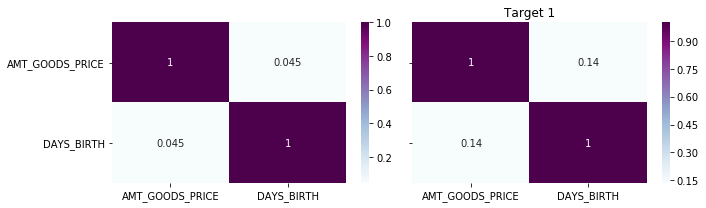

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_GOODS_PRICE vs DAYS_EMPLOYED


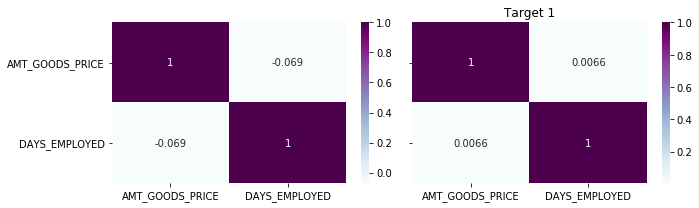

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_GOODS_PRICE vs DAYS_REGISTRATION


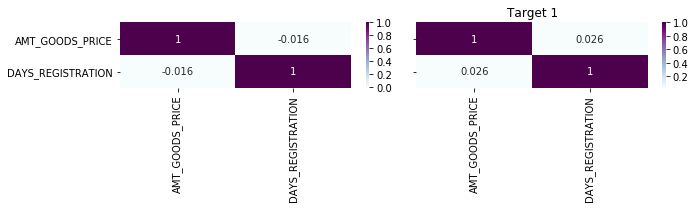

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_GOODS_PRICE vs DAYS_ID_PUBLISH


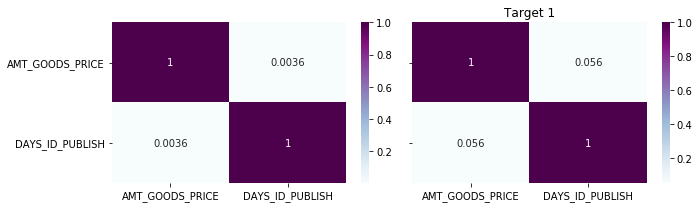

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_GOODS_PRICE vs EXT_SOURCE_2


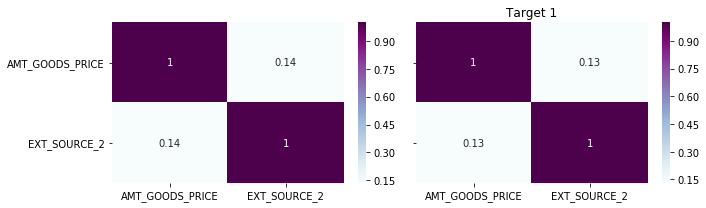

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_GOODS_PRICE vs EXT_SOURCE_3


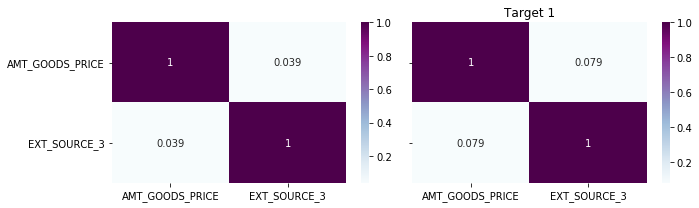

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_GOODS_PRICE vs OBS_30_CNT_SOCIAL_CIRCLE


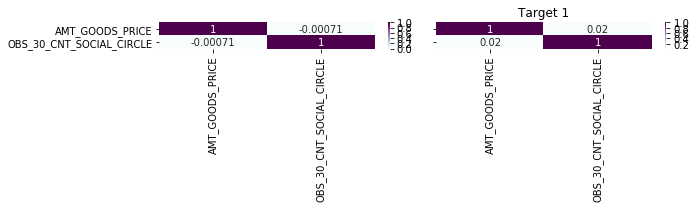

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_GOODS_PRICE vs DEF_30_CNT_SOCIAL_CIRCLE


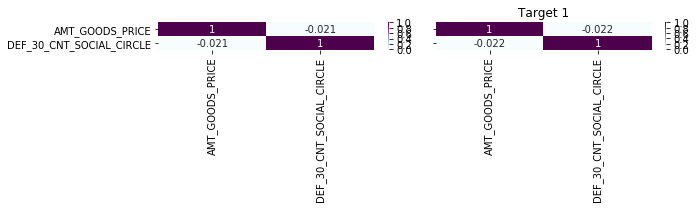

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_GOODS_PRICE vs OBS_60_CNT_SOCIAL_CIRCLE


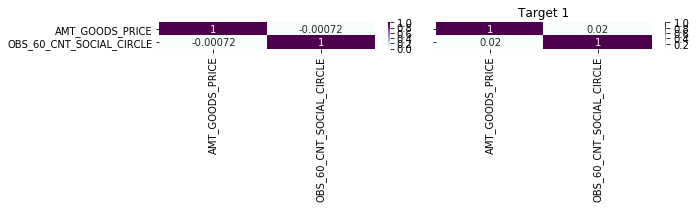

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_GOODS_PRICE vs DEF_60_CNT_SOCIAL_CIRCLE


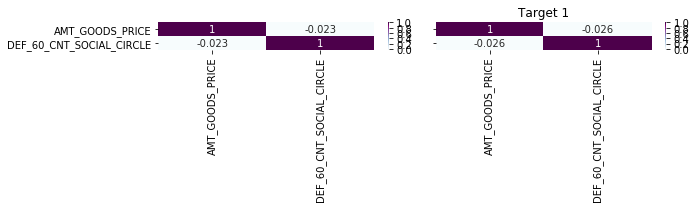

-----------------------------------------------------------------------------------------------------------------------------
Correlation of AMT_GOODS_PRICE vs DAYS_LAST_PHONE_CHANGE


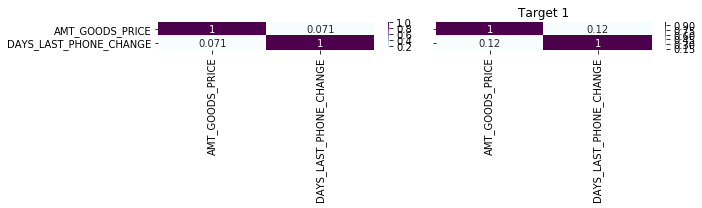

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_BIRTH vs DAYS_EMPLOYED


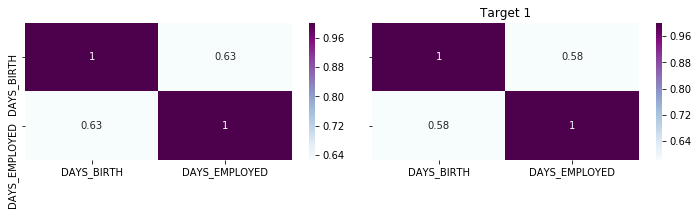

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_BIRTH vs DAYS_REGISTRATION


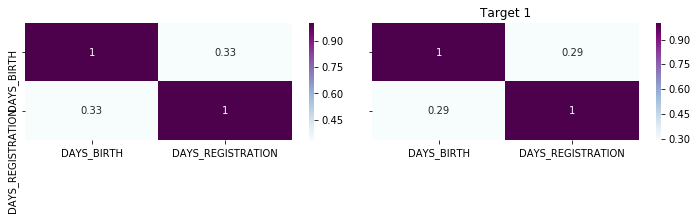

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_BIRTH vs DAYS_ID_PUBLISH


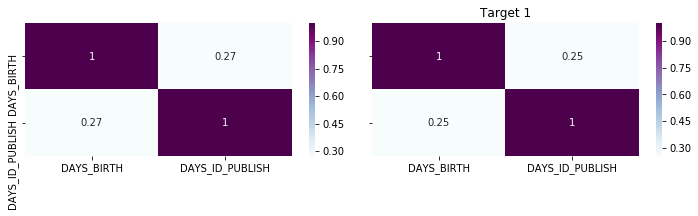

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_BIRTH vs EXT_SOURCE_2


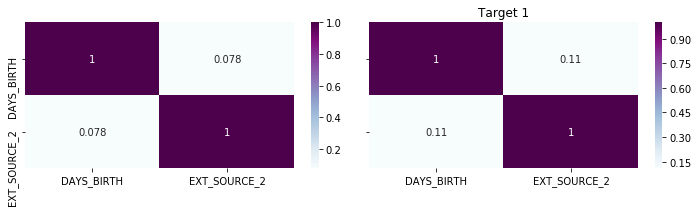

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_BIRTH vs EXT_SOURCE_3


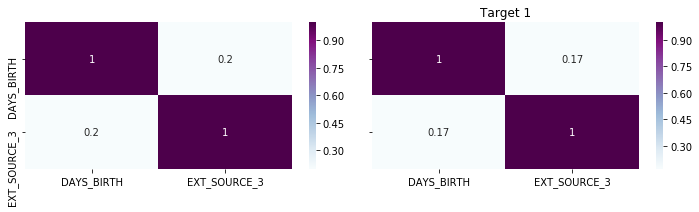

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_BIRTH vs OBS_30_CNT_SOCIAL_CIRCLE


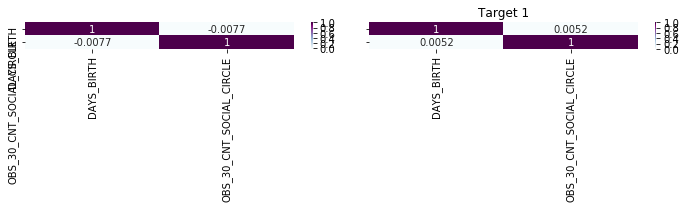

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_BIRTH vs DEF_30_CNT_SOCIAL_CIRCLE


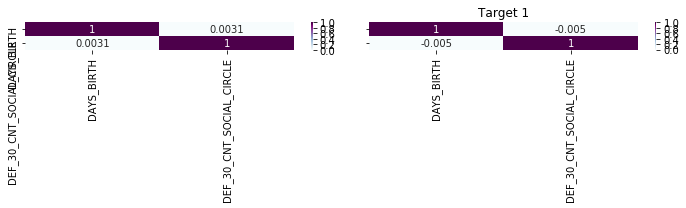

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_BIRTH vs OBS_60_CNT_SOCIAL_CIRCLE


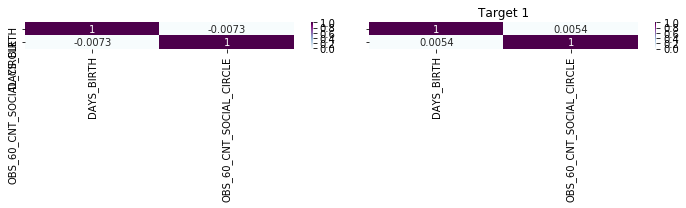

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_BIRTH vs DEF_60_CNT_SOCIAL_CIRCLE


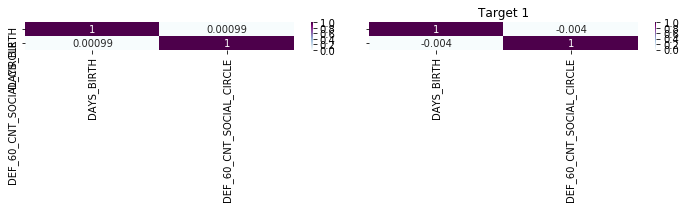

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_BIRTH vs DAYS_LAST_PHONE_CHANGE


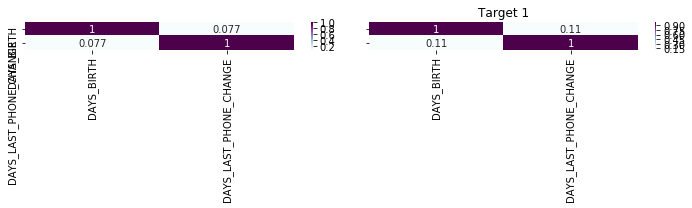

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_EMPLOYED vs DAYS_REGISTRATION


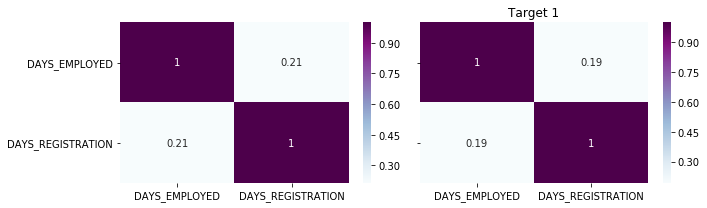

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_EMPLOYED vs DAYS_ID_PUBLISH


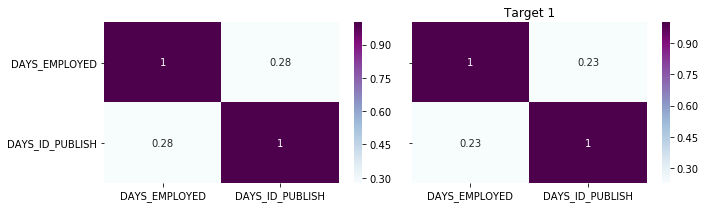

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_EMPLOYED vs EXT_SOURCE_2


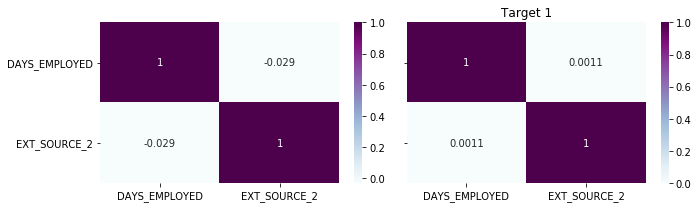

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_EMPLOYED vs EXT_SOURCE_3


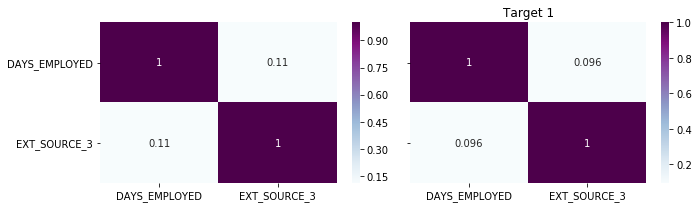

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_EMPLOYED vs OBS_30_CNT_SOCIAL_CIRCLE


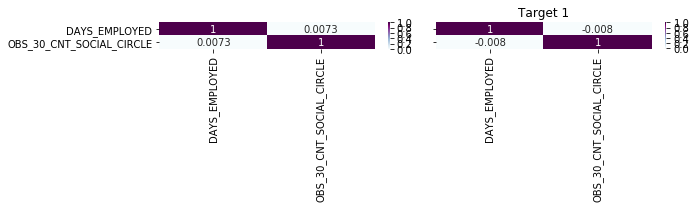

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_EMPLOYED vs DEF_30_CNT_SOCIAL_CIRCLE


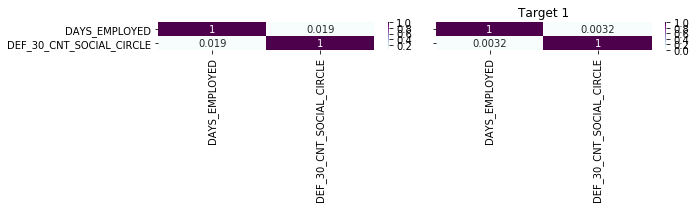

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_EMPLOYED vs OBS_60_CNT_SOCIAL_CIRCLE


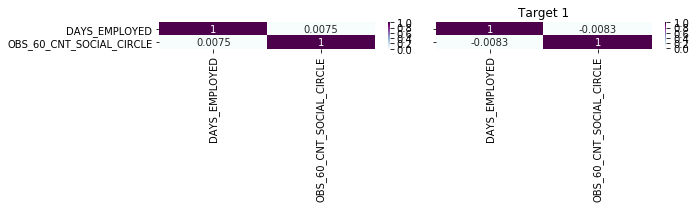

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_EMPLOYED vs DEF_60_CNT_SOCIAL_CIRCLE


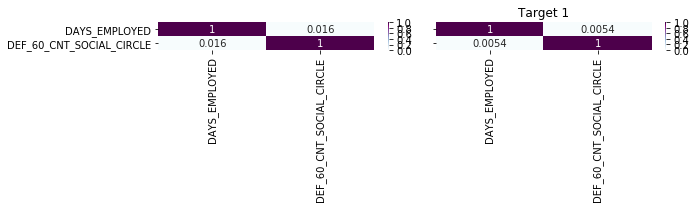

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_EMPLOYED vs DAYS_LAST_PHONE_CHANGE


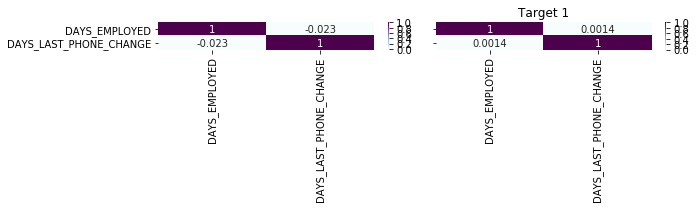

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_REGISTRATION vs DAYS_ID_PUBLISH


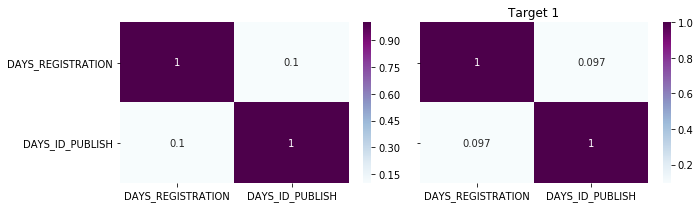

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_REGISTRATION vs EXT_SOURCE_2


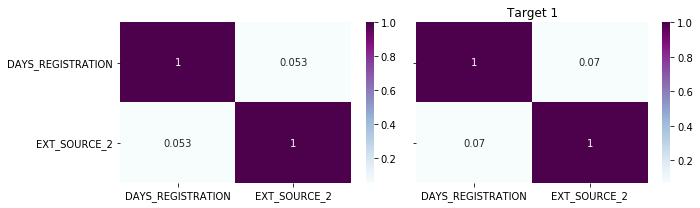

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_REGISTRATION vs EXT_SOURCE_3


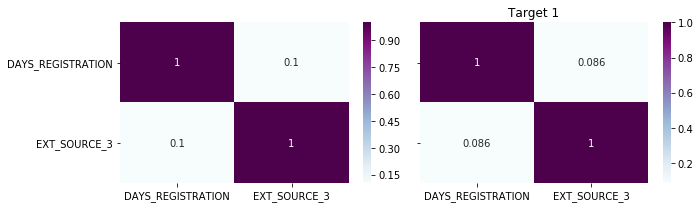

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_REGISTRATION vs OBS_30_CNT_SOCIAL_CIRCLE


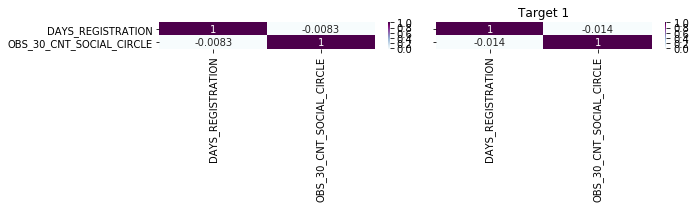

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_REGISTRATION vs DEF_30_CNT_SOCIAL_CIRCLE


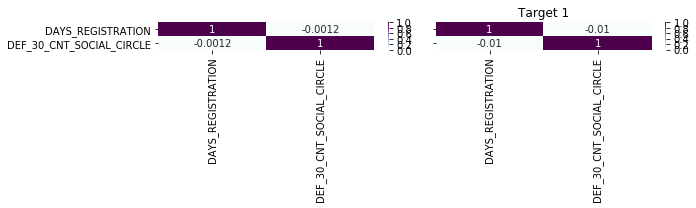

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_REGISTRATION vs OBS_60_CNT_SOCIAL_CIRCLE


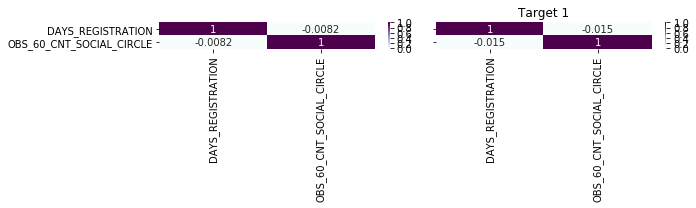

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_REGISTRATION vs DEF_60_CNT_SOCIAL_CIRCLE


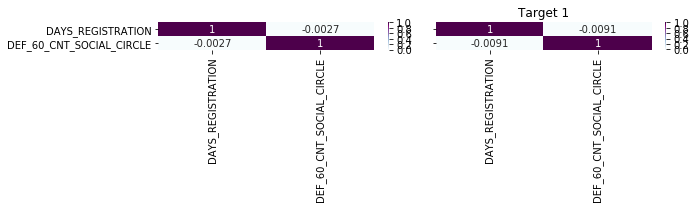

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_REGISTRATION vs DAYS_LAST_PHONE_CHANGE


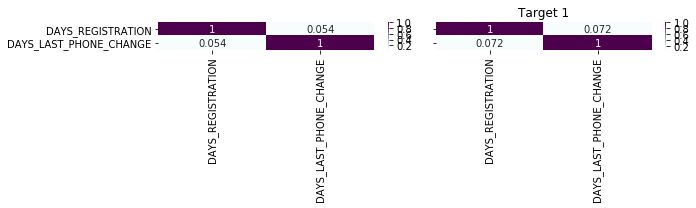

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_ID_PUBLISH vs EXT_SOURCE_2


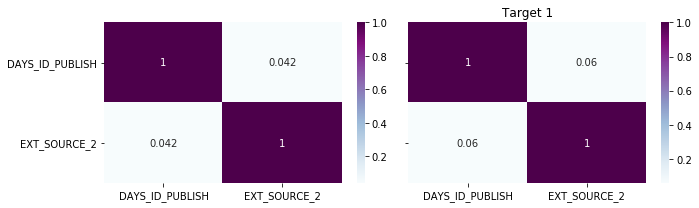

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_ID_PUBLISH vs EXT_SOURCE_3


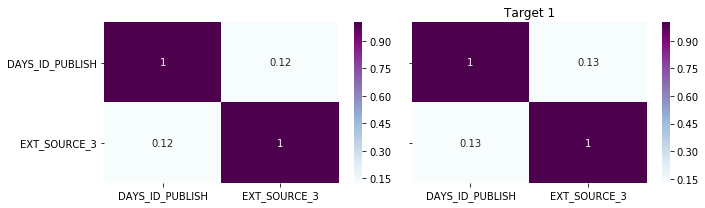

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_ID_PUBLISH vs OBS_30_CNT_SOCIAL_CIRCLE


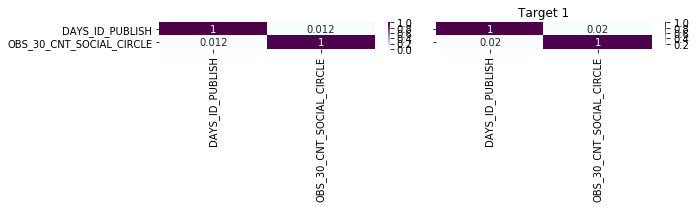

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_ID_PUBLISH vs DEF_30_CNT_SOCIAL_CIRCLE


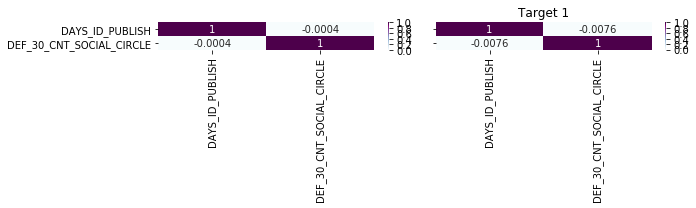

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_ID_PUBLISH vs OBS_60_CNT_SOCIAL_CIRCLE


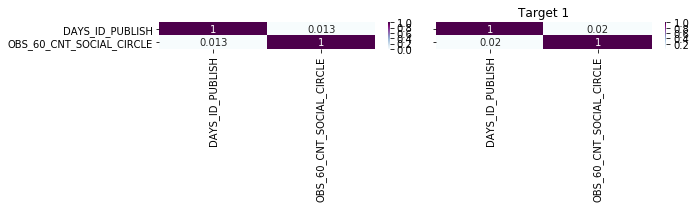

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_ID_PUBLISH vs DEF_60_CNT_SOCIAL_CIRCLE


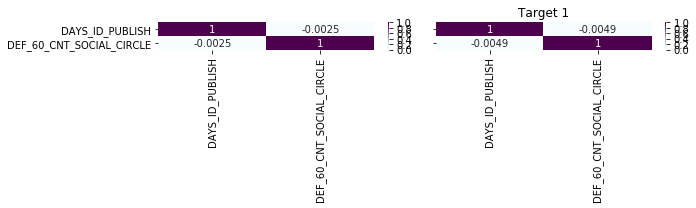

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DAYS_ID_PUBLISH vs DAYS_LAST_PHONE_CHANGE


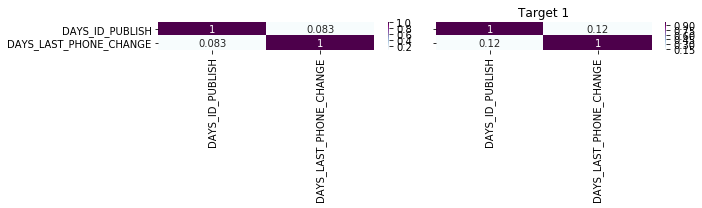

-----------------------------------------------------------------------------------------------------------------------------
Correlation of EXT_SOURCE_2 vs EXT_SOURCE_3


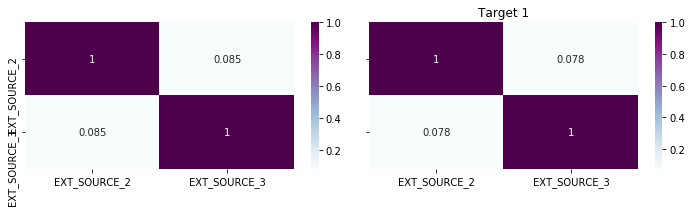

-----------------------------------------------------------------------------------------------------------------------------
Correlation of EXT_SOURCE_2 vs OBS_30_CNT_SOCIAL_CIRCLE


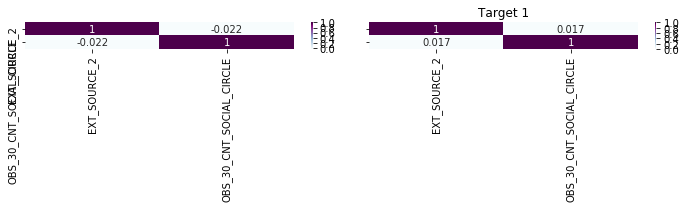

-----------------------------------------------------------------------------------------------------------------------------
Correlation of EXT_SOURCE_2 vs DEF_30_CNT_SOCIAL_CIRCLE


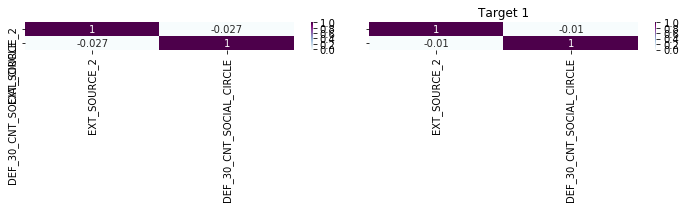

-----------------------------------------------------------------------------------------------------------------------------
Correlation of EXT_SOURCE_2 vs OBS_60_CNT_SOCIAL_CIRCLE


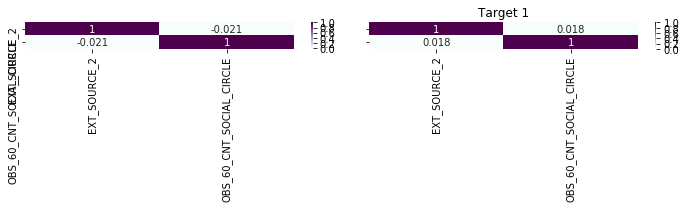

-----------------------------------------------------------------------------------------------------------------------------
Correlation of EXT_SOURCE_2 vs DEF_60_CNT_SOCIAL_CIRCLE


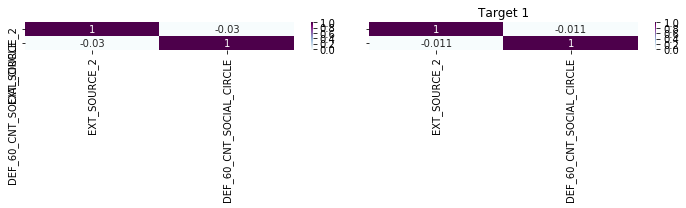

-----------------------------------------------------------------------------------------------------------------------------
Correlation of EXT_SOURCE_2 vs DAYS_LAST_PHONE_CHANGE


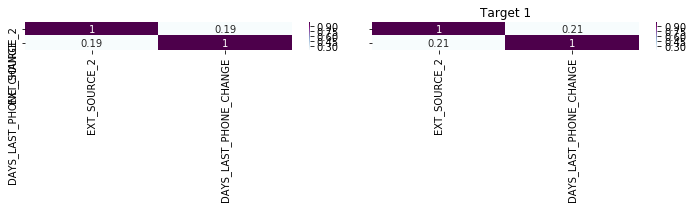

-----------------------------------------------------------------------------------------------------------------------------
Correlation of EXT_SOURCE_3 vs OBS_30_CNT_SOCIAL_CIRCLE


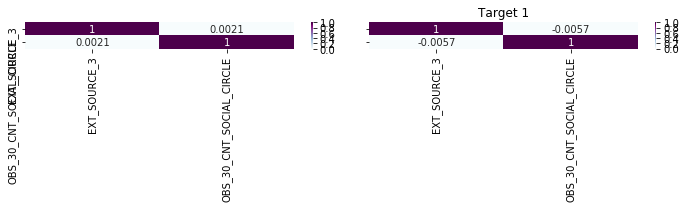

-----------------------------------------------------------------------------------------------------------------------------
Correlation of EXT_SOURCE_3 vs DEF_30_CNT_SOCIAL_CIRCLE


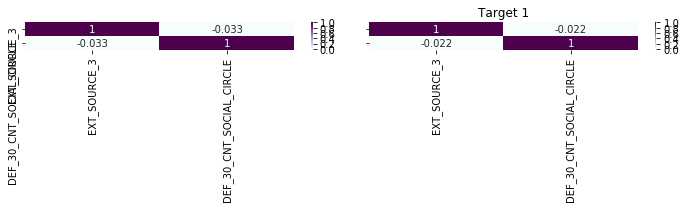

-----------------------------------------------------------------------------------------------------------------------------
Correlation of EXT_SOURCE_3 vs OBS_60_CNT_SOCIAL_CIRCLE


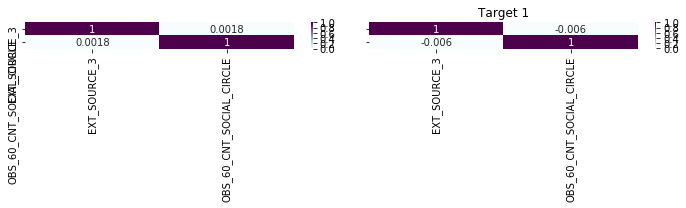

-----------------------------------------------------------------------------------------------------------------------------
Correlation of EXT_SOURCE_3 vs DEF_60_CNT_SOCIAL_CIRCLE


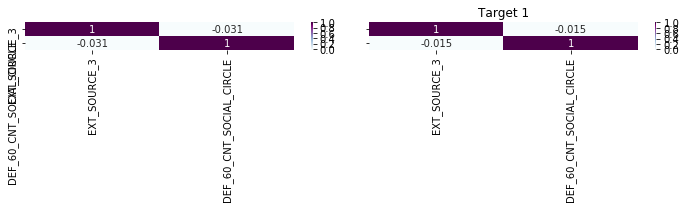

-----------------------------------------------------------------------------------------------------------------------------
Correlation of EXT_SOURCE_3 vs DAYS_LAST_PHONE_CHANGE


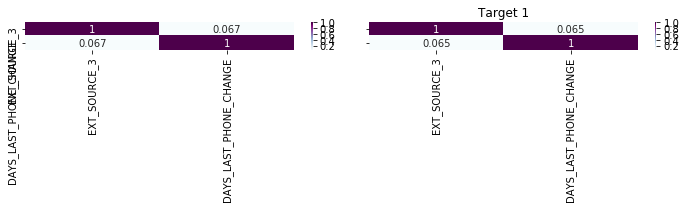

-----------------------------------------------------------------------------------------------------------------------------
Correlation of OBS_30_CNT_SOCIAL_CIRCLE vs DEF_30_CNT_SOCIAL_CIRCLE


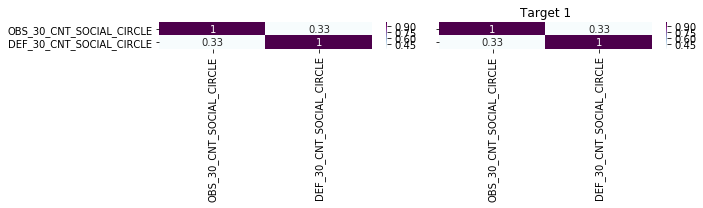

-----------------------------------------------------------------------------------------------------------------------------
Correlation of OBS_30_CNT_SOCIAL_CIRCLE vs OBS_60_CNT_SOCIAL_CIRCLE


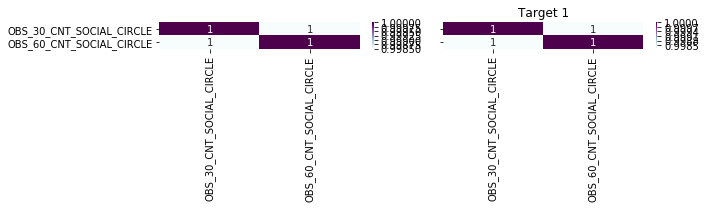

-----------------------------------------------------------------------------------------------------------------------------
Correlation of OBS_30_CNT_SOCIAL_CIRCLE vs DEF_60_CNT_SOCIAL_CIRCLE


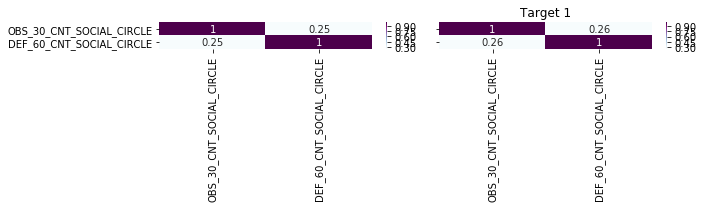

-----------------------------------------------------------------------------------------------------------------------------
Correlation of OBS_30_CNT_SOCIAL_CIRCLE vs DAYS_LAST_PHONE_CHANGE


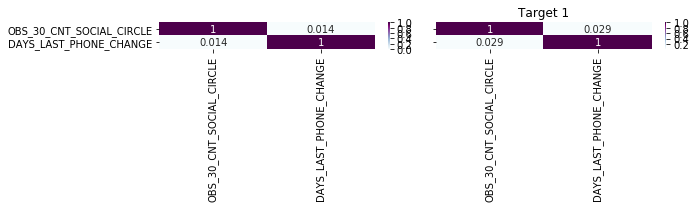

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DEF_30_CNT_SOCIAL_CIRCLE vs OBS_60_CNT_SOCIAL_CIRCLE


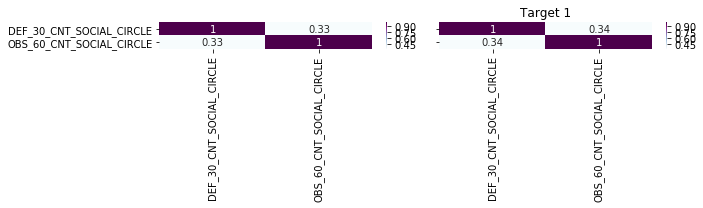

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DEF_30_CNT_SOCIAL_CIRCLE vs DEF_60_CNT_SOCIAL_CIRCLE


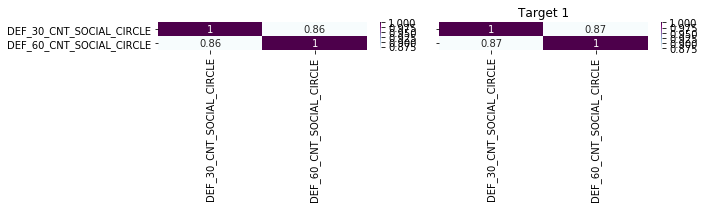

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DEF_30_CNT_SOCIAL_CIRCLE vs DAYS_LAST_PHONE_CHANGE


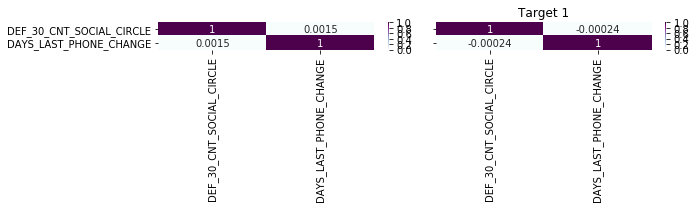

-----------------------------------------------------------------------------------------------------------------------------
Correlation of OBS_60_CNT_SOCIAL_CIRCLE vs DEF_60_CNT_SOCIAL_CIRCLE


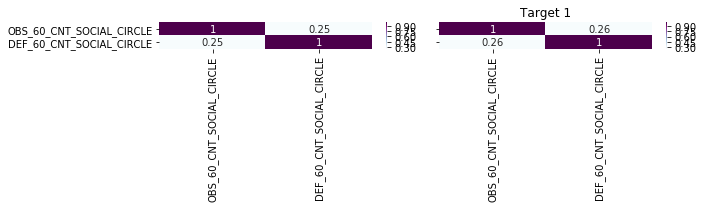

-----------------------------------------------------------------------------------------------------------------------------
Correlation of OBS_60_CNT_SOCIAL_CIRCLE vs DAYS_LAST_PHONE_CHANGE


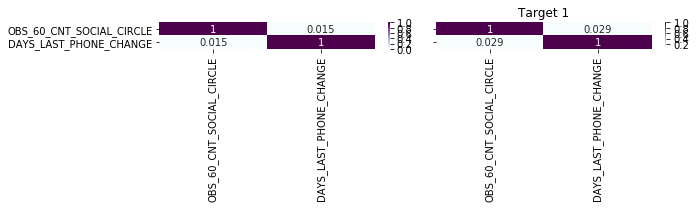

-----------------------------------------------------------------------------------------------------------------------------
Correlation of DEF_60_CNT_SOCIAL_CIRCLE vs DAYS_LAST_PHONE_CHANGE


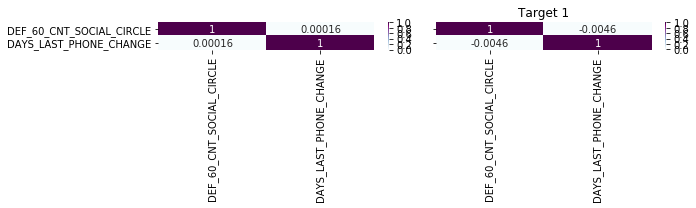

-----------------------------------------------------------------------------------------------------------------------------


In [35]:

target_0 = app_processed_df[app_processed_df['TARGET']==0]
target_1 = app_processed_df[app_processed_df['TARGET']==1]
for col_pos in range(len(corr_cols)):
    for col_pos2 in range(col_pos+1, len(corr_cols)):
        #print(corr_cols[col_pos], corr_cols[col_pos2])
        plottingCorrelation(corr_cols[col_pos], corr_cols[col_pos2], target_0,target_1)

In [36]:
univar_con_cols =  ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE']

In [37]:
def plotting_continuous(col, target_0, target_1):
    sns.distplot(target_0[col], hist = False, label = '0')
    sns.distplot(target_1[col], hist = False, label = '1')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------------------')

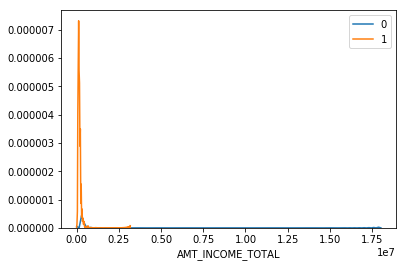

-----------------------------------------------------------------------------------------------------------------


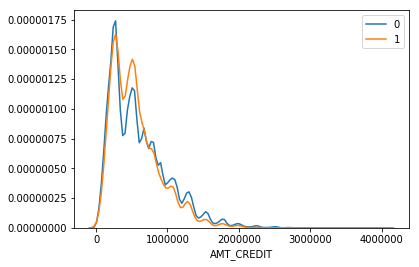

-----------------------------------------------------------------------------------------------------------------


C:\Users\Casterwill\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Casterwill\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


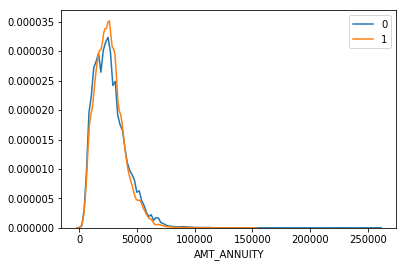

-----------------------------------------------------------------------------------------------------------------


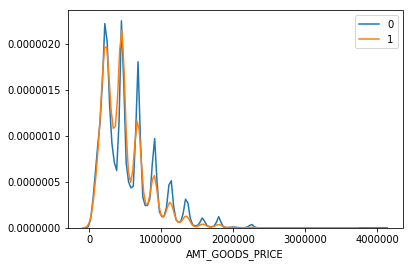

-----------------------------------------------------------------------------------------------------------------


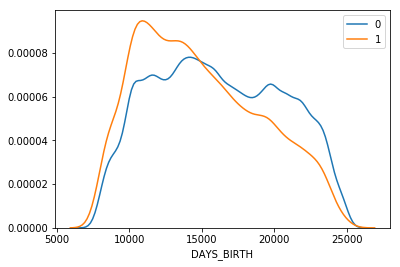

-----------------------------------------------------------------------------------------------------------------


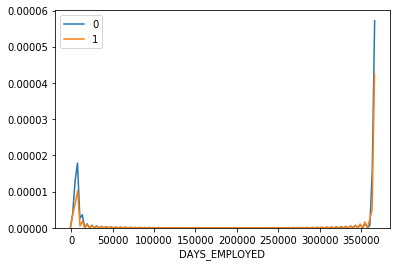

-----------------------------------------------------------------------------------------------------------------


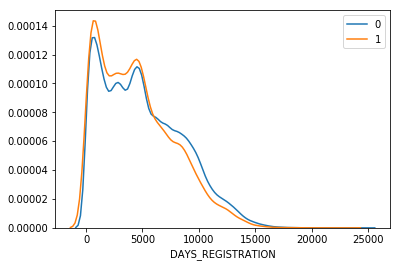

-----------------------------------------------------------------------------------------------------------------


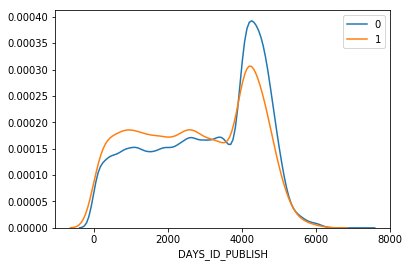

-----------------------------------------------------------------------------------------------------------------


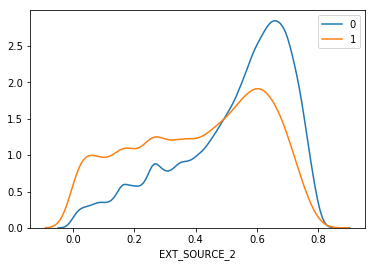

-----------------------------------------------------------------------------------------------------------------


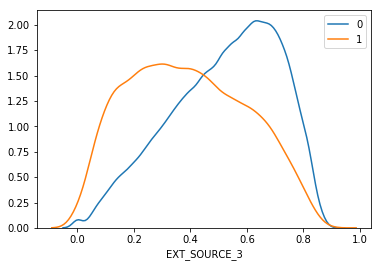

-----------------------------------------------------------------------------------------------------------------


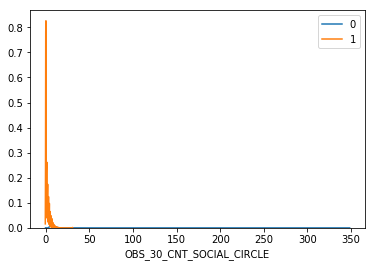

-----------------------------------------------------------------------------------------------------------------


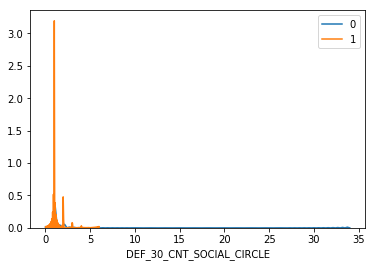

-----------------------------------------------------------------------------------------------------------------


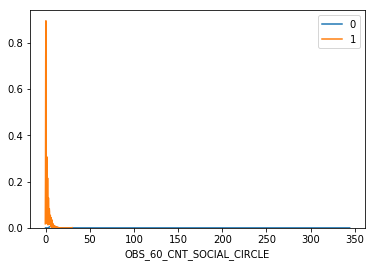

-----------------------------------------------------------------------------------------------------------------


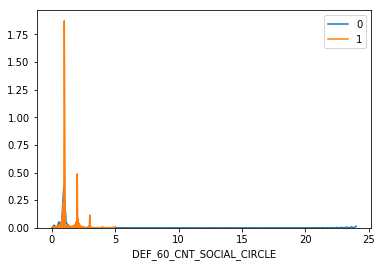

-----------------------------------------------------------------------------------------------------------------


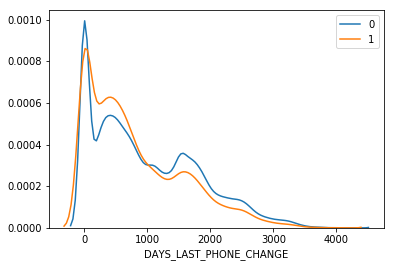

-----------------------------------------------------------------------------------------------------------------


In [38]:
target_0 = app_processed_df[app_processed_df['TARGET']==0]
target_1 = app_processed_df[app_processed_df['TARGET']==1]
for col in univar_con_cols:
    plotting_continuous(col, target_0, target_1)

In [39]:
## Missing Values Treatment

In [40]:

miss_df = (app_processed_df.isnull().sum()/len(app_processed_df))*100
miss_df[miss_df > 0]

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090404
NAME_TYPE_SUITE                0.420149
OCCUPATION_TYPE               31.345647
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214627
EXT_SOURCE_3                  19.825372
OBS_30_CNT_SOCIAL_CIRCLE       0.332022
DEF_30_CNT_SOCIAL_CIRCLE       0.332022
OBS_60_CNT_SOCIAL_CIRCLE       0.332022
DEF_60_CNT_SOCIAL_CIRCLE       0.332022
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501675
AMT_REQ_CREDIT_BUREAU_DAY     13.501675
AMT_REQ_CREDIT_BUREAU_WEEK    13.501675
AMT_REQ_CREDIT_BUREAU_MON     13.501675
AMT_REQ_CREDIT_BUREAU_QRT     13.501675
AMT_REQ_CREDIT_BUREAU_YEAR    13.501675
dtype: float64

In [41]:
missing_cols_cate = ['OCCUPATION_TYPE','CNT_FAM_MEMBERS','NAME_TYPE_SUITE']

OCCUPATION_TYPE


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
8           100011       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
23          100027       0         Cash loans           F            N   
28          100033       0         Cash loans           M            Y   
30          100035       0         Cash loans           F            N   
38          100045       0         Cash loans           F            N   
43          100050       0         Cash loans           F            N   
44          100051       0         Cash loans           M            N   
46          100053       0         Cash loans           F            N   
52          100060       0         Cash loans           M            Y   
54          100062       0         Cash loans           M            Y   
56          100064       0         Cash loans           F            N   
62          100073       0         Cash loans           M            Y   
63          100075       0         Cash loans           F            N   
76          100088       0    Revolving loans           F            N   
79          100094       0         Cash loans           F            N   
81          100096       1         Cash loans           F            N   
82          100097       0         Cash loans           M            Y   
84          100099       0         Cash loans           F            N   
88          100103       0         Cash loans           F            N   
94          100112       1         Cash loans           M            Y   
97          100115       0         Cash loans           F            N   
99          100118       0         Cash loans           F            N   
105         100124       0         Cash loans           M            N   
106         100125       0         Cash loans           F            N   
107         100126       0    Revolving loans           M            N   
108         100127       0         Cash loans           M            N   
109         100129       0    Revolving loans           F            Y   
117         100137       0         Cash loans           F            Y   
118         100138       0         Cash loans           M            Y   
...            ...     ...                ...         ...          ...   
307412      456145       0         Cash loans           F            N   
307417      456150       0         Cash loans           F            N   
307420      456153       0         Cash loans           F            N   
307421      456154       0         Cash loans           M            Y   
307422      456155       0         Cash loans           F            N   
307423      456156       0         Cash loans           M            N   
307424      456157       0         Cash loans           F            N   
307426      456159       0         Cash loans           F            N   
307428      456161       0         Cash loans           F            N   
307430      456163       0         Cash loans           F            N   
307431      456164       0         Cash loans           F            N   
307433      456171       1         Cash loans           M            N   
307434      456172       0         Cash loans           F            Y   
307441      456179       0         Cash loans           F            N   
307443      456181       0         Cash loans           F            N   
307444      456182       0    Revolving loans           F            N   
307445      456183       0         Cash loans           F            Y   
307447      456185       0         Cash loans           F            N   
307450      456188       0         Cash loans           F            N   
307452      456191       0         Cash loans           F            Y   
307463      456203       0         Cash loans           F            N   
307468      456208       0         Cash loans           F            N   
307469      

0    Laborers
dtype: object

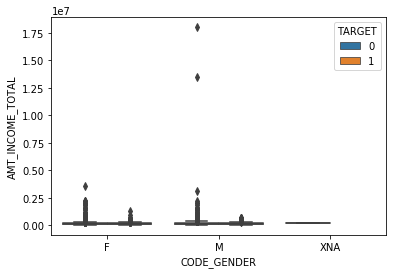

-------------------------------------------------------------------------------------------------------------
CNT_FAM_MEMBERS


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982       33750.0              NaN             NaN  Commercial associate   
187348      29250.0              NaN             NaN  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                     0.015221       12396           1161   
187348                    0.031329       12844            232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
41982              3265.0             4489           1               1   
187348             1597.0             1571           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
41982                 1                 1           1           0   
187348                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982         Managers              NaN                     2   
187348     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
41982                         1               Insurance      0.700618   
187348                        0  Business Entity Type 2      0.645168   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
41982            NaN                       3.0                       0.0   
187348      0.670652                       1.0                       0.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
41982                        3.0                       0.0   
187348                       1.0                       0.0   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
41982                    876.0                0                0   
187348                   654.0                0                0   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
41982                 0                1                0                0   
187348                0                0                0                1   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
41982                 0                0                 0                 0   
187348                0                0                 0                 0   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
41982                  0                 0                 0   
187348                 0                 0                 0   

        FLAG_DOCUMENT_15  FLA

0    2.0
dtype: float64

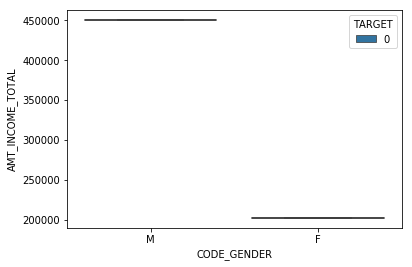

-------------------------------------------------------------------------------------------------------------
NAME_TYPE_SUITE


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
64          100076       0         Cash loans           M            Y   
724         100837       0    Revolving loans           F            N   
1199        101414       0         Cash loans           M            Y   
1669        101954       0         Cash loans           F            Y   
1862        102183       0         Cash loans           F            Y   
2271        102661       0         Cash loans           F            N   
2625        103065       0         Cash loans           F            N   
2650        103093       0         Cash loans           M            Y   
3012        103519       0         Cash loans           F            Y   
3050        103560       0         Cash loans           F            N   
3371        103938       0         Cash loans           F            N   
3718        104339       0         Cash loans           F            N   
4063        104754       0         Cash loans           M            Y   
4193        104904       0         Cash loans           F            N   
4240        104962       0         Cash loans           F            N   
4338        105076       0         Cash loans           F            Y   
4428        105177       0         Cash loans           M            Y   
4669        105460       0         Cash loans           F            Y   
4749        105551       0         Cash loans           F            N   
4876        105701       0         Cash loans           M            Y   
5304        106200       0         Cash loans           F            N   
5786        106766       0         Cash loans           M            Y   
5804        106785       0         Cash loans           F            N   
5937        106955       0    Revolving loans           F            N   
6425        107494       0    Revolving loans           F            N   
6526        107611       0         Cash loans           F            Y   
6694        107812       0         Cash loans           F            Y   
6703        107822       0    Revolving loans           F            N   
6977        108127       0         Cash loans           M            Y   
7021        108174       0         Cash loans           F            Y   
...            ...     ...                ...         ...          ...   
302885      450915       0         Cash loans           M            N   
302923      450959       0    Revolving loans           F            N   
303042      451093       1         Cash loans           F            N   
303160      451233       0         Cash loans           F            N   
303186      451266       0         Cash loans           M            N   
303250      451343       0         Cash loans           M            Y   
303603      451760       0    Revolving loans           F            N   
303621      451781       0    Revolving loans           F            N   
304196      452445       0         Cash loans           F            N   
304272      452528       0         Cash loans           M            Y   
304458      452740       0         Cash loans           F            Y   
304565      452863       0         Cash loans           F            Y   
304621      452926       0    Revolving loans           F            N   
304678      452992       0    Revolving loans           F            N   
304688      453006       0         Cash loans           M            Y   
304742      453065       0         Cash loans           M            Y   
304784      453120       0    Revolving loans           M            N   
304979      453340       1         Cash loans           F            N   
305150      453543       0         Cash loans           F            N   
305833      454341       0    Revolving loans           F            N   
305862      454373       0         Cash loans           F            N   
306045      454587       0         Cash loans           M            N   
306076      

0    Unaccompanied
dtype: object

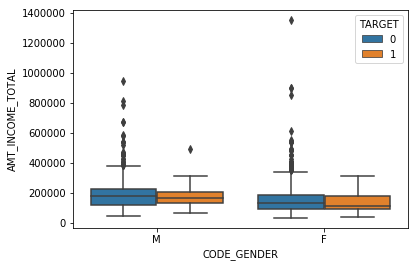

-------------------------------------------------------------------------------------------------------------


In [42]:
for cols in missing_cols_cate:
    print (cols)
    app_processed_df[app_processed_df[cols].isnull()]
    app_processed_df[cols].mode()
    sns.boxplot(app_processed_df[app_processed_df[cols].isnull()]['CODE_GENDER'],app_processed_df[app_processed_df[cols].isnull()]['AMT_INCOME_TOTAL'], hue = app_processed_df[app_processed_df[cols].isnull()]['TARGET'])
    plt.show()
    print ('-------------------------------------------------------------------------------------------------------------')

### Inference: As the mode of the Occupation Type column is Laborers, however we cannot fll the same in all the null values because the empty values are quite high and there is huge variation in Income. Thus all these null cannot be laborers. Hence we can fill those with category as 'OTHERS' ]

In [43]:
### Checking histogram of missing Continous variable to check the distribution
cols_missing = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2','EXT_SOURCE_3',
'OBS_30_CNT_SOCIAL_CIRCLE'        ,
'DEF_30_CNT_SOCIAL_CIRCLE'        ,
'OBS_60_CNT_SOCIAL_CIRCLE'         ,
'DEF_60_CNT_SOCIAL_CIRCLE']

C:\Users\Casterwill\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Casterwill\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.78915e+05, 1.12480e+05, 1.44110e+04, 1.26800e+03, 3.02000e+02,
        6.10000e+01, 2.20000e+01, 5.00000e+00, 3.30000e+01, 1.00000e+00]),
 array([  1615.5,  27256.5,  52897.5,  78538.5, 104179.5, 129820.5,
        155461.5, 181102.5, 206743.5, 232384.5, 258025.5]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'AMT_ANNUITY')

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000.]), <a list of 8 Text xticklabel objects>)

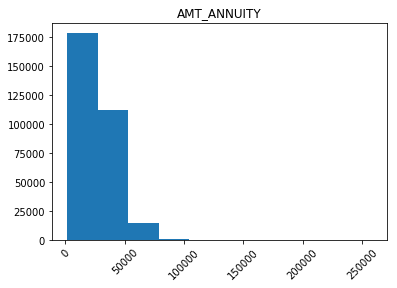

---------------------------------------------------


(array([1.31712e+05, 1.15260e+05, 4.36580e+04, 1.24290e+04, 3.17500e+03,
        9.33000e+02, 3.00000e+01, 1.70000e+01, 8.00000e+00, 1.00000e+01]),
 array([  40500.,  441450.,  842400., 1243350., 1644300., 2045250.,
        2446200., 2847150., 3248100., 3649050., 4050000.]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'AMT_GOODS_PRICE')

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000., 4000000., 4500000.]),
 <a list of 11 Text xticklabel objects>)

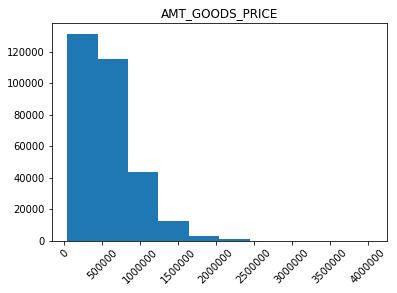

---------------------------------------------------


(array([ 9475., 12978., 16656., 22918., 25715., 35420., 53488., 70443.,
        53309.,  6448.]),
 array([8.17361652e-08, 8.55000402e-02, 1.70999999e-01, 2.56499957e-01,
        3.41999916e-01, 4.27499874e-01, 5.12999833e-01, 5.98499791e-01,
        6.83999749e-01, 7.69499708e-01, 8.54999666e-01]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'EXT_SOURCE_2')

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text xticklabel objects>)

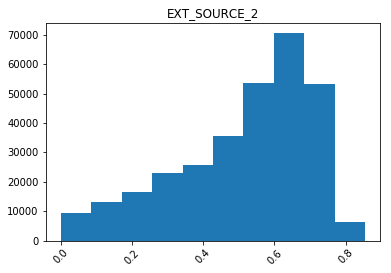

---------------------------------------------------


(array([ 4451., 11559., 17478., 24201., 30475., 35867., 41263., 42931.,
        30574.,  7746.]),
 array([5.27265239e-04, 9.00754937e-02, 1.79623722e-01, 2.69171951e-01,
        3.58720179e-01, 4.48268407e-01, 5.37816636e-01, 6.27364864e-01,
        7.16913093e-01, 8.06461321e-01, 8.96009549e-01]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'EXT_SOURCE_3')

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text xticklabel objects>)

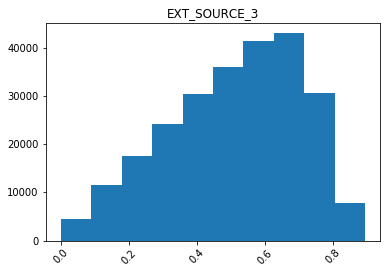

---------------------------------------------------


(array([3.06487e+05, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  0. ,  34.8,  69.6, 104.4, 139.2, 174. , 208.8, 243.6, 278.4,
        313.2, 348. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'OBS_30_CNT_SOCIAL_CIRCLE')

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text xticklabel objects>)

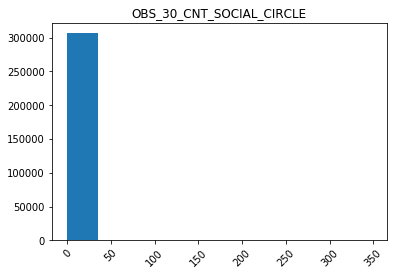

---------------------------------------------------


(array([3.06166e+05, 3.20000e+02, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'DEF_30_CNT_SOCIAL_CIRCLE')

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 10 Text xticklabel objects>)

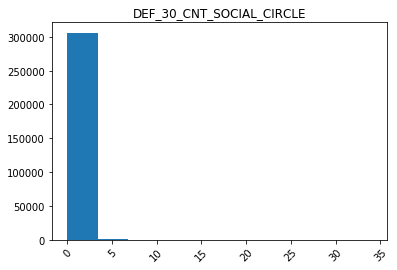

---------------------------------------------------


(array([3.06487e+05, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  0. ,  34.4,  68.8, 103.2, 137.6, 172. , 206.4, 240.8, 275.2,
        309.6, 344. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'OBS_60_CNT_SOCIAL_CIRCLE')

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text xticklabel objects>)

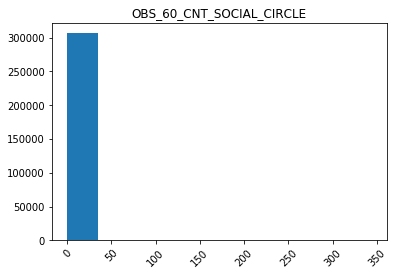

---------------------------------------------------


(array([3.05731e+05, 7.33000e+02, 2.40000e+01, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'DEF_60_CNT_SOCIAL_CIRCLE')

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 <a list of 8 Text xticklabel objects>)

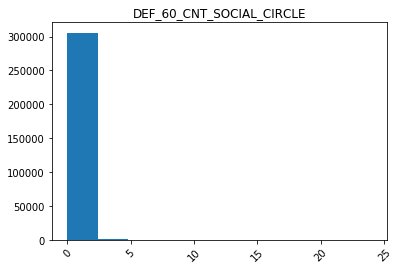

---------------------------------------------------


In [44]:
for col in cols_missing:
    plt.hist(app_processed_df[col])
    plt.title(col)
    plt.xticks(rotation = 45)
    plt.show()
    print('---------------------------------------------------')

In [45]:
target_0 = app_processed_df[app_processed_df['TARGET']==0]
target_1 = app_processed_df[app_processed_df['TARGET']==1]

In [46]:
(target_0['NAME_CONTRACT_TYPE'].value_counts())/len(target_0)
(target_1['NAME_CONTRACT_TYPE'].value_counts())/len(target_1)

Cash loans         0.9021
Revolving loans    0.0979
Name: NAME_CONTRACT_TYPE, dtype: float64

Cash loans         0.935385
Revolving loans    0.064615
Name: NAME_CONTRACT_TYPE, dtype: float64

In [47]:
df = pd.DataFrame()
df['0'] = (target_0['NAME_CONTRACT_TYPE'].value_counts())/len(target_0)
df['1'] = (target_1['NAME_CONTRACT_TYPE'].value_counts())/len(target_1)
df

0         1
Cash loans       0.9021  0.935385
Revolving loans  0.0979  0.064615

## Bivariate Analysis

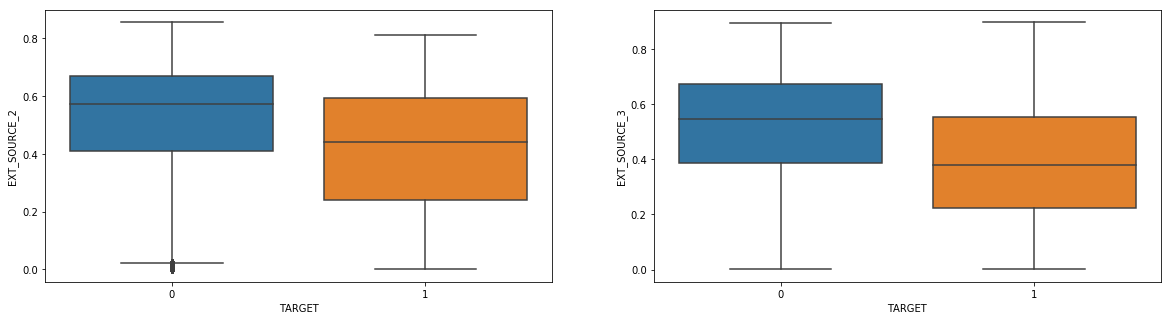

In [224]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize =(20,5))
sns.boxplot(app_processed_df['TARGET'], app_processed_df['EXT_SOURCE_2'] , ax = ax1)
sns.boxplot(app_processed_df['TARGET'], app_processed_df['EXT_SOURCE_3'] , ax = ax2)

### Inference: The average ext_source_2 & ext_source_3 rating for people having difficulties in payment is lower than other people

# PREV_DF_ANALYSIS

In [128]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [130]:
prev_df[prev_df['NFLAG_INSURED_ON_APPROVAL'].isnull()]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
4           1784265      202054         Cash loans    31924.395   
6           2315218      175704         Cash loans          NaN   
7           1656711      296299         Cash loans          NaN   
8           2367563      342292         Cash loans          NaN   
9           2579447      334349         Cash loans          NaN   
18          2393109      396305         Cash loans    10181.700   
19          1173070      199178         Cash loans     4666.500   
20          1506815      166490         Cash loans    25454.025   
22          1172842      302212         Cash loans          NaN   
23          1172937      302212         Cash loans    39475.305   
24          1555330      199353         Cash loans          NaN   
29          1583704      315664         Cash loans          NaN   
32          1471931      257846         Cash loans          NaN   
33          1478703      393511         Cash loans          NaN   
36          2766278      178375     Consumer loans     7511.085   
41          1366380      247572     Consumer loans          NaN   
45          2621158      281470    Revolving loans    14625.000   
47          1475738      235737         Cash loans    75897.630   
48          2600277      256517         Cash loans          NaN   
50          2261993      299391    Revolving loans          NaN   
52          1912041      253391         Cash loans     5294.430   
54          1399859      197343     Consumer loans     4818.780   
57          2586409      446260         Cash loans          NaN   
60          2511538      435636         Cash loans          NaN   
61          1024150      374768         Cash loans          NaN   
62          2326929      221146    Revolving loans          NaN   
63          1074341      137179         Cash loans          NaN   
64          1760015      269239         Cash loans          NaN   
65          2810623      369919         Cash loans          NaN   
66          2433280      407487         Cash loans          NaN   
...             ...         ...                ...          ...   
1670168     2493390      194490         Cash loans          NaN   
1670169     1534841      145881         Cash loans     8146.575   
1670170     2815031      214184         Cash loans          NaN   
1670171     1304099      172575         Cash loans          NaN   
1670172     2739547      368378         Cash loans          NaN   
1670173     2237439      441406         Cash loans          NaN   
1670174     2654508      369696         Cash loans    15036.750   
1670175     1176409      247954         Cash loans     9740.250   
1670176     2489754      104479         Cash loans          NaN   
1670177     2486989      391517         Cash loans    20876.805   
1670179     2711219      433779         Cash loans          NaN   
1670180     2380288      423126         Cash loans          NaN   
1670181     2710915      144881         Cash loans     9590.400   
1670182     2684371      337646         Cash loans    26316.000   
1670183     2460550      381812         Cash loans    39474.000   
1670184     1458393      279524         Cash loans    48458.025   
1670185     2815037      422867         Cash loans    54411.570   
1670186     1433968      272570         Cash loans          NaN   
1670187     1971628      435554         Cash loans          NaN   
1670188     1713281      247019         Cash loans    26446.500   
1670189     2406354      377114         Cash loans    26240.715   
1670190     2381880      175920         Cash loans          NaN   
1670191     1755809      122569    Revolving loans     2250.000   
1670193     1120445      179433    Revolving loans          NaN   
1670196     1662123      398290     Consumer loans          NaN   
1670197     1854636      184353     Consumer loans    15708.150   
1670203     2844282      383898     Consumer loans          NaN   
1670204     1407146      198989         Cash loans    36

In [131]:
prev_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [133]:
miss_prev_df = (prev_df.isnull().sum()/len(prev_df))*100
col_remove_prev_list = list(miss_prev_df[miss_prev_df > 40].index)
col_remove_prev_list

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [135]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRACT_STATUS           1670214 non-null object
DAYS_DECISION                  1670214 non-null int64
NAME_PAYMENT_TYPE              1670214 non-null object
CODE_REJECT_REASON             1670214 non-null object
NAME_CLI

In [134]:
prev_df.drop(columns  = col_remove_prev_list, inplace = True)
prev_df.head(5)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [91]:
prev_df['DAYS_DECISION'] = abs(prev_df['DAYS_DECISION'])

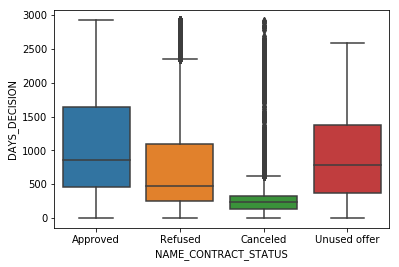

In [92]:
sns.boxplot(prev_df['NAME_CONTRACT_STATUS'], prev_df['DAYS_DECISION'])

### Inference: Most people who cancelled their loan have re-applied for the new loan within a shorter duration

<Figure size 720x432 with 0 Axes>

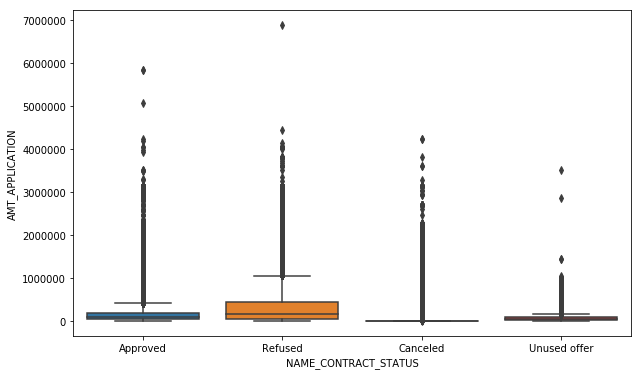

In [113]:
plt.figure(figsize = (10,6))
sns.boxplot(prev_df['NAME_CONTRACT_STATUS'], prev_df['AMT_APPLICATION'])
plt.show()

### Inference: Most clients whose loan got refused have a higher loan applicatin amount as compared to other loan applications

In [94]:
prev_df['NAME_CLIENT_TYPE'].value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

<Figure size 1080x360 with 0 Axes>

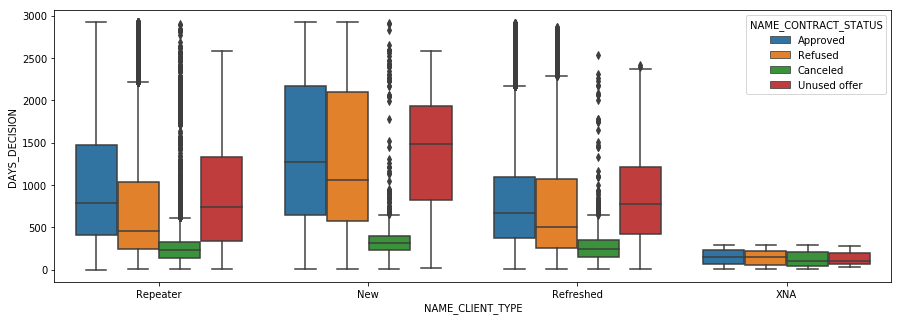

In [95]:
plt.figure(figsize = (15,5))
sns.boxplot(prev_df['NAME_CLIENT_TYPE'], prev_df['DAYS_DECISION'], hue = prev_df['NAME_CONTRACT_STATUS'])
plt.show()

### Inference: New clients whose loan got refused on an average took higher time to reapply for the current loan

<Figure size 1080x288 with 0 Axes>

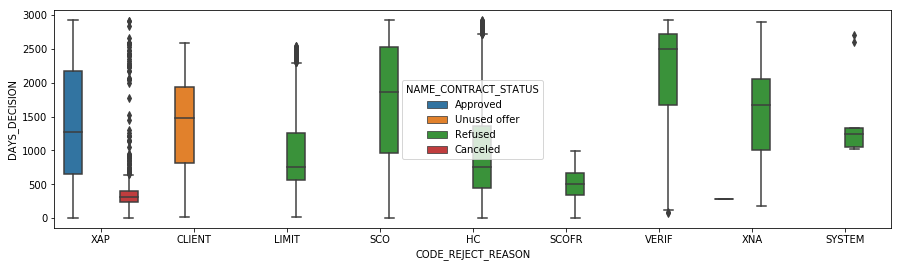

In [96]:
plt.figure(figsize = (15,4))
prev_df_new_clients = prev_df[prev_df['NAME_CLIENT_TYPE'] == 'New']
sns.boxplot(prev_df_new_clients['CODE_REJECT_REASON'], prev_df_new_clients['DAYS_DECISION'], hue = prev_df_new_clients['NAME_CONTRACT_STATUS'])

In [144]:
# This column can be used to summarize the status
prev_df['cnt'] = 1

In [110]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 27 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRACT_STATUS           1670214 non-null object
DAYS_DECISION                  1670214 non-null int64
NAME_PAYMENT_TYPE              1670214 non-null object
CODE_REJECT_REASON             1670214 non-null object
NAME_CLI

<Figure size 1080x360 with 0 Axes>

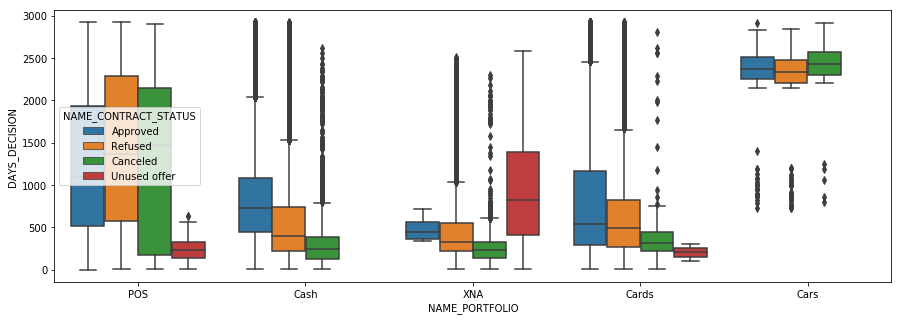

In [108]:
plt.figure(figsize = (15,5))
sns.boxplot(prev_df['NAME_PORTFOLIO'], prev_df['DAYS_DECISION'], hue = prev_df['NAME_CONTRACT_STATUS'])
plt.show()

### Inference: There is no unused offer of client who have applied for cash and car loans. In addition the client who have applied for car loan are the ones who have taken most time in applying new loan.

<Figure size 1080x1440 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

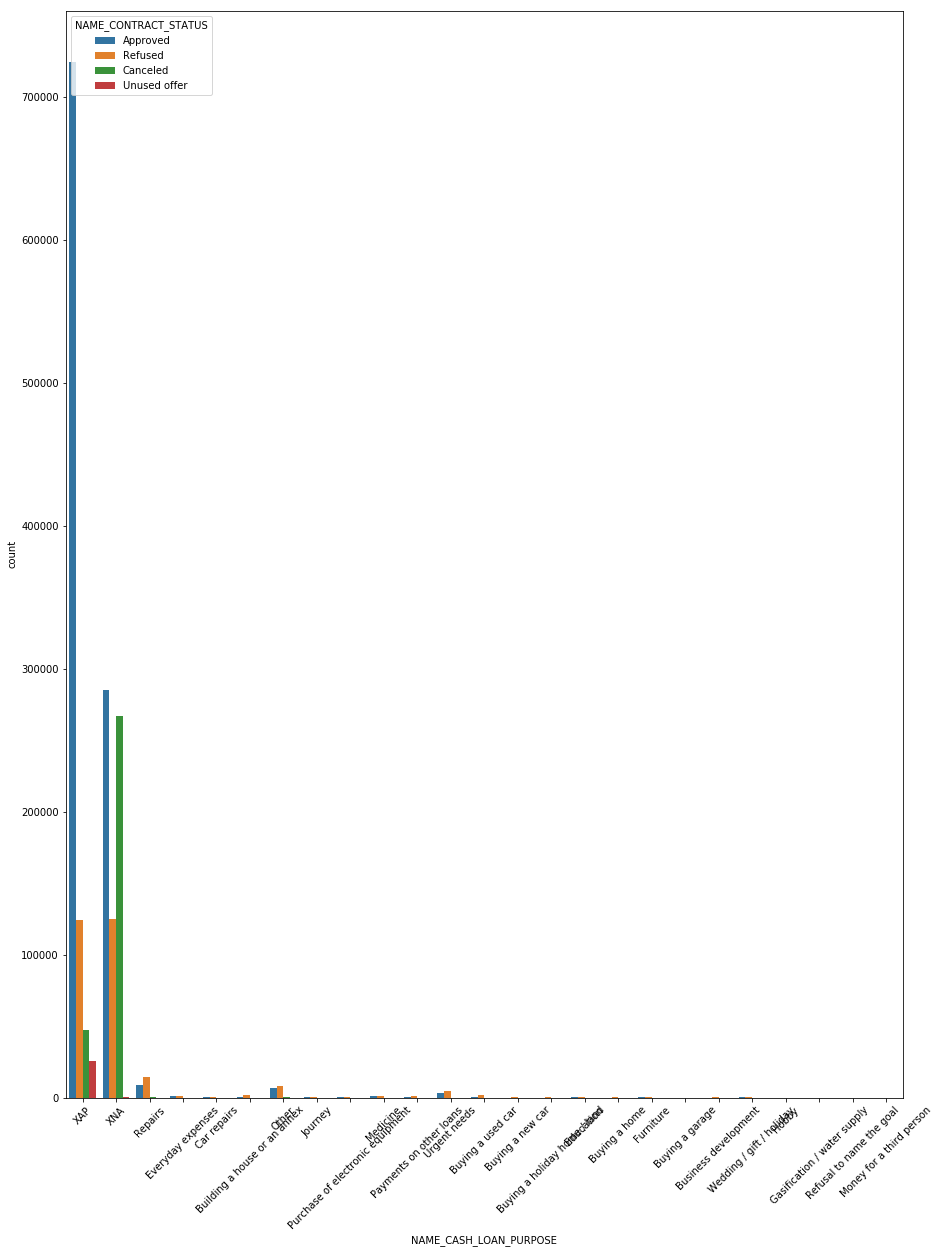

In [139]:

plt.figure(figsize = (15,20))
sns.countplot( prev_df['NAME_CASH_LOAN_PURPOSE'], hue = prev_df['NAME_CONTRACT_STATUS'])
plt.xticks(rotation = 45)
plt.show()

In [143]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRACT_STATUS           1670214 non-null object
DAYS_DECISION                  1670214 non-null int64
NAME_PAYMENT_TYPE              1670214 non-null object
CODE_REJECT_REASON             1670214 non-null object
NAME_CLI

In [166]:
prev_df_processed = prev_df.pivot_table(index = 'SK_ID_CURR', columns = ['NAME_CONTRACT_STATUS'], values = ['cnt'], aggfunc = sum)

In [161]:
?prev_df_processed.reset_index

In [167]:
prev_df_processed.fillna(0, inplace = True)
prev_df_processed.reset_index(inplace = True)
prev_df_processed

SK_ID_CURR      cnt                              
NAME_CONTRACT_STATUS            Approved Canceled Refused Unused offer
0                        100001      1.0      0.0     0.0          0.0
1                        100002      1.0      0.0     0.0          0.0
2                        100003      3.0      0.0     0.0          0.0
3                        100004      1.0      0.0     0.0          0.0
4                        100005      1.0      1.0     0.0          0.0
5                        100006      5.0      3.0     1.0          0.0
6                        100007      6.0      0.0     0.0          0.0
7                        100008      4.0      1.0     0.0          0.0
8                        100009      7.0      0.0     0.0          0.0
9                        100010      1.0      0.0     0.0          0.0
10                       100011      3.0      0.0     1.0          0.0
11                       100012      3.0      1.0     0.0          0.0
12                       100013      3.0      1.0     0.0          0.0
13                       100014      2.0      0.0     0.0          0.0
14                       100015      1.0      0.0     0.0          0.0
15                       100016      4.0      0.0     0.0          0.0
16                       100017      2.0      0.0     0.0          0.0
17                       100018      4.0      0.0     0.0          0.0
18                       100019      1.0      0.0     0.0          0.0
19                       100020      2.0      0.0     0.0          0.0
20                       100021      6.0      0.0     0.0          0.0
21                       100022      1.0      0.0     0.0          0.0
22                       100023      4.0      0.0     0.0          0.0
23                       100025      7.0      1.0     0.0          0.0
24                       100026      2.0      1.0     0.0          0.0
25                       100027      2.0      1.0     1.0          0.0
26                       100028      3.0      1.0     0.0          1.0
27                       100029      1.0      0.0     0.0          0.0
28                       100030      2.0      0.0    10.0          0.0
29                       100032      1.0      0.0     0.0          0.0
...                         ...      ...      ...     ...          ...
338827                   456225      2.0      0.0     3.0          0.0
338828                   456226      1.0      0.0     0.0          0.0
338829                   456227      5.0      2.0     1.0          0.0
338830                   456228      7.0      0.0     2.0          0.0
338831                   456230      3.0      0.0     0.0          2.0
338832                   456231      5.0      5.0     4.0          0.0
338833                   456232      4.0      0.0     0.0          0.0
338834                   456233      2.0      0.0     0.0          0.0
338835                   456234      2.0      0.0     1.0          1.0
338836                   456235      4.0      1.0     0.0          0.0
338837                   456236      3.0      0.0     1.0          0.0
338838                   456237      6.0      2.0     1.0          0.0
338839                   456238      1.0      0.0     0.0          1.0
338840                   456239      2.0      0.0     0.0          0.0
338841                   456240      4.0      1.0     0.0          0.0
338842                   456241      6.0      3.0     0.0          0.0
338843                   456242      4.0      0.0     0.0          0.0
338844                   456243      3.0      0.0     4.0          0.0
338845                   456244     12.0      5.0     1.0          0.0
338846                   456245      2.0      0.0     0.0          0.0
338847                   456246      2.0      0.0     0.0          0.0
338848                   456247      4.0      0.0     1.0          0.0
338849                   456248      4.0      0.0     0.0          0.0
338850                   456249      1.0     

In [172]:
#Combining app df and prev df
df_new = app_processed_df.merge(prev_df_processed, how= 'left', on = 'SK_ID_CURR')
df_new.head(5)

C:\Users\Casterwill\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [178]:
df_new.rename(columns = {('cnt', 'Approved'): 'Approved', ('cnt', 'Canceled'):'Canceled',('cnt', 'Refused'):'Refused',('cnt', 'Unused offer'): 'Unused offer'},inplace = True)

In [188]:
df_new.shape

(307510, 82)

<Figure size 720x576 with 0 Axes>

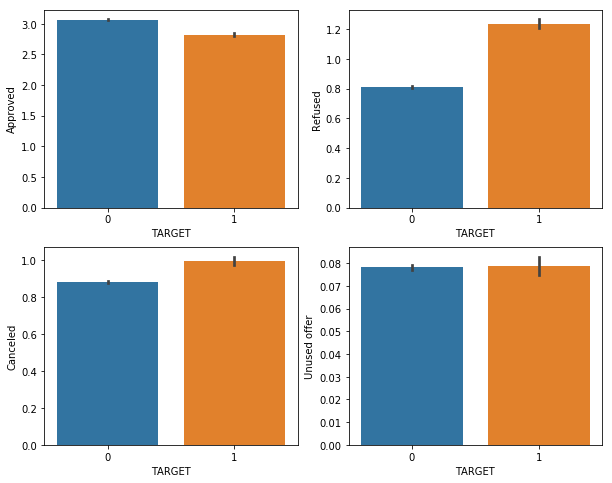

In [223]:

plt.figure(figsize = (10,8))
plt.subplot(221)
sns.barplot(x = 'TARGET', y = 'Approved', data = df_new)
plt.subplot(222)
sns.barplot(x = 'TARGET', y = 'Refused', data = df_new)
plt.subplot(223)
sns.barplot(x = 'TARGET', y = 'Canceled', data = df_new)
plt.subplot(224)
sns.barplot(x = 'TARGET', y = 'Unused offer', data = df_new)

### Inference: Client's whose loan were refused previously are facing more diffiulty in paying the current loan

<Figure size 720x720 with 0 Axes>

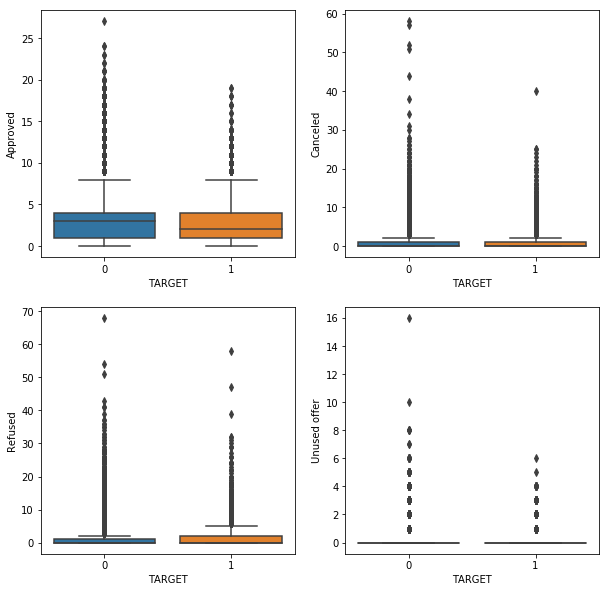

In [203]:
plt.figure(figsize = (10,10))
plt.subplot(221)
sns.boxplot(df_new['TARGET'],df_new['Approved'])
plt.subplot(222)
sns.boxplot(df_new['TARGET'],df_new['Canceled'])
plt.subplot(223)
sns.boxplot(df_new['TARGET'],df_new['Refused'])
plt.subplot(224)
sns.boxplot(df_new['TARGET'],df_new['Unused offer'])

In [209]:
#Checking only those people whose approved loans are less than refused loans
df_app_ref = df_new[df_new['Approved'] < df_new['Refused']]

<Figure size 720x720 with 0 Axes>

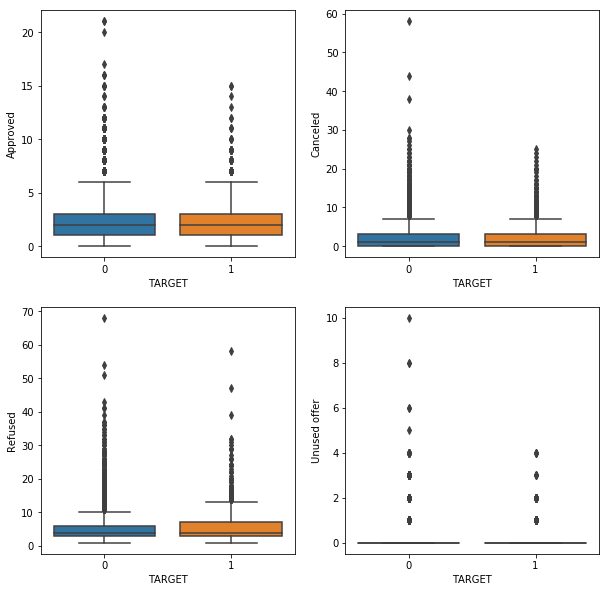

In [208]:
plt.figure(figsize = (10,10))
plt.subplot(221)
sns.boxplot(df_app_ref['TARGET'],df_app_ref['Approved'])
plt.subplot(222)
sns.boxplot(df_app_ref['TARGET'],df_app_ref['Canceled'])
plt.subplot(223)
sns.boxplot(df_app_ref['TARGET'],df_app_ref['Refused'])
plt.subplot(224)
sns.boxplot(df_app_ref['TARGET'],df_app_ref['Unused offer'])

In [212]:
df_new[df_new['Refused']> 60]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
142894      265681       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
142894               Y             0          112500.0    278460.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
142894      22455.0         225000.0   Unaccompanied          Working   

       NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
142894    Higher education  Single / not married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
142894                    0.031329       15517            326   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
142894             1616.0             2597           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
142894                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
142894        Managers              1.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
142894                            2                     MONDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
142894                        9                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
142894                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
142894                       0                       1   

        LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
142894                        1          Security      0.147872       0.18849   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
142894                       0.0                       0.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
142894                       0.0                       0.0   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
142894                  1475.0                0                1   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
142894                0                0                0                0   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
142894                0                0                 0                 0   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
142894                 0                 0                 0   

        FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
142894                 0                 0                 0   

        FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
142894                 0                 0                 0   

        FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
142894                 0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
142894                        0.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
142894                        1.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_YEAR AGE_GROUP EMPLOYED_DAYS_GROUP  \
142894                         3.0   40Y-50Y                <20Y   

       DAYS_REGISTRATION_GROUP DAYS_ID_PUBLISH_GROUP  \
142894                   2Y-5Y                5Y-10Y   

       DAYS_LAST_PHONE_CHANGE_GROUP  Approved  Canceled  Refused  Unused offer  
142894                        2Y-5Y       4.0       1.0     68.0           0.0

In [214]:
df_new[df_new['SK_ID_CURR'] == 265681]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
142894      265681       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
142894               Y             0          112500.0    278460.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
142894      22455.0         225000.0   Unaccompanied          Working   

       NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
142894    Higher education  Single / not married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
142894                    0.031329       15517            326   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
142894             1616.0             2597           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
142894                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
142894        Managers              1.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
142894                            2                     MONDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
142894                        9                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
142894                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
142894                       0                       1   

        LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
142894                        1          Security      0.147872       0.18849   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
142894                       0.0                       0.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
142894                       0.0                       0.0   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
142894                  1475.0                0                1   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
142894                0                0                0                0   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
142894                0                0                 0                 0   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
142894                 0                 0                 0   

        FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
142894                 0                 0                 0   

        FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
142894                 0                 0                 0   

        FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
142894                 0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
142894                        0.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
142894                        1.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_YEAR AGE_GROUP EMPLOYED_DAYS_GROUP  \
142894                         3.0   40Y-50Y                <20Y   

       DAYS_REGISTRATION_GROUP DAYS_ID_PUBLISH_GROUP  \
142894                   2Y-5Y                5Y-10Y   

       DAYS_LAST_PHONE_CHANGE_GROUP  Approved  Canceled  Refused  Unused offer  
142894                        2Y-5Y       4.0       1.0     68.0           0.0

<Figure size 720x720 with 0 Axes>

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

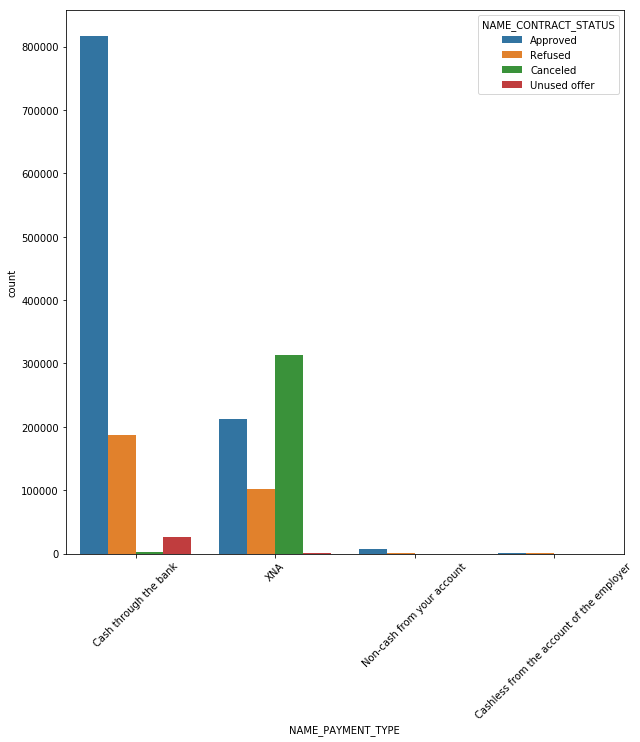

In [218]:
plt.figure(figsize = (10,10))
sns.countplot(prev_df['NAME_PAYMENT_TYPE'], hue = prev_df['NAME_CONTRACT_STATUS'])
plt.xticks(rotation = 45)
plt.show()

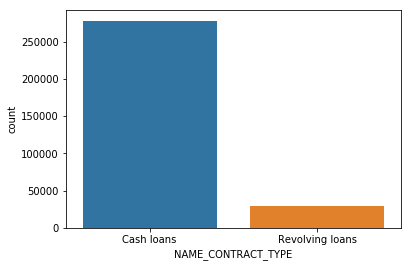

In [250]:
sns.countplot(app_processed_df['NAME_CONTRACT_TYPE'])

In [243]:
?sns.catplot